# Data Cleaning

LOADING DATA INTO THE NOTEBOOK

In [ ]:
import pandas as pd

# Load company information
company_info = pd.read_csv('company_info.csv')

# Load company stock details
company_stock_details = pd.read_csv('company_stock_details.csv')

# Display the first few rows to understand the structure
print(company_info.head())
print(company_stock_details.head())

  Symbol  GICS Sector    Headquarters Location      Founded
0    MMM  Industrials    Saint Paul, Minnesota         1902
1    AOS  Industrials     Milwaukee, Wisconsin         1916
2    ABT  Health Care  North Chicago, Illinois         1888
3   ABBV  Health Care  North Chicago, Illinois  2013 (1888)
4   ABMD  Health Care   Danvers, Massachusetts         1981
        Date       Close   Volume Symbol  News - Positive Sentiment  \
0  30/9/2020  160.179993  3056900    MMM                        NaN   
1  1/10/2020  158.789993  1989100    MMM                        0.0   
2  2/10/2020  160.360001  1768600    MMM                        3.0   
3  5/10/2020  162.750000  1457000    MMM                        2.0   
4  6/10/2020  162.229996  2021900    MMM                        0.0   

   News - Negative Sentiment  News - New Products  News - Layoffs  \
0                        NaN                  NaN             NaN   
1                        0.0                  0.0             0.0   
2     

CLEAN DATA

In [ ]:
print(company_info.isnull().sum())
print(company_stock_details.isnull().sum())

Symbol                   0
GICS Sector              0
Headquarters Location    0
Founded                  0
dtype: int64
Date                               0
Close                              0
Volume                             0
Symbol                             0
News - Positive Sentiment        493
News - Negative Sentiment        493
News - New Products              493
News - Layoffs                   493
News - Analyst Comments          493
News - Stocks                    493
News - Dividends                 493
News - Corporate Earnings        493
News - Mergers & Acquisitions    493
News - Store Openings            493
News - Product Recalls           493
News - Adverse Events            493
News - Personnel Changes         493
News - Stock Rumors              493
dtype: int64


HANDLING MISSING VALUES

In [ ]:
company_stock_details.fillna(method='ffill', inplace=True)

C:\Users\alaga\AppData\Local\Temp\ipykernel_32104\2554499657.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  company_stock_details.fillna(method='ffill', inplace=True)


MERGING NEW DATA

In [ ]:
# Perform an inner join to merge on 'Symbol' (this only keeps rows where there is a match)
merged_data = pd.merge(company_stock_details, company_info, on='Symbol', how='inner')

# Check the first few rows of the merged data
print(merged_data.head())

# Save the merged data into a new CSV file
merged_data.to_csv('merged_company_data.csv', index=False)

        Date       Close   Volume Symbol  News - Positive Sentiment  \
0  30/9/2020  160.179993  3056900    MMM                        NaN   
1  1/10/2020  158.789993  1989100    MMM                        0.0   
2  2/10/2020  160.360001  1768600    MMM                        3.0   
3  5/10/2020  162.750000  1457000    MMM                        2.0   
4  6/10/2020  162.229996  2021900    MMM                        0.0   

   News - Negative Sentiment  News - New Products  News - Layoffs  \
0                        NaN                  NaN             NaN   
1                        0.0                  0.0             0.0   
2                        0.0                  0.0             0.0   
3                        3.0                  0.0             0.0   
4                        0.0                  0.0             0.0   

   News - Analyst Comments  News - Stocks  ...  News - Corporate Earnings  \
0                      NaN            NaN  ...                        NaN   
1   

CREATING LAGGED VARIABLES


In [ ]:
merged_data['Close_lag_1'] = merged_data.groupby('Symbol')['Close'].shift(1)
merged_data['Close_lag_2'] = merged_data.groupby('Symbol')['Close'].shift(2)
merged_data['Close_lag_3'] = merged_data.groupby('Symbol')['Close'].shift(3)
merged_data['Close_lag_4'] = merged_data.groupby('Symbol')['Close'].shift(4)
merged_data['Close_lag_5'] = merged_data.groupby('Symbol')['Close'].shift(5)

IMPROVING THEM FURTHER

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Weekday'] = merged_data['Date'].dt.weekday

C:\Users\alaga\AppData\Local\Temp\ipykernel_32104\3375785028.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_data['Date'] = pd.to_datetime(merged_data['Date'])


TRAIN TEST SPLIT

In [ ]:
# Sort by date to maintain chronological order
merged_data.sort_values(by=['Symbol', 'Date'], inplace=True)

# Define the split date
train_data = merged_data[merged_data['Date'] < '2022-01-01']
test_data = merged_data[merged_data['Date'] >= '2022-01-01']

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


# Principal Component Analysis for dimensionality reduction

Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Load dataset and remove the lagged variables and categorical data

In [ ]:
# Load data
data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")

# Convert 'Date' to datetime, handling errors
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for NaT values after conversion
if data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(data[data['Date'].isnull()])

# Select features for PCA
# only use X because this is an unsupervised learning method
X = data.drop('Close', axis=1)
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

X=  X.drop('Symbol', axis=1)
X = X.drop('GICS Sector', axis=1)
X = X.drop('Headquarters Location', axis=1)
X = X.drop('Founded', axis=1)
X = X.drop('Close_lag_1', axis=1)
X = X.drop('Close_lag_2', axis=1)
X = X.drop('Close_lag_3', axis=1)
X = X.drop('Close_lag_4', axis=1)
X = X.drop('Close_lag_5', axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3208\2339153770.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")


Because PCA uses distance metric, need to standardise

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
# put scaled X variables into a df
X_imputed_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_imputed_df)

[[-0.32023925  0.30704217  1.71009421 ...  0.42707083 -0.00679865
  -1.97019958]
 [-0.38190595 -0.15326762 -0.24267159 ...  0.70875337  0.7099958
  -1.97019958]
 [-0.38300679 -0.15326762 -0.24267159 ...  0.70875337  1.42679024
  -1.97019958]
 ...
 [-0.36101884 -0.15326762 -0.24267159 ...  1.27211846 -0.00679865
   0.50756279]
 [-0.36882133 -0.15326762 -0.24267159 ...  1.27211846  0.7099958
   0.50756279]
 [-0.34812735 -0.15326762 -0.24267159 ...  1.27211846  1.42679024
   0.50756279]]
          Volume  News - Positive Sentiment  News - Negative Sentiment  \
0      -0.320239                   0.307042                   1.710094   
1      -0.381906                  -0.153268                  -0.242672   
2      -0.383007                  -0.153268                  -0.242672   
3      -0.374152                  -0.120388                  -0.242672   
4      -0.347683                  -0.153268                  -0.242672   
...          ...                        ...                       

Create PCA by selecting number of Principal Components and fitting scaled X data into PCA

In [ ]:
# Create PCA object
pca = PCA(n_components=10)  #explained variance captured by PC10 decreases to become very small by then so the optimal number of PC won't be missed out
X_cleaned = X_imputed_df.dropna()

# Fit PCA by transforming scaled data into new coordinate system defined by the 10 components
X_pca = pca.fit_transform(X_cleaned)

In [ ]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# Add original feature names for later use
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

See contributions of each variable in each PC

In [ ]:
# Get the PCA components: 
# "features" that are uncorrelated to each other so as to capture unique information about the variance that the X variables explain
components = pca.components_

# Create a DataFrame to see the contributions
pca_components_df = pd.DataFrame(components, columns=X_cleaned.columns, index=[f'PC{i+1}' for i in range(len(components))])
print(pca_components_df)

        Volume  News - Positive Sentiment  News - Negative Sentiment  \
PC1   0.301683                   0.353142                   0.402751   
PC2   0.152443                   0.339416                   0.300189   
PC3  -0.001822                   0.002851                  -0.009323   
PC4  -0.132446                  -0.074602                   0.113817   
PC5   0.114884                  -0.100387                  -0.052142   
PC6   0.153764                  -0.184990                  -0.118198   
PC7  -0.013653                  -0.013249                   0.002808   
PC8  -0.045340                  -0.013441                   0.007076   
PC9   0.037217                  -0.074642                  -0.062256   
PC10  0.010688                   0.016473                   0.095065   

      News - New Products  News - Layoffs  News - Analyst Comments  \
PC1              0.301212        0.086592                 0.320566   
PC2              0.293117        0.032230                -0.553967 

Plot Scree plot to see what is the optimal number of PC- first 2 is enough

Explained variance by component: [3.15330924 1.92772429 1.5031618  1.1380551  1.07710627 1.01644612
 1.01017675 0.99690795 0.97510633 0.92846406]


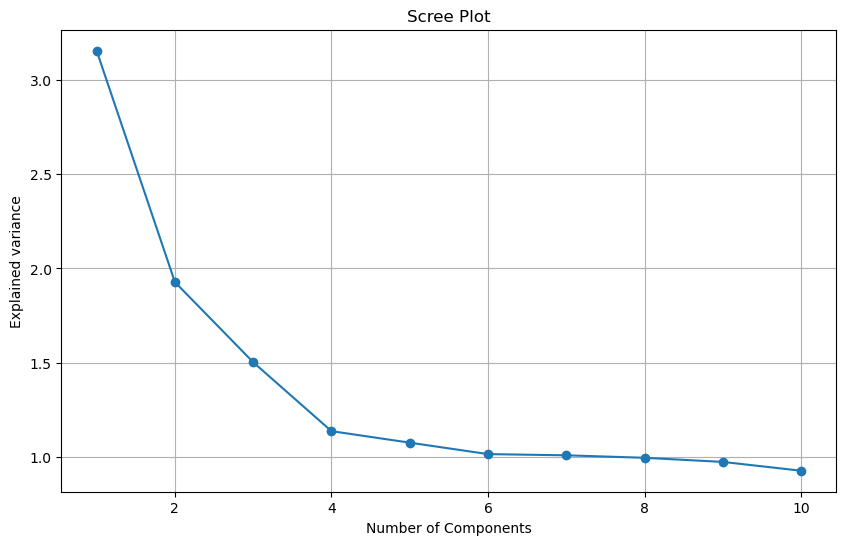

In [ ]:
explained_variance = pca.explained_variance_
print(f"Explained variance by component: {explained_variance}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), 
         pca.explained_variance_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

Create biplot to see how does PC1 and PC2 loads variables (to see which variables explain variance the most)

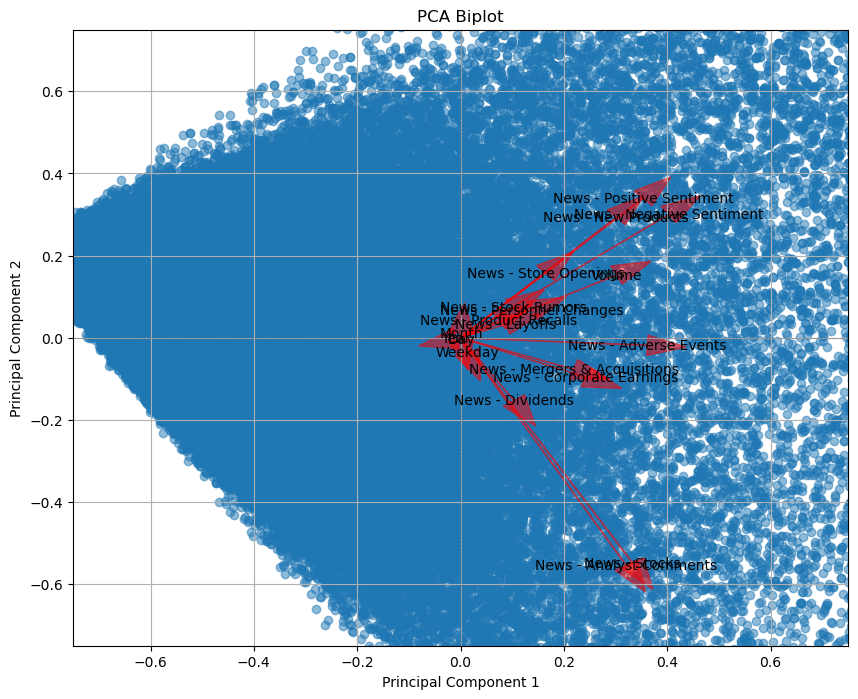

In [ ]:
# Create the biplot
plt.figure(figsize=(10, 8))

# Scatter plot of PCA results
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)

# Adding variable vectors
for i, col in enumerate(pca_components.columns):
    plt.arrow(0, 0, pca_components.loc['PC1', col], pca_components.loc['PC2', col],
              color='r', alpha=0.5, head_width=0.05)
    plt.text(pca_components.loc['PC1', col], pca_components.loc['PC2', col], 
             col, color='black', ha='center', va='center')
# provides directions (vectors) that represents the PC1 and PC2 derived

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid()

plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')

# Adjust based on data
plt.xlim(-0.75, 0.75) 
plt.ylim(-0.75, 0.75) 

plt.show()


PC1 loads heavily on News- Positive Sentiment, News-Negative Sentiment, News- New Products, Volume

PC2 loads heavily on News- Analyst comments, News- Stocks

By selecting only these 6 variables, we can reduce dimensionality of dataset while retaining most of the variance

# Autoregressive Integrated Moving Average (ARIMA)

LOADING UP FOR SARIMA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

DOING PACF (ALSO ISOLATE TO JUST ONE COMPANY FIRST)

C:\Users\alaga\AppData\Local\Temp\ipykernel_32104\3920110932.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('company_stock_details.csv', parse_dates=['Date'], index_col='Date')


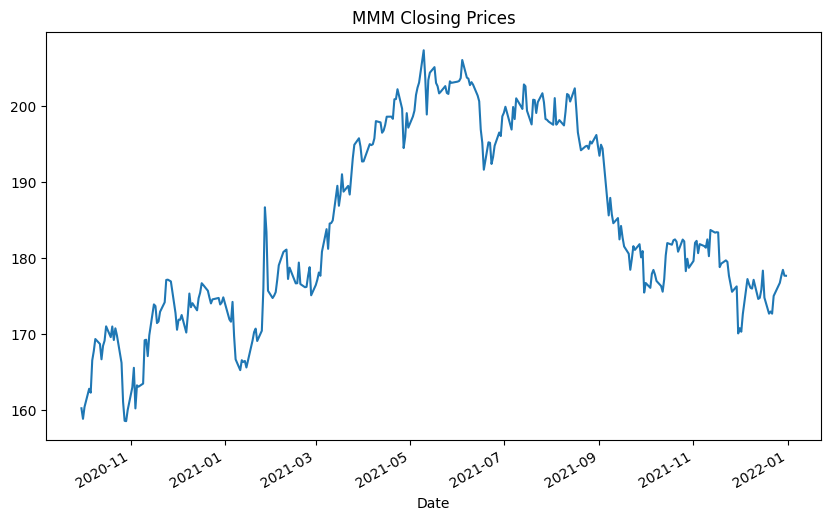

In [ ]:
# Load the stock price data
data = pd.read_csv('company_stock_details.csv', parse_dates=['Date'], index_col='Date')
train_data = data[data.index < '2022-01-01']
# Filter for one company, for example 'MMM'
mmm_data = train_data[train_data['Symbol'] == 'MMM']

# Visualize the closing price over time
mmm_data['Close'].plot(title='MMM Closing Prices', figsize=(10, 6))
plt.show()

I am visually inferring that this data is not stationary looking at the graph, as the mean from 2020 october to 2022 january, is vastly different from the mean from 2022 january to 2022 july. Although, it is indeed worth mentioning that I think the standard deviation is constant, and I do not infer any direct seasonality from my naked eye. Regardless, let us test it out via code.

CHECKING STATIONARITY

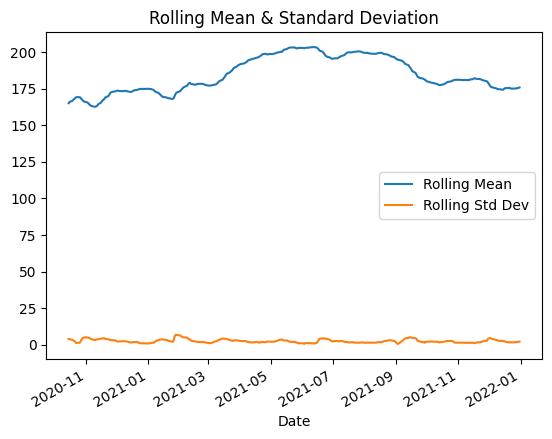

In [ ]:
mmm_data['Close'].rolling(window=12).mean().plot(label='Rolling Mean')
mmm_data['Close'].rolling(window=12).std().plot(label='Rolling Std Dev')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

I used a rolling mean of 12 days, (after going past 12 datapoints, rolling mean uses the mean close of first 12 datapoints to create its first datapoint, then second datapoint is the 2nd to 13th datapoint, third datapoint is 3rd to 14th, so on so forth)

So I need to attempt to make this stationary, and how I will go about doing it is bringing forth the "integrated" aspect of ARIMA. Finding the differences between each datapoint, and then dropping the first difference as it is NA because it has no datapoint to difference off of, and plotting the differences instead.

C:\Users\alaga\AppData\Local\Temp\ipykernel_32104\4237357028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmm_data['Diff_Close'] = mmm_data['Close'].diff().dropna()


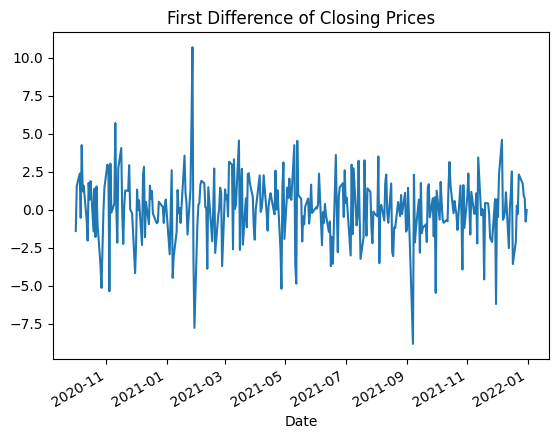

In [ ]:
# Differencing the data
mmm_data['Diff_Close'] = mmm_data['Close'].diff().dropna()
mmm_data['Diff_Close'].plot(title='First Difference of Closing Prices')
plt.show()

This looks better stationarity wise.

PLOTTING PACF AND ACF

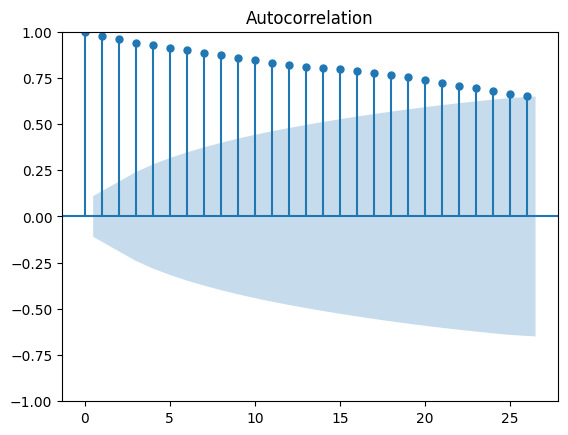

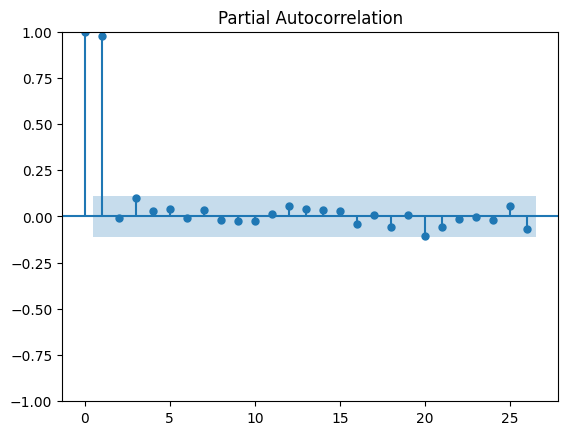

In [ ]:
plot_acf(mmm_data['Close'].dropna())
plt.show()

plot_pacf(mmm_data['Close'].dropna())
plt.show()


I can conclude that this is an AR1 model, where we are basing the current variable with the most recent lagged variable.

However, in my learning curve while building this model, I have realised I need to confirm the non-stationarity of the data. Hence, I ran an Augmented Dickey Fuller test, to check whether the co-efficient I obtained off of the PACF test for the most recent lagged variable, is an unit root or not. If it is an unit root, meaning it equals to 1, that 

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the 'Close' prices
adf_result = adfuller(mmm_data['Close'])

# Output the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

if adf_result[1] > 0.05:
    print("The time series is likely non-stationary (cannot reject null hypothesis).")
else:
    print("The time series is likely stationary (reject null hypothesis).")

ADF Statistic: -1.982859340445174
p-value: 0.29413888031519664
Critical Values: {'1%': np.float64(-3.4513486122290717), '5%': np.float64(-2.870789013306053), '10%': np.float64(-2.5716978530569192)}
The time series is likely non-stationary (cannot reject null hypothesis).


I also wanted to literally find the co-efficient of the most recent lagged variable under partial auto correlation to check whether it has an unit root or not.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an AutoRegressive (AR) model to the closing prices
# The 'lags' parameter controls how many lagged terms to include (for example, AR(1) or AR(2))
closing_prices=mmm_data['Close']
ar_model = AutoReg(closing_prices, lags=1).fit()

# Print the AR coefficient(s) (rho values)
print("AR coefficients (rho):")
print(ar_model.params)



AR coefficients (rho):
const       3.796147
Close.L1    0.979670
dtype: float64


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


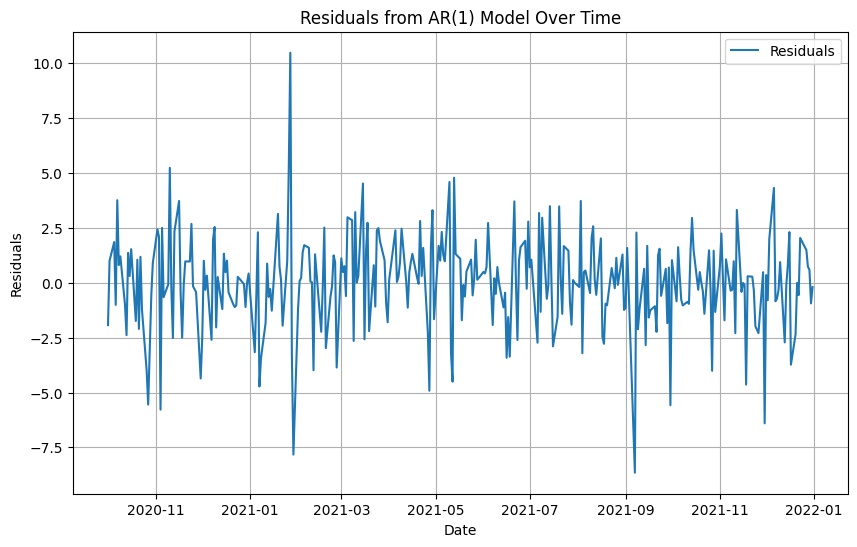

In [ ]:
# Get the residuals of the AR model
residuals = ar_model.resid

# Plot the residuals over time
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals, label='Residuals')
plt.title('Residuals from AR(1) Model Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = (abs(residuals) / closing_prices[1:]).mean() * 100

# Print the MAPE result
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 0.87%


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in

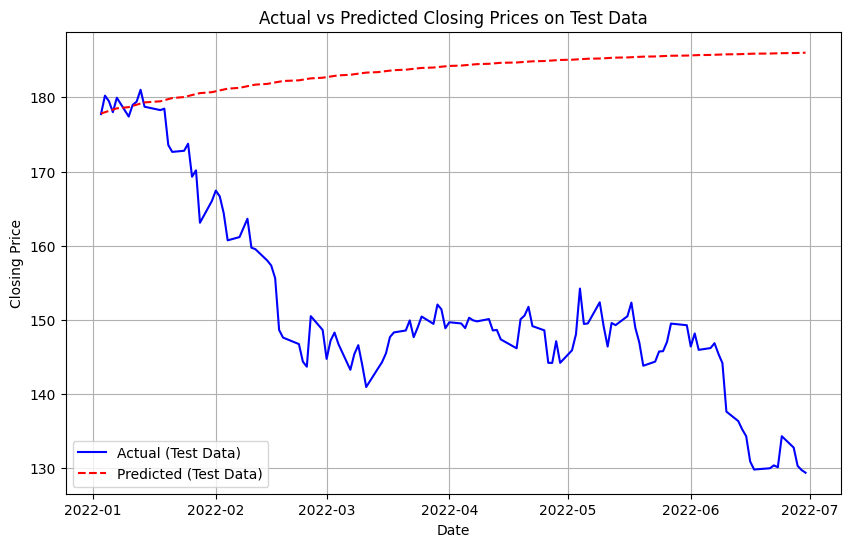

Mean Absolute Percentage Error (MAPE) on Test Data: 21.86%


In [ ]:
# Split the data into train and test based on the date
train_data = data[data.index < '2022-01-01']
test_data = data[data.index >= '2022-01-01']

# Filter for one company, for example 'MMM'
train_mmm_data = train_data[train_data['Symbol'] == 'MMM']
test_mmm_data = test_data[test_data['Symbol'] == 'MMM']

# Train AutoRegressive (AR) model using the training data
closing_prices_train = train_mmm_data['Close']
ar_model = AutoReg(closing_prices_train, lags=1).fit()

# Predict the test data
# Note: The start and end indices for predict must match the test data range
predicted_values = ar_model.predict(start=len(closing_prices_train), 
                                    end=len(closing_prices_train) + len(test_mmm_data) - 1, 
                                    dynamic=False)

# Align the predicted values with the test set's index
predicted_values.index = test_mmm_data.index

# Plot actual vs predicted values on test data
plt.figure(figsize=(10, 6))

# Plot actual closing prices from test data
plt.plot(test_mmm_data.index, test_mmm_data['Close'], label='Actual (Test Data)', color='blue')

# Plot predicted closing prices from test data
plt.plot(predicted_values.index, predicted_values, label='Predicted (Test Data)', color='red', linestyle='--')

# Add labels and title
plt.title('Actual vs Predicted Closing Prices on Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Optionally, calculate Mean Absolute Percentage Error (MAPE) on test data
residuals = test_mmm_data['Close'] - predicted_values
mape = (abs(residuals) / test_mmm_data['Close']).mean() * 100
print(f"Mean Absolute Percentage Error (MAPE) on Test Data: {mape:.2f}%")

From above, we find out train test split might not be a good way to test out the evaluative performance on our auto-regressive model. This is because while maybe our predictions did better at the start, as time goes on, we are not really doing as well. Uncertainty increases with time. Which is why it might make sense to do a rolling evaluation. Predict for the next day, then add that next day data into training set, predict for the next next day, add that next next day data into training set, so on and so forth, to evaluate the model while accounting for the uncertainty condition. THIS IS CALLED ROLLING FORECAST ORIGIN.

C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Temp\ipykernel_32104\2863808629.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_prediction = ar_model.predict(start=history.index[-1], end=history.index[-1])[0]
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency info

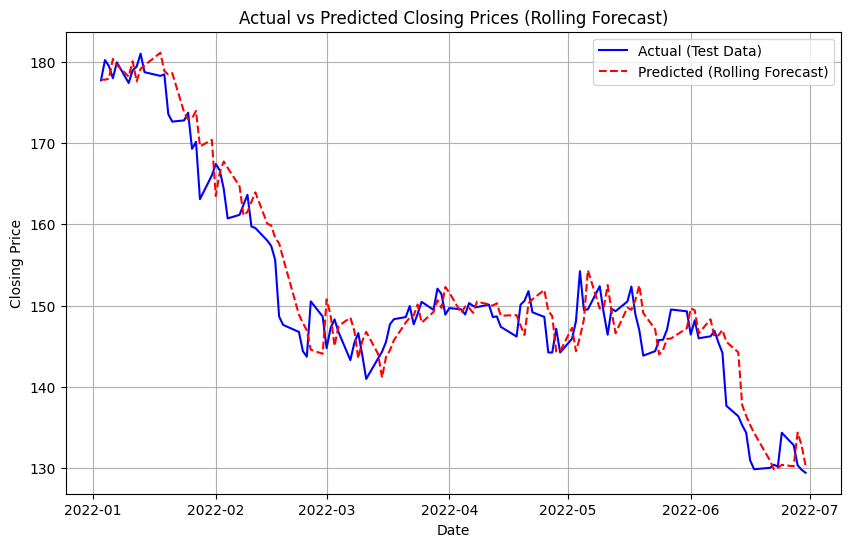

Mean Absolute Percentage Error (MAPE) with Rolling Forecast: 1.77%


In [ ]:
# Use closing prices for training and test data
closing_prices_train = train_mmm_data['Close']
closing_prices_test = test_mmm_data['Close']

# Initialize a list to store predictions
rolling_predictions = []

# Start rolling forecast
history = closing_prices_train.copy()  # Initial training data

for t in range(len(closing_prices_test)):
    # Fit the model using the current training data (history)
    ar_model = AutoReg(history, lags=1).fit()

    # Predict the next value (one step ahead)
    next_prediction = ar_model.predict(start=history.index[-1], end=history.index[-1])[0]

    # Append the prediction to the list
    rolling_predictions.append(next_prediction)

    # Add the actual test data point to the history (walk-forward)
    history = pd.concat([history, pd.Series(closing_prices_test.iloc[t], index=[closing_prices_test.index[t]])])

# Convert rolling predictions to a pandas series for plotting
rolling_predictions = pd.Series(rolling_predictions, index=closing_prices_test.index)

# Plot actual vs predicted values on test data
plt.figure(figsize=(10, 6))

# Plot actual closing prices from test data
plt.plot(closing_prices_test.index, closing_prices_test, label='Actual (Test Data)', color='blue')

# Plot rolling forecast predictions
plt.plot(rolling_predictions.index, rolling_predictions, label='Predicted (Rolling Forecast)', color='red', linestyle='--')

# Add labels and title
plt.title('Actual vs Predicted Closing Prices (Rolling Forecast)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Optionally, calculate Mean Absolute Percentage Error (MAPE) on test data
residuals = closing_prices_test - rolling_predictions
mape = (abs(residuals) / closing_prices_test).mean() * 100
print(f"Mean Absolute Percentage Error (MAPE) with Rolling Forecast: {mape:.2f}%")

This is pretty good, right? We are able to predict with just 1.77% error. However, I tried doing a simulation experiment where we followed this model predictions to make trades accordingly. The strategy is to invest and long the 10000 dollars worth of MMM stock if the predicted price tomorrow were to increase from today, or to divest and short the 10000 dollars worth of MMM stock if the predicted price tomorrow were to decrease from today.

In [ ]:
# Starting capital
initial_capital = 10000
capital = initial_capital

# Store all profits or losses for each trade
trade_results = []

# Assume no position at the beginning
position = None  # 'long' or 'short'
entry_price = 0

# Simulate trades
for i in range(1, len(test_mmm_data)):
    actual_today = closing_prices_test.iloc[i-1]
    actual_tomorrow = closing_prices_test.iloc[i]
    predicted_today = rolling_predictions.iloc[i-1]
    predicted_tomorrow = rolling_predictions.iloc[i]
    
    # Determine trade direction based on predicted prices
    if predicted_tomorrow > predicted_today:  # Predicted price increase -> Go Long
        if position != 'long':  # Enter a long position
            position = 'long'
            entry_price = actual_today
        # Calculate profit/loss if the position is closed
        if i == len(test_mmm_data) - 1 or rolling_predictions.iloc[i+1] < predicted_tomorrow:  # Close position at the end or predicted decrease
            profit = (actual_tomorrow - entry_price) / entry_price * capital
            trade_results.append(profit)
            capital += profit  # Update capital
            position = None  # Close position
    elif predicted_tomorrow < predicted_today:  # Predicted price decrease -> Go Short
        if position != 'short':  # Enter a short position
            position = 'short'
            entry_price = actual_today
        # Calculate profit/loss if the position is closed
        if i == len(test_mmm_data) - 1 or rolling_predictions.iloc[i+1] > predicted_tomorrow:  # Close position at the end or predicted increase
            profit = (entry_price - actual_tomorrow) / entry_price * capital
            trade_results.append(profit)
            capital += profit  # Update capital
            position = None  # Close position

# Final capital after all trades
final_capital = capital

# Profit or loss summary
total_profit_or_loss = final_capital - initial_capital
percentage_return = (total_profit_or_loss / initial_capital) * 100

print(f"Initial Capital: ${initial_capital:.2f}")
print(f"Final Capital: ${final_capital:.2f}")
print(f"Total Profit/Loss: ${total_profit_or_loss:.2f}")
print(f"Percentage Return: {percentage_return:.2f}%")

Initial Capital: $10000.00
Final Capital: $8603.38
Total Profit/Loss: $-1396.62
Percentage Return: -13.97%


The result was that we lost 1396 dollars! How come? This is because MAPE does not give us the directional accuracy of this model, and simply only gives us the percentage of the residual as a proportion of the actual data, and this residual is absolute, so devoid of direction. However, when it comes to trading, direction matters a lot, and hence I made another function that finds out the directional accuracy of this model, meaning how many times it predicted in the correct direction in a measure of percentage upon the sample space of how many actual test data there are.

In [ ]:
# Calculate directional accuracy (whether the predicted direction matches actual direction)
correct_direction = (rolling_predictions.diff().dropna().apply(lambda x: 1 if x > 0 else -1) == closing_prices_test.diff().dropna().apply(lambda x: 1 if x > 0 else -1))

# Calculate percentage of correct predictions in terms of direction
directional_accuracy = correct_direction.mean() * 100
print(f"Directional Accuracy: {directional_accuracy:.2f}%")

Directional Accuracy: 44.72%


Hence, directional accuracy wise, this model is not amazing because it only predicts in the correct direction error 44% of the time. I attempted to use another evaluator function that combines the MAPE and directional accuracy to test out how reliable the model is, which is hybrid directional symmetry. It gives a score between 0 and 1, where 1 means it is a perfect model, 0 means it is a really really poor model.

In [ ]:
# Calculate MAPE
mape = (abs(closing_prices_test - rolling_predictions) / closing_prices_test).mean()

# Calculate directional accuracy
predicted_movements = rolling_predictions.diff().dropna()
actual_movements = closing_prices_test.diff().dropna()

correct_direction = (predicted_movements.apply(lambda x: 1 if x > 0 else -1) == actual_movements.apply(lambda x: 1 if x > 0 else -1))
directional_accuracy = correct_direction.mean()

# Hybrid Directional Symmetry (HDS)
hds = (1 - mape) * directional_accuracy

print(f"MAPE: {mape * 100:.2f}%")
print(f"Directional Accuracy: {directional_accuracy * 100:.2f}%")
print(f"Hybrid Directional Symmetry (HDS): {hds:.2f}")

MAPE: 1.77%
Directional Accuracy: 44.72%
Hybrid Directional Symmetry (HDS): 0.44


Next, we are going to go into Moving Average model, and the difference is that moving average sees to it that, to derive the next closing price, you need to take the mu (some mean) that the entire model gravitates about, and a linear combination of errors in the previous lags multiplied with some co-efficients. Now, in order to choose your q, which is the lagged variables you want to include in this linear combination, you need to satisfy the condition of correlation between the current variable and the lagged variable of interest. We can check this via looking at your autocorrelation function. Does it shut off to 0 after a certain "q" number of lagged variables? Referring back to our graph of ACF, no it does not. Hence, moving average model might not be applicable because if it were to use it, we need to have so many moving averages till the autocorrelation decays to zero gradually and slowly at some large value q. 

That's when I realised, maybe the model is flawed because there was no stationarity when we checked, but we still went ahead with using the data without transforming it to ensure stationarity. I did transform it, however, to avoid stationarity. I want to now run ARIMA, basically ARMA, but on the first differences of the closing prices, instead of pure normal ARMA. Better yet, I want to try my hand at running SARIMA actually, but to do that, I need to test on whether or not my data is seasonal or not. My training data says it is not, but I do not know if my test data is. Hence, I need to go run this.

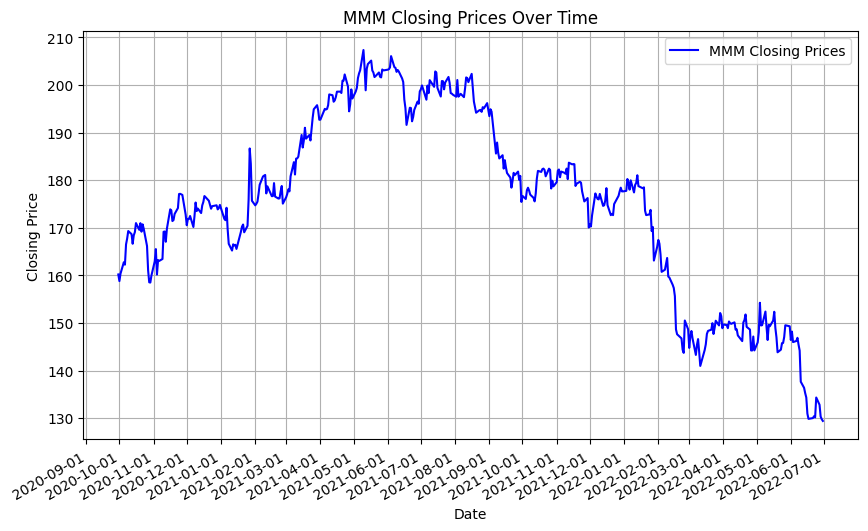

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Date' column is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Filter for MMM's closing prices and set 'Date' as the index
mmm_data2 = merged_data[merged_data['Symbol'] == 'MMM'].set_index('Date')

# Plot the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(mmm_data2.index, mmm_data2['Close'], label='MMM Closing Prices', color='blue')

# Formatting the x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('MMM Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


From a visual check, there is no seasonality detected in this data. Hence, in fact there is no need to do a SARIMA. ARIMA would do just fine. Hence, I am going to take the first difference in my closing prices and check both ACF and PACF for them.

<Figure size 1000x600 with 0 Axes>

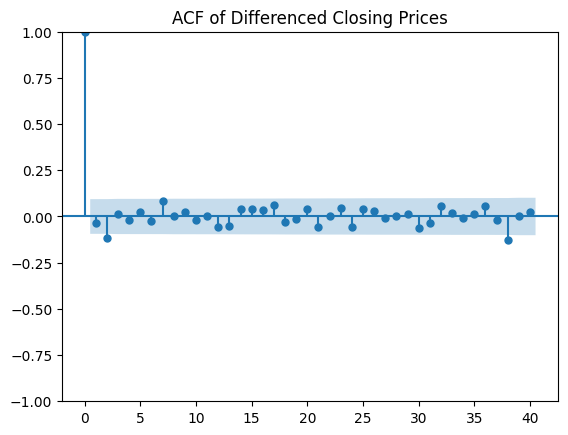

<Figure size 1000x600 with 0 Axes>

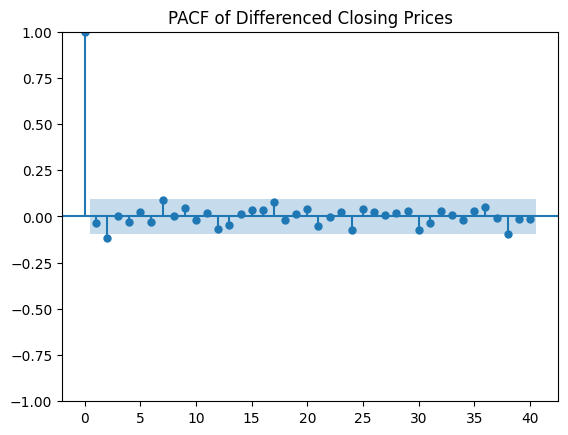

In [ ]:
# Calculate the differences
mmm_data2['Diff_Close'] = mmm_data2['Close'].diff().dropna()

# Drop any NaN values that result from differencing
mmm_data2.dropna(inplace=True)

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(mmm_data2['Diff_Close'], lags=40)
plt.title('ACF of Differenced Closing Prices')
plt.show()

# Plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(mmm_data2['Diff_Close'], lags=40)
plt.title('PACF of Differenced Closing Prices')
plt.show()

From this I see that the lags 2 and 38 play the greatest part in both the ACF and PACF plot. Hence I am going to try doing an ARIMA model, with ARIMA(2,1,2) where p refers to the order of the AR, 1 refers to the dth difference of the integrated feature, q refers to the order of the MA. Specifically I want it to use the lagged variables 2 and 38. So let's try.

In [ ]:
# Assuming 'Date' is already set as the index of mmm_data2 and it's in datetime format
training_data = mmm_data2[mmm_data2.index < '2022-01-01']


from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Fit a model with (38, 1, 38) on training data
model = SARIMAX(training_data['Close'], order=(38, 1, 38), enforce_stationarity=False, enforce_invertibility=False)
result = model.fit(disp=False)

# Extract the initial AR and MA coefficients
ar_params = result.params.filter(like='ar.L')
ma_params = result.params.filter(like='ma.L')

# Create arrays to hold the modified coefficients
custom_ar = np.zeros(38)  # Array to store AR parameters, with size up to lag 38
custom_ma = np.zeros(38)  # Array to store MA parameters, with size up to lag 38

# Retain coefficients only for lags 2, 7, and 38; set others to zero
for lag in [2, 7, 38]:
    if f"ar.L{lag}" in ar_params.index:
        custom_ar[lag - 1] = ar_params[f"ar.L{lag}"]
    if f"ma.L{lag}" in ma_params.index:
        custom_ma[lag - 1] = ma_params[f"ma.L{lag}"]

# Display manually adjusted coefficients
print("Adjusted AR coefficients (only lags 2, 7, 38):", custom_ar)
print("Adjusted MA coefficients (only lags 2, 7, 38):", custom_ma)


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimi

Adjusted AR coefficients (only lags 2, 7, 38): [ 0.         -0.27927713  0.          0.          0.          0.
  0.18237506  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.10801493]
Adjusted MA coefficients (only lags 2, 7, 38): [ 0.          0.09651487  0.          0.          0.          0.
 -0.10620194  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.03991105]


In [ ]:
# Assuming 'Date' is already set as the index of mmm_data2 and it's in datetime format
test_data = mmm_data2[mmm_data2.index >= '2022-01-01']

# Forecasting on the test data length
forecast_steps = len(test_data)

# Use the model to make predictions
predictions = result.get_forecast(steps=forecast_steps)
predicted_values = predictions.predicted_mean

# Align predicted values with the test data index
predicted_values.index = test_data.index

# Print the predicted values
print(predicted_values)


Date
2022-01-03    177.073159
2022-01-04    178.128224
2022-01-05    178.362477
2022-01-06    178.678402
2022-01-07    179.943655
                 ...    
2022-06-24    176.826267
2022-06-27    177.261975
2022-06-28    176.947351
2022-06-29    177.064880
2022-06-30    177.190075
Name: predicted_mean, Length: 124, dtype: float64


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data['Close'], predicted_values)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 17.76%


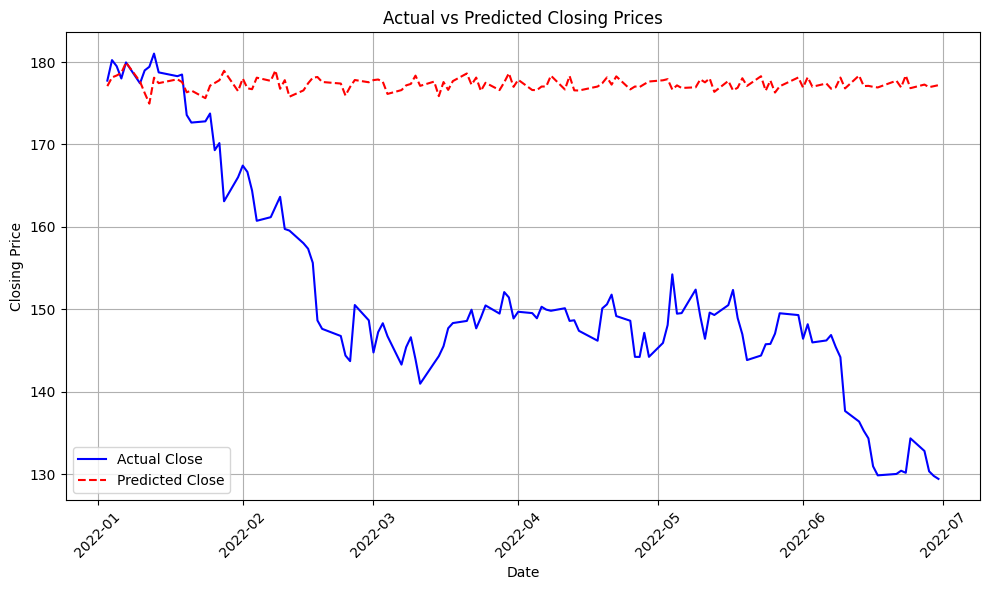

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Close', color='blue')
plt.plot(predicted_values.index, predicted_values, label='Predicted Close', color='red', linestyle='--')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After that I attempted to do a model whereby we solely just take 2, 7 and 38 as lagged variables, then do a rolling forecast. However, I realised that would be too time-consuming and this is not standard practice from research papers. Standard practices mentioned that I had to compare different ARIMAs from orders of 1 to 3, for both AR and MA.

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Function to calculate Adjusted R-Squared
def adjusted_r_squared(r_squared, n, k):
    return 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

# Function to fit ARIMA model and return metrics including Adjusted R-Squared
def fit_arima_and_evaluate(order, training_data, test_data):
    # Fit the ARIMA model on training data
    model = SARIMAX(training_data['Close'], order=order, enforce_stationarity=False, enforce_invertibility=False)
    result = model.fit(disp=False)
    
    # Generate predictions on the test data
    forecast = result.get_forecast(steps=len(test_data))
    predicted_mean = forecast.predicted_mean
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(test_data['Close'], predicted_mean)
    
    # Calculate R-Squared
    r_squared = r2_score(test_data['Close'], predicted_mean)
    
    # Calculate Adjusted R-Squared
    n = len(test_data)  # Number of observations in the test set
    k = len(result.params) - 1  # Number of parameters in the model (excluding intercept)
    adj_r_squared = adjusted_r_squared(r_squared, n, k)
    
    aic = result.aic

    return mape, r_squared, adj_r_squared, aic 

# Function to perform rolling forecast evaluation including Adjusted R-Squared
def rolling_forecast_evaluation(order, training_data, test_data):
    history = list(training_data['Close'])
    predictions = []
    aic_values = []

    for t in range(len(test_data)):
        model = SARIMAX(history, order=order, enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        
        # Make one-step forecast
        yhat = result.forecast(steps=1)[0]
        predictions.append(yhat)

        # Store AIC for each rolling model
        aic_values.append(result.aic)
        
        # Update the history with the observed value
        history.append(test_data['Close'].iloc[t])

    # Calculate MAPE and R-Squared for rolling forecast
    mape = mean_absolute_percentage_error(test_data['Close'], predictions)
    r_squared = r2_score(test_data['Close'], predictions)
    
    # Calculate Adjusted R-Squared for rolling forecast
    n = len(test_data)  # Number of observations in the test set
    k = len(result.params) - 1  # Number of parameters in the model (excluding intercept)
    adj_r_squared = adjusted_r_squared(r_squared, n, k)

    # Calculate average AIC for rolling forecast
    avg_aic = sum(aic_values) / len(aic_values) if aic_values else None
    
    
    return mape, r_squared, adj_r_squared, avg_aic 

# Define the ARIMA configurations to test
arima_orders = [
    (1, 1, 1), (2, 1, 1), (3, 1, 1),
    (1, 1, 2), (1, 1, 3), (2, 1, 2),
    (2, 1, 3), (3, 1, 2), (3, 1, 3)
]

# Store results
results = []

# Loop through each ARIMA configuration
for order in arima_orders:
    print(f"Evaluating ARIMA{order}...")
    
    # Evaluation on direct test data predictions
    mape_test, r2_test, adj_r2_test, aic_test  = fit_arima_and_evaluate(order, training_data, test_data)
    
    # Evaluation on rolling forecast
    mape_rolling, r2_rolling, adj_r2_rolling, avg_aic_rolling = rolling_forecast_evaluation(order, training_data, test_data)
    
    # Store results
    results.append({
        'Order': order,
        'MAPE (Test Data)': mape_test,
        'R-Squared (Test Data)': r2_test,
        'Adjusted R-Squared (Test Data)': adj_r2_test,
        'AIC (Test Data)': aic_test,
        'MAPE (Rolling)': mape_rolling,
        'R-Squared (Rolling)': r2_rolling,
        'Adjusted R-Squared (Rolling)': adj_r2_rolling,
        'AIC (Rolling)': avg_aic_rolling
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)


Evaluating ARIMA(1, 1, 1)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(2, 1, 1)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(3, 1, 1)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(1, 1, 2)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(1, 1, 3)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(2, 1, 2)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(2, 1, 3)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(3, 1, 2)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


Evaluating ARIMA(3, 1, 3)...


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


       Order  MAPE (Test Data)  R-Squared (Test Data)  \
0  (1, 1, 1)          0.178756              -4.058212   
1  (2, 1, 1)          0.179937              -4.124141   
2  (3, 1, 1)          0.179867              -4.120174   
3  (1, 1, 2)          0.179721              -4.112046   
4  (1, 1, 3)          0.180071              -4.131726   
5  (2, 1, 2)          0.178953              -4.069443   
6  (2, 1, 3)          0.179767              -4.114768   
7  (3, 1, 2)          0.179969              -4.126130   
8  (3, 1, 3)          0.179288              -4.088013   

   Adjusted R-Squared (Test Data)  AIC (Test Data)  MAPE (Rolling)  \
0                       -4.141819      1360.420044        0.012136   
1                       -4.252245      1359.203595        0.012083   
2                       -4.292281      1357.487069        0.012116   
3                       -4.239847      1355.329423        0.012120   
4                       -4.304221      1349.956386        0.011991   
5        

With all the evaluations done above, I have come to a conclusion that in terms of rolling forecast, an ARIMA model of (1,1,3) is the best, as it gave a very competitive R-squared and also the lowest MAPE and AIC. 

C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


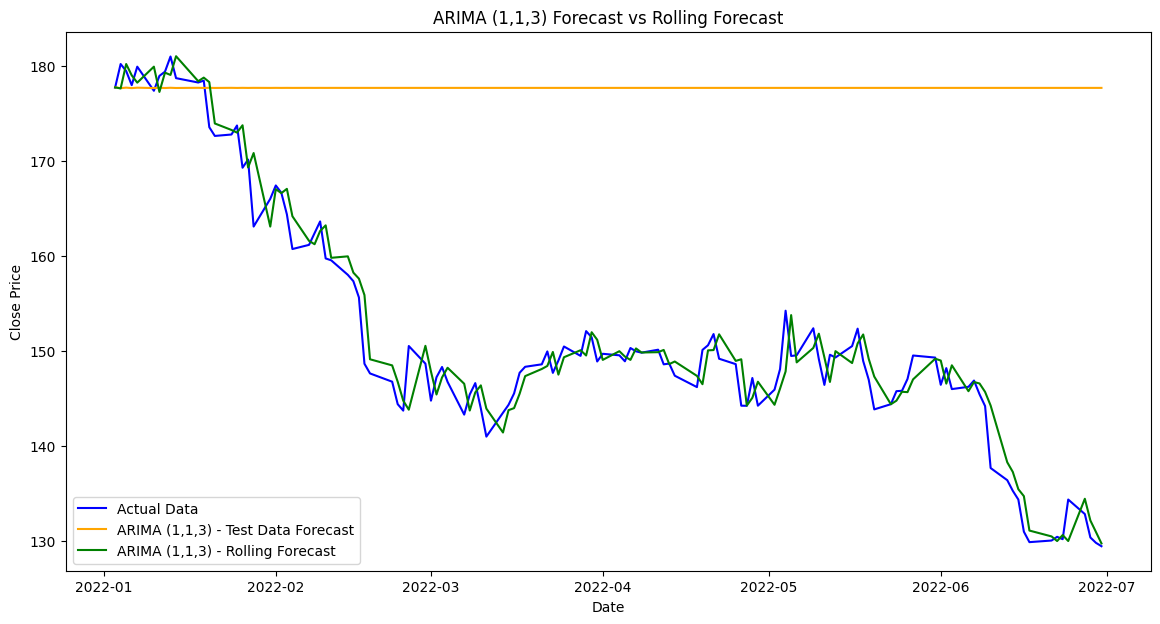

In [ ]:
import matplotlib.pyplot as plt

# Define the order for the model you want to plot
selected_order = (1, 1, 3)

# Run the evaluation to get the predictions for both test data and rolling forecast
mape_test, r2_test, adj_r2_test, aic_test = fit_arima_and_evaluate(selected_order, training_data, test_data)
mape_rolling, r2_rolling, adj_r2_rolling, avg_aic_rolling = rolling_forecast_evaluation(selected_order, training_data, test_data)

# Generate predictions for direct ARIMA forecast (test data)
model = SARIMAX(training_data['Close'], order=selected_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit(disp=False)
forecast = result.get_forecast(steps=len(test_data))
predicted_mean_test = forecast.predicted_mean

# Generate predictions for rolling forecast
history = list(training_data['Close'])
predictions_rolling = []

for t in range(len(test_data)):
    model = SARIMAX(history, order=selected_order, enforce_stationarity=False, enforce_invertibility=False)
    result = model.fit(disp=False)
    yhat = result.forecast(steps=1)[0]
    predictions_rolling.append(yhat)
    history.append(test_data['Close'].iloc[t])

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual test data
plt.plot(test_data.index, test_data['Close'], label='Actual Data', color='blue')

# Plot direct ARIMA test data predictions
plt.plot(test_data.index, predicted_mean_test, label='ARIMA (1,1,3) - Test Data Forecast', color='orange')

# Plot rolling forecast predictions
plt.plot(test_data.index, predictions_rolling, label='ARIMA (1,1,3) - Rolling Forecast', color='green')

# Add titles and labels
plt.title('ARIMA (1,1,3) Forecast vs Rolling Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()

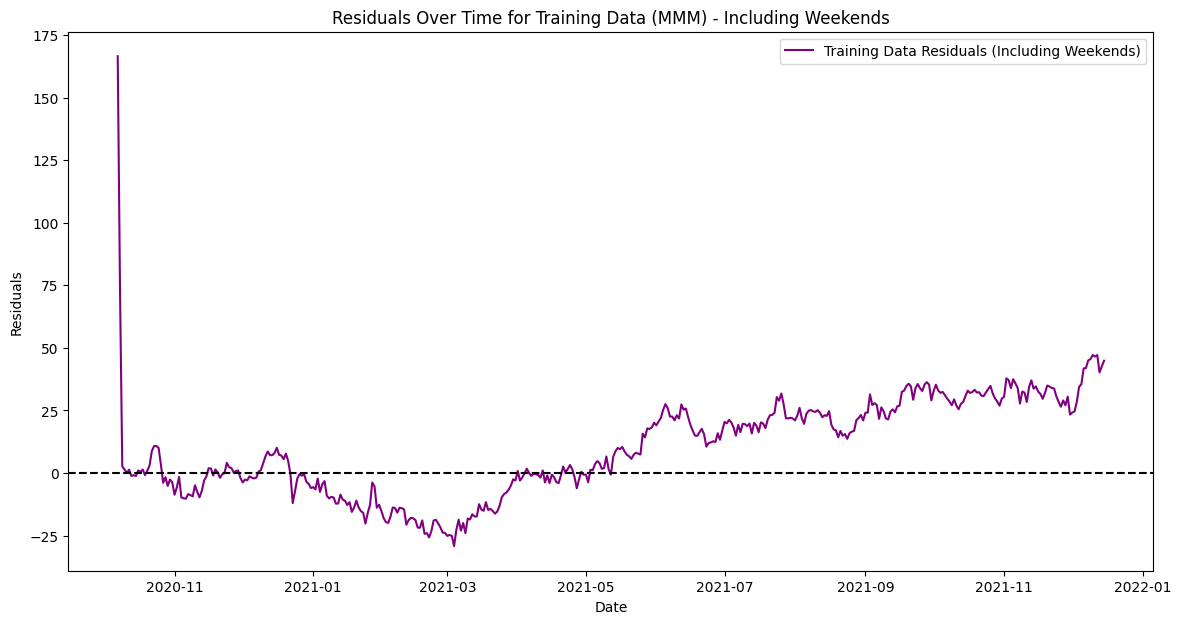

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a date range that includes all days (including weekends) in the training data period
full_date_range = pd.date_range(start=training_data.index.min(), end=training_data.index.max(), freq='D')

# Reindex training_data to include all dates in the range, and forward-fill missing weekend values
training_data_full = training_data.reindex(full_date_range).ffill()

# Now, align the fitted values from the ARIMA model with this updated training data
train_fitted_values = pd.Series(result.fittedvalues, index=training_data_full.index[:len(result.fittedvalues)])

# Calculate residuals with this new, weekend-included training data
train_residuals = training_data_full['Close'] - train_fitted_values

# Plot the residuals
plt.figure(figsize=(14, 7))
plt.plot(train_residuals.index, train_residuals, label="Training Data Residuals (Including Weekends)", color="purple")
plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at zero for reference
plt.title("Residuals Over Time for Training Data (MMM) - Including Weekends")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()


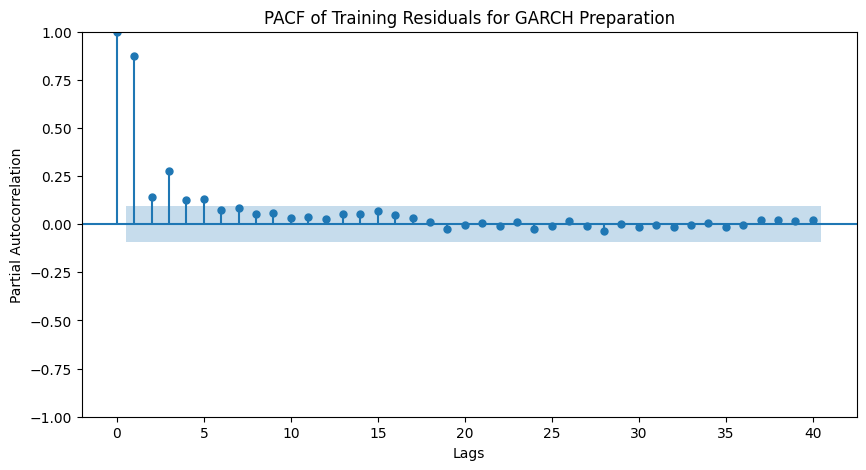

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot PACF for the training residuals to prepare for GARCH
plt.figure(figsize=(10, 5))
plot_pacf(train_residuals.dropna(), lags=40, ax=plt.gca(), title="PACF of Training Residuals for GARCH Preparation")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.show()



Since PACF shuts off somewhat after 3, we are going to go with GARCH of p=3. As for q, I have decided to try 1 first. Let's see how that goes!

In [ ]:
from arch import arch_model
import matplotlib.pyplot as plt

# Step 1: Ensure that train_residuals are defined (residuals from ARIMA model fitted on training data)

# Step 2: Fit the GARCH(3,1) model on the training data residuals
garch_model = arch_model(train_residuals.dropna(), vol='Garch', p=3, q=1)  # vol='Garch' specifies a GARCH model
garch_result = garch_model.fit(disp='off')  # disp='off' to suppress output

# Step 3: Display the GARCH model summary
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1736.39
Distribution:                  Normal   AIC:                           3484.79
Method:            Maximum Likelihood   BIC:                           3509.24
                                        No. Observations:                  435
Date:                Thu, Oct 31 2024   Df Residuals:                      434
Time:                        17:00:29   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2164      0.573     -0.377      0.706 [ -1.340,  0.90

Since the beta coefficient is very small and alpha 3 coefficient is also small, and their p-values are very big, we are going to drop them and retire to an ARCH of (2,0) instead.

In [ ]:

# Step 2: Fit the GARCH(2,0) model on the training data residuals
garch_model = arch_model(train_residuals.dropna(), vol='Garch', p=2, q=0)  # vol='Garch' specifies a GARCH model
garch_result = garch_model.fit(disp='off')  # disp='off' to suppress output

# Step 3: Display the GARCH model summary
print(garch_result.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1755.42
Distribution:                  Normal   AIC:                           3518.83
Method:            Maximum Likelihood   BIC:                           3535.13
                                        No. Observations:                  435
Date:                Thu, Oct 31 2024   Df Residuals:                      434
Time:                        17:00:29   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            19.0213      1.937      9.821  9.165e-23 [ 15.225, 22.81

Now we have a high p-value for alpha 2 and a low coefficient for it too. So let's just do ARCH 1.

In [ ]:

# Step 2: Fit the GARCH(2,0) model on the training data residuals
garch_model = arch_model(train_residuals.dropna(), vol='Garch', p=1, q=0)  # vol='Garch' specifies a GARCH model
garch_result = garch_model.fit(disp='off')  # disp='off' to suppress output

# Step 3: Display the GARCH model summary
print(garch_result.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1738.77
Distribution:                  Normal   AIC:                           3483.54
Method:            Maximum Likelihood   BIC:                           3495.77
                                        No. Observations:                  435
Date:                Thu, Oct 31 2024   Df Residuals:                      434
Time:                        17:00:29   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2510      0.694      0.362      0.718 [ -1.109,  1.61

Date
2022-01-03   -0.030671
2022-01-04    2.546266
2022-01-05    1.750251
2022-01-06    0.309251
2022-01-07    2.216382
dtype: float64


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


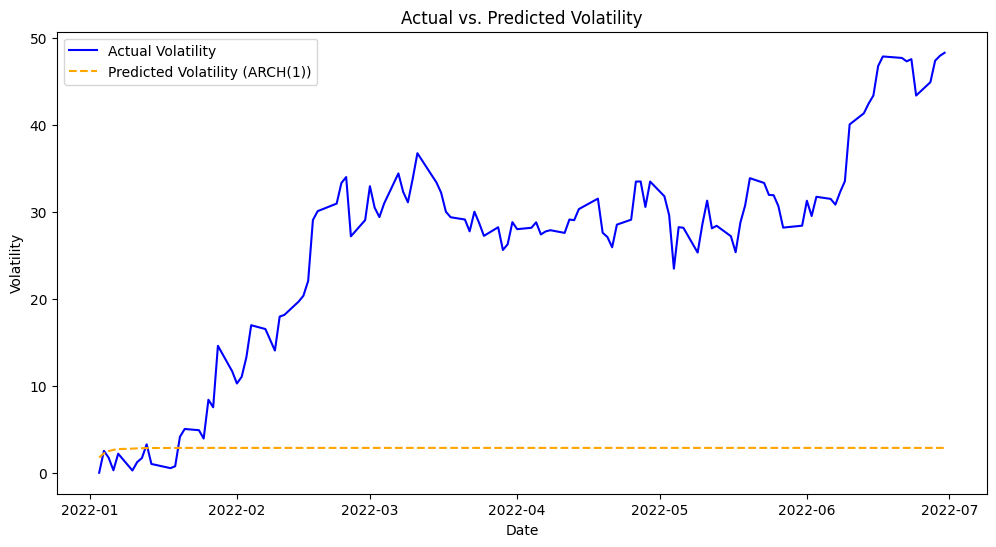

In [ ]:

# Fit the ARIMA model on the training data
model = SARIMAX(training_data['Close'], order=selected_order, enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

# Forecast for the test data period
forecast = fitted_model.get_forecast(steps=len(test_data))
predicted_mean_test = forecast.predicted_mean

# Align indexes of forecasted values with test data
predicted_mean_test.index = test_data.index

# Calculate test residuals
test_residuals = test_data['Close'] - predicted_mean_test

# Print the first few test residuals to verify
print(test_residuals.head())

# Assuming you already have the fitted ARCH(1) model on the training residuals
# Forecast the conditional volatility for the test data period
# `horizon` is the length of the test data
forecast_horizon = len(test_data)
arch_forecast = garch_result.forecast(horizon=forecast_horizon)

# Extract the predicted conditional volatility for the test period
predicted_volatility = np.sqrt(arch_forecast.variance.values[-forecast_horizon:])  # Take the square root to get standard deviation

# Ensure predicted_volatility is one-dimensional
predicted_volatility = predicted_volatility.flatten()

# Calculate the actual volatility from test data
# You can use the squared residuals from the ARIMA model on the test data as a proxy for actual volatility
# This assumes `test_residuals` has been computed as `test_data['Close'] - predicted_values_from_ARIMA`
actual_volatility = np.sqrt(test_residuals ** 2)

# Plot the actual vs. predicted volatility
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, actual_volatility, label='Actual Volatility', color='blue')
plt.plot(test_data.index, predicted_volatility, label='Predicted Volatility (ARCH(1))', color='orange', linestyle='--')
plt.title('Actual vs. Predicted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


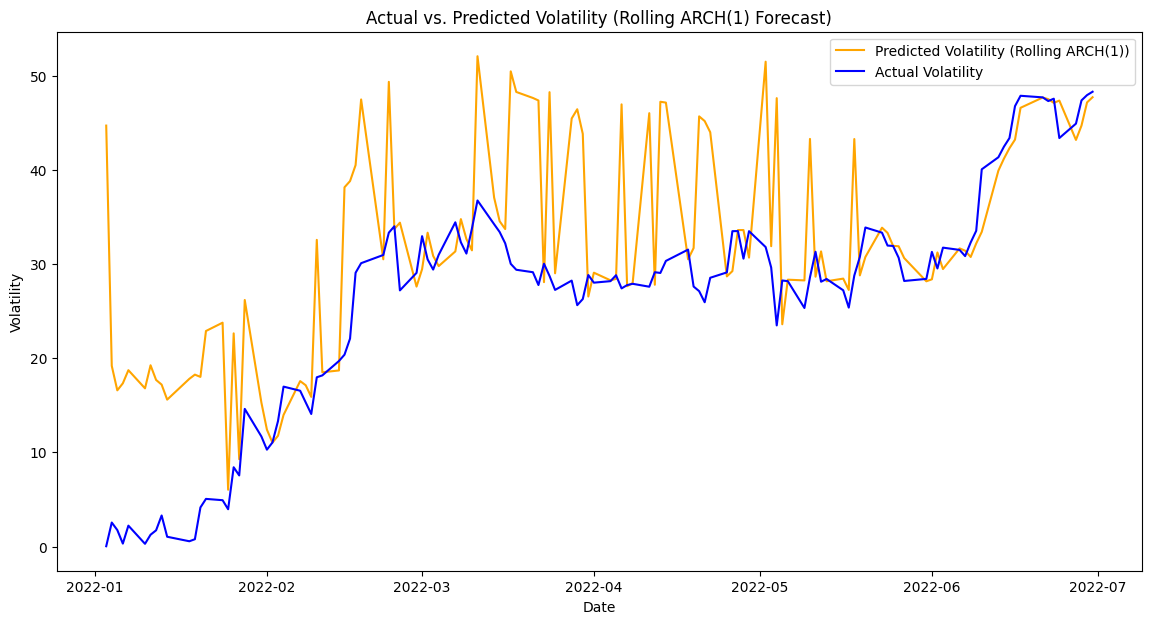

In [ ]:
# Fit initial ARCH(1) model on the training residuals
arch_model_fitted = arch_model(train_residuals.dropna(), vol='Garch', p=1, q=0).fit(disp="off")

# Prepare a list to store predicted volatilities
rolling_volatility_forecast = []

# Rolling forecast over the test data
history_residuals = list(train_residuals.dropna())  # Start with training residuals

for t in range(len(test_data)):
    # Update the ARCH model with the current residual history
    rolling_arch_model = arch_model(history_residuals, vol='Garch', p=1, q=0).fit(disp="off")
    
    # Forecast the next period's volatility
    forecast = rolling_arch_model.forecast(horizon=1)
    next_volatility = np.sqrt(forecast.variance.values[-1, 0])  # Standard deviation (volatility)
    
    # Append the predicted volatility for this step
    rolling_volatility_forecast.append(next_volatility)
    
    # Update history with the actual residual of the test set (from the ARIMA prediction)
    # This requires you to have ARIMA predicted residuals on the test data
    test_residual = test_data['Close'].iloc[t] - predicted_mean_test.iloc[t]  # Residual on test data
    history_residuals.append(test_residual)

# Convert rolling volatility forecast to a DataFrame for easier plotting
rolling_volatility_forecast = pd.Series(rolling_volatility_forecast, index=test_data.index)

# Plot the actual vs predicted volatility over the test period
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, rolling_volatility_forecast, label='Predicted Volatility (Rolling ARCH(1))', color='orange')
plt.plot(test_data.index, actual_volatility, label='Actual Volatility', color='blue')
plt.title('Actual vs. Predicted Volatility (Rolling ARCH(1) Forecast)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()











C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

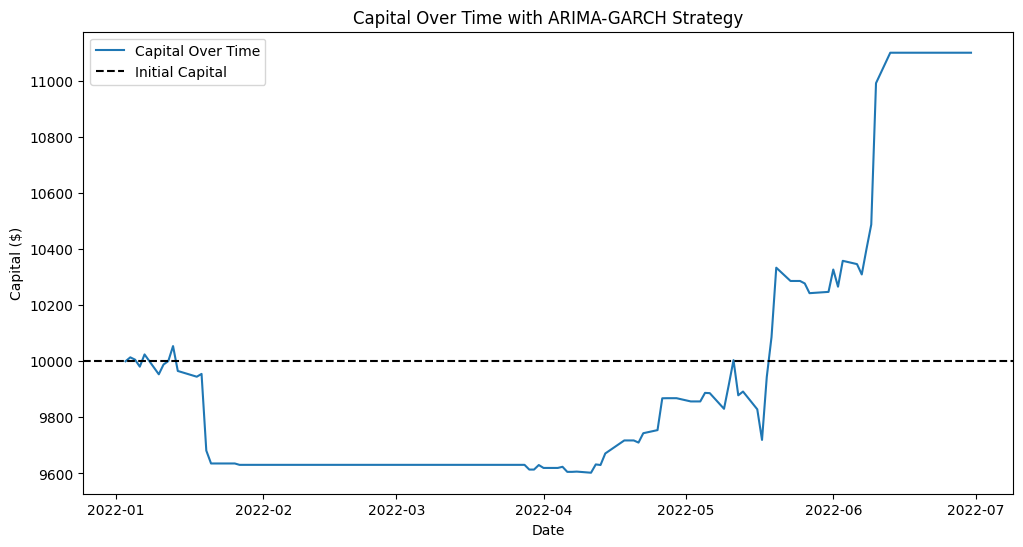

Final Capital: $11100.58


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

# Define initial capital
initial_capital = 10000
capital = initial_capital
position = 0  # Position in stock (positive for long, negative for short)
position_value = 0  # Value of the position in dollars
cash = capital  # Cash in hand

# Prepare a list to store capital over time
capital_history = []

# Fit the ARIMA model on training data
fitted_model = ARIMA(training_data['Close'], order=(1, 1, 3)).fit()

# Obtain training residuals
train_residuals = training_data['Close'] - fitted_model.fittedvalues

# Fit initial ARCH(1) model on the training residuals
arch_model_fitted = arch_model(train_residuals.dropna(), vol='Garch', p=1, q=0).fit(disp="off")

# Rolling forecast for ARIMA and GARCH
history_residuals = list(train_residuals.dropna())  # Start with training residuals
historical_volatility = []

# Perform rolling simulation on the test data
for t in range(len(test_data)):
    # Update ARIMA forecast
    arima_forecast = fitted_model.forecast(steps=1).iloc[0]
    
    # Update ARCH model with history and forecast volatility
    rolling_arch_model = arch_model(history_residuals, vol='Garch', p=1, q=0).fit(disp="off")
    garch_forecast = rolling_arch_model.forecast(horizon=1).variance.iloc[-1, 0]
    predicted_volatility = np.sqrt(garch_forecast)  # Standard deviation of volatility
    
    # Add the predicted volatility to historical_volatility for threshold calculation
    historical_volatility.append(predicted_volatility)
    volatility_threshold = np.mean(historical_volatility)*1.5  # Average historical volatility
    
    daily_return = (test_data['Close'].iloc[t] - arima_forecast) / arima_forecast
    
    # Trading logic based on ARIMA prediction and GARCH volatility forecast
    if daily_return > 0 and predicted_volatility < volatility_threshold:
        # Buy signal with increased position for lower volatility
        position_size = capital * 0.1
        position += position_size / test_data['Close'].iloc[t]
        cash -= position_size
    elif daily_return < 0 and predicted_volatility < volatility_threshold:
        # Short signal with increased position for lower volatility
        position_size = capital * 0.1
        position -= position_size / test_data['Close'].iloc[t]
        cash += position_size
    elif predicted_volatility > volatility_threshold:
        # Exit all positions if volatility is high
        cash += position * test_data['Close'].iloc[t]
        position = 0  # Reset position to zero

    # Update capital based on new position
    position_value = position * test_data['Close'].iloc[t]
    capital = cash + position_value
    capital_history.append(capital)
    
    # Append the residual of the test data
    test_residual = test_data['Close'].iloc[t] - arima_forecast
    history_residuals.append(test_residual)

# Convert capital history to a DataFrame for plotting
capital_history = pd.Series(capital_history, index=test_data.index)

# Plot the capital over time
plt.figure(figsize=(12, 6))
plt.plot(capital_history, label='Capital Over Time')
plt.axhline(y=initial_capital, color='black', linestyle='--', label='Initial Capital')
plt.title('Capital Over Time with ARIMA-GARCH Strategy')
plt.xlabel('Date')
plt.ylabel('Capital ($)')
plt.legend()
plt.show()

# Final capital
final_capital = capital_history.iloc[-1]
print(f"Final Capital: ${final_capital:.2f}")



# Holt-Winter's Exponential Smoothing

References for HWES codes:

Filho, M. (2023, July 12). How To Do Time Series Cross-Validation in Python. Forecastegy. https://forecastegy.com/posts/time-series-cross-validation-python/

Khan, E. (2021, Jan 5). Python Code on Holt-Winters Forecasting. Medium. https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

statsmodels.tsa.holtwinters.ExponentialSmoothing. (2024, Oct 3). statsmodels. https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

Given the stock information of at least the past 5 days of one particular company, try to predict the closing price of that company on a particular day

Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error

Load training set and process date to ensure it is parseable

In [2]:
# Load the dataset
train_data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")
# Print the first few rows and the columns of the DataFrame
print("Columns in the DataFrame:", train_data.columns)
print(train_data.head())

# Convert 'Date' to datetime, handling errors
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')

# Check for NaT values after conversion
if train_data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(train_data[train_data['Date'].isnull()])

Columns in the DataFrame: Index(['Date', 'Close', 'Volume', 'Symbol', 'News - Positive Sentiment',
       'News - Negative Sentiment', 'News - New Products', 'News - Layoffs',
       'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
       'News - Corporate Earnings', 'News - Mergers & Acquisitions',
       'News - Store Openings', 'News - Product Recalls',
       'News - Adverse Events', 'News - Personnel Changes',
       'News - Stock Rumors', 'GICS Sector', 'Headquarters Location',
       'Founded', 'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4',
       'Close_lag_5', 'Day', 'Month', 'Weekday'],
      dtype='object')
         Date       Close   Volume Symbol  News - Positive Sentiment  \
0  2020-09-30  100.940002  1362200      A                       14.0   
1  2020-10-01  101.220001   723600      A                        0.0   
2  2020-10-02  100.010002   712200      A                        0.0   
3  2020-10-05  103.120003   803900      A                 

C:\Users\Admin\AppData\Local\Temp\ipykernel_25712\2972640794.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")


Define your company of interest and obtain its closing price for the days in training set (n>= 5)

In [3]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest
company = 'MMM' 

# Filter data for the specific company
company_data = train_data[train_data['Symbol'] == company]

# Check if company is in dataset
if company_data.empty:
    raise ValueError(f"No data found for company: {company}")

# Set the 'Date' column as the index
company_data.set_index('Date', inplace=True)

# Ensure we have at least 5 days of data
if len(company_data) < 5:
    raise ValueError("Not enough data to predict. At least 5 days are required.")

# YOU CAN CHANGE HOW MANY DAYS YOU WANT TO TRAIN YOUR MODEL HERE
# train n days for modeling - we will use entire length of training set
train_n_days = company_data['Close']

# Ensure 'train_n_days' is not empty
if train_n_days.empty:
    raise ValueError("No closing price data available for modeling.")

Perform Rolling-window Cross Validation

In [4]:
# Define rolling window parameters
n = len(train_n_days)
train_size = int(n * 0.8)
test_size = n - train_size
roll_window = 1


library ExponentialSmoothing automatically finds optimal alpha, beta and gamma parameters but we still need to determine if parameters trend and seasonal are additive or multiplicative

In [5]:
# Define parameter combinations
param_combinations = [
    ('add', 'add'),
    ('add', 'mul'),
    ('mul', 'add'),
    ('mul', 'mul')
]

results = []

# Rolling window cross-validation
for start in range(0, test_size, roll_window):
    train = train_n_days.iloc[:train_size + start]
    test = train_n_days.iloc[train_size + start: train_size + start + roll_window]
    
    for trend, seasonal in param_combinations:
        try:
            model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=7) #weekly seasonality
            fit = model.fit()
            
            # Forecast the next value
            forecast = fit.forecast(roll_window)
            
            # Calculate RMSE
            rmse = root_mean_squared_error(test, forecast) 
            
            results.append({
                'trend': trend,
                'seasonal': seasonal,
                'start': start,
                'rmse': rmse,
            })
        except Exception as e:
            print(f"Error fitting model with trend={trend} and seasonal={seasonal}: {e}")

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Summarize results
summary = results_df.groupby(['trend', 'seasonal']).agg({'rmse': 'mean'}).reset_index()
print(summary)

# Find the row with the minimum RMSE
lowest_rmse_row = summary.loc[summary['rmse'].idxmin()]

# Extract the trend and seasonal values
lowest_trend = lowest_rmse_row['trend']
lowest_seasonal = lowest_rmse_row['seasonal']

print(f"Lowest RMSE: {lowest_rmse_row['rmse']}")
print(f"Trend: {lowest_trend}, Seasonal: {lowest_seasonal}")

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

  trend seasonal      rmse
0   add      add  1.266823
1   add      mul  1.267996
2   mul      add  1.267100
3   mul      mul  1.267164
Lowest RMSE: 1.2668226851080036
Trend: add, Seasonal: add


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Us

Input the trend and seasonality, that gives the lowest RMSE found during cross validation, into Holt-Winter's model

In [6]:
# Fit the Holt-Winters model
model = ExponentialSmoothing(
    train_n_days,
    trend=lowest_trend,
    seasonal=lowest_seasonal,
    seasonal_periods=7
).fit()

print(model.summary())

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  317
Model:             ExponentialSmoothing   SSE                           1437.737
Optimized:                         True   AIC                            501.280
Trend:                         Additive   BIC                            542.628
Seasonal:                      Additive   AICC                           502.481
Seasonal Periods:                     7   Date:                 Sun, 03 Nov 2024
Box-Cox:                          False   Time:                         14:04:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9718336                alpha                 True
smoothing_trend          

Visualise Holt-Winter's smoothed values and actual values and calculate in-sample RMSE and MAPE

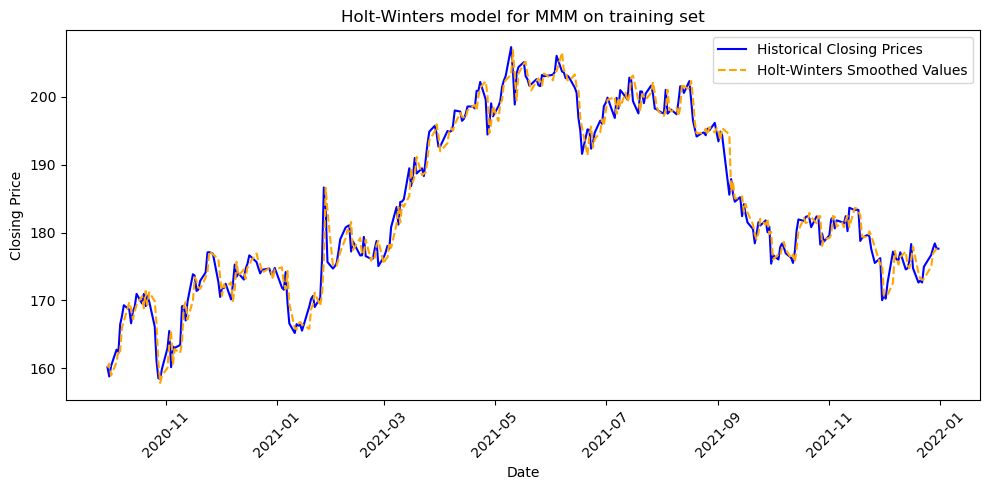

Predicted Closing Price for MMM on the next day: 178.15518978879842
RMSE between smoothed values and historical closing prices: 1.2668226851080036
MAPE between smoothed values and historical closing prices: 0.867%


In [7]:
# Prepare data for visualization
# CHANGE number of m days you want to see the historical closing prices if you did not train entire training set
historical_m_data = company_data['Close'][:]  
smoothed_values = model.fittedvalues

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(historical_m_data.index, historical_m_data, label='Historical Closing Prices', color='blue')
plt.plot(smoothed_values.index, smoothed_values, label='Holt-Winters Smoothed Values', color='orange', linestyle='--')
plt.title(f'Holt-Winters model for {company} on training set')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price and this model's RMSE and MAPE
print(f'Predicted Closing Price for {company} on the next day: {forecast.iloc[0]}')
print(f"RMSE between smoothed values and historical closing prices: {lowest_rmse_row['rmse']}")
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((np.array(train_n_days.values) - np.array(smoothed_values.values)) / np.array(train_n_days.values))) * 100
print(f'MAPE between smoothed values and historical closing prices: {mape:.3f}%')


Forecast using model above and compare against data in TEST set

In [8]:
# Load the dataset
test_data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\test_data.csv")
# Print the first few rows and the columns of the DataFrame
print("Columns in the DataFrame:", test_data.columns)
print(test_data.head())

# Convert 'Date' to datetime, handling errors
test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')

# Check for NaT values after conversion
if test_data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(test_data[test_data['Date'].isnull()])

Columns in the DataFrame: Index(['Date', 'Close', 'Volume', 'Symbol', 'News - Positive Sentiment',
       'News - Negative Sentiment', 'News - New Products', 'News - Layoffs',
       'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
       'News - Corporate Earnings', 'News - Mergers & Acquisitions',
       'News - Store Openings', 'News - Product Recalls',
       'News - Adverse Events', 'News - Personnel Changes',
       'News - Stock Rumors', 'GICS Sector', 'Headquarters Location',
       'Founded', 'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4',
       'Close_lag_5', 'Day', 'Month', 'Weekday'],
      dtype='object')
         Date       Close   Volume Symbol  News - Positive Sentiment  \
0  2022-01-03  156.479996  1606300      A                        0.0   
1  2022-01-04  151.190002  2234000      A                        0.0   
2  2022-01-05  148.600006  2370500      A                        0.0   
3  2022-01-06  149.119995  2298300      A                 

Make one-time forecast, plot against actual values and calculate the out-of-sample RMSE and MAPE

Date
2022-01-03    177.746721
2022-01-04    178.288537
2022-01-05    178.343158
2022-01-06    178.583250
2022-01-07    178.268219
                 ...    
2022-06-24    184.192707
2022-06-27    184.734523
2022-06-28    184.789145
2022-06-29    185.029236
2022-06-30    184.714205
Length: 124, dtype: float64


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


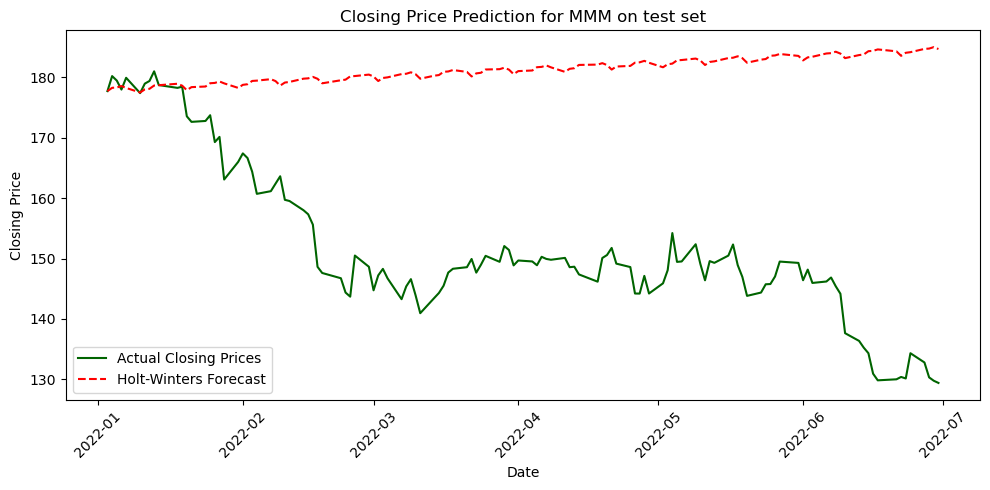

Predicted Closing Price for MMM on the next day: 177.74672104906853
RMSE between forecast values and actual closing prices: 32.82129716061761
MAPE between forecast values and actual closing prices: 20.408%


In [9]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest
test_company ='MMM'

# Filter data for the specific company
test_company_data = test_data[test_data['Symbol'] == test_company]

# Ensure company is in the dataset
if test_company_data.empty:
    raise ValueError(f"No data found for company: {test_company}")

# Set the 'Date' column as the index
test_company_data.set_index('Date', inplace=True)

# Forecast target company's closing price for the length of test set
forecast = model.forecast(steps=len(test_company_data))

# Prepare data for visualization
# CHANGE number of m days you want to see the historical closing prices if you did not choose entire test set
test_historical_m_data = test_company_data['Close']

# Align predicted values with the test data index
forecast.index = test_historical_m_data.index

# Print the predicted values
print(forecast)

# Calcualte RMSE between actual values and smoothed values
test_rmse = root_mean_squared_error(forecast.values, test_historical_m_data.values)

# Calculate MAPE
test_mape = np.mean(np.abs((np.array(forecast.values) - np.array(test_historical_m_data.values)) / np.array(test_historical_m_data.values))) * 100


# Visualization
plt.figure(figsize=(10, 5))
plt.plot(test_historical_m_data.index, test_historical_m_data, label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast.index, forecast, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.title(f'Closing Price Prediction for {test_company} on test set')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price and print its performance metrics
print(f'Predicted Closing Price for {test_company} on the next day: {forecast.iloc[0]}')
print(f"RMSE between forecast values and actual closing prices: {test_rmse}")
print(f'MAPE between forecast values and actual closing prices: {test_mape:.3f}%')

Combine both plots to visualise how the model fitted the training data and forecasted against the test data

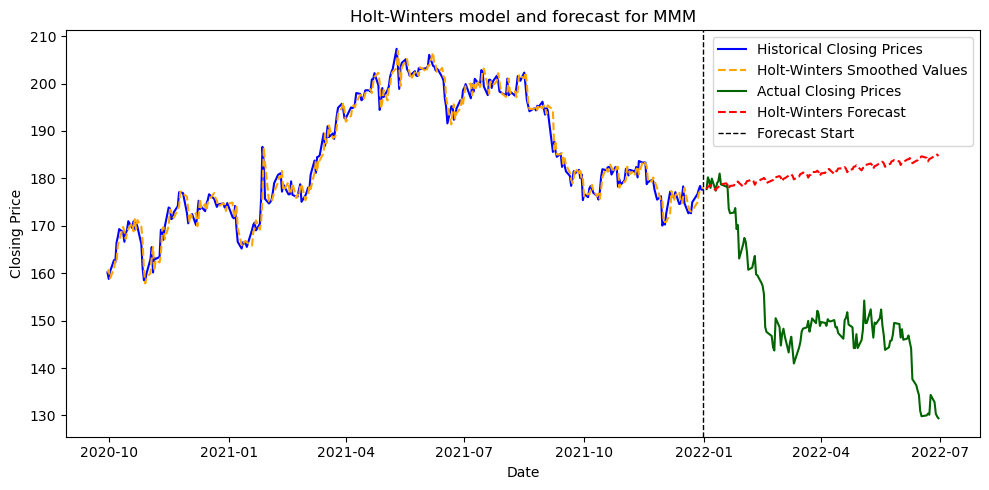

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(historical_m_data.index, historical_m_data, label='Historical Closing Prices', color='blue')
plt.plot(smoothed_values.index, smoothed_values, label='Holt-Winters Smoothed Values', color='orange', linestyle='--')
plt.title(f'Holt-Winters model and forecast for {company}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(test_historical_m_data.index, test_historical_m_data, label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast.index, forecast, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.axvline(x=historical_m_data.index[-1], color='black', linewidth=1, linestyle='--', label='Forecast Start')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
hw_mape_dict = {'MMM':20.408, 'XOM':20.176, 'SHW':46.053, 'AMZN':22.950, 'PG':10.982, 'JNJ':2.193, 'JPM':27.188, 'AAPL':19.832, 'GOOGL':25.370, 'NEE':26.247, 'AMT':22.516}

hw_mape_mean = sum(hw_mape_dict.values()) / len(hw_mape_dict.values())  
print(f"Mean of MAPE values: {hw_mape_mean:.3f}%")

Mean of MAPE values: 22.174%


Rolling Forecast Origin

a more responsive forecasting method compared to traditional one-time forecasting technique above

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  440
Model:             ExponentialSmoothing   SSE                           2108.277
Optimized:                         True   AIC                            711.415
Trend:                         Additive   BIC                            756.369
Seasonal:                      Additive   AICC                           712.269
Seasonal Periods:                     7   Date:                 Sun, 03 Nov 2024
Box-Cox:                          False   Time:                         14:04:24
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9382674                alpha                 True
smoothing_trend          

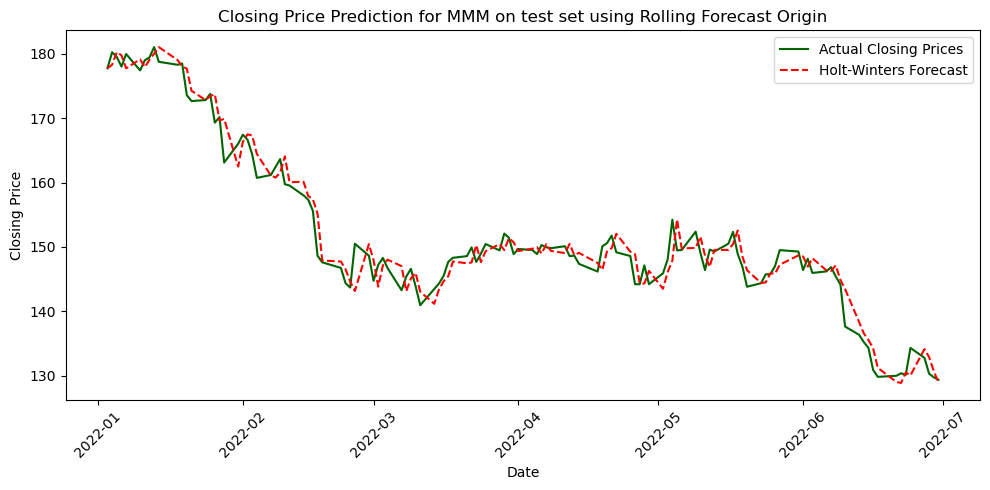

Predicted Closing Price for MMM on the next day: 177.74672104906853
RMSE between forecast values and actual closing prices: 2.357546992577983
MAPE between forecast values and actual closing prices: 1.2187%


In [12]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest 
test_company = 'MMM'

# Filter data for the specific company
test_company_data = test_data[test_data['Symbol'] == test_company]

# Ensure company is in the dataset
if test_company_data.empty:
    raise ValueError(f"No data found for company: {test_company}")

# Set the 'Date' column as the index
test_company_data.set_index('Date', inplace=True)

# Pre-existing training data from above
train_n_days = company_data['Close']

# Prepare to store forecasts and actual values
forecasts = []
actual_values = []

# Start rolling forecast from the last day of the train set
for i in range(len(test_company_data)):
    # Combine the training data with the current test data point
    combined_data = pd.concat([train_n_days, test_company_data['Close'][:i-1 + 1]])
    
    # Fit the Holt-Winters model
    model = ExponentialSmoothing(combined_data, trend=lowest_trend, seasonal=lowest_seasonal, seasonal_periods=7)
    model_fit = model.fit(optimized=True)
    
    # Forecast the next value
    forecast = model_fit.forecast(steps=1)
    forecasts.append(forecast.values[0])
    actual_values.append(test_company_data['Close'].iloc[i])

print(model_fit.summary())

# Align predicted values with the test data index for visualisation
forecast_index = test_company_data.index
forecast_series = pd.Series(forecasts, index=forecast_index)

# Calculate RMSE and MAPE
test_rmse = root_mean_squared_error(actual_values, forecasts)
test_mape = np.mean(np.abs((np.array(actual_values) - np.array(forecasts)) / np.array(actual_values))) * 100

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(test_company_data.index, test_company_data['Close'], label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast_series.index, forecast_series, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.title(f'Closing Price Prediction for {test_company} on test set using Rolling Forecast Origin')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price and print its performance metrics
print(f'Predicted Closing Price for {test_company} on the next day: {forecast_series.iloc[0]}')
print(f"RMSE between forecast values and actual closing prices: {test_rmse}")
print(f'MAPE between forecast values and actual closing prices: {test_mape:.4f}%')


Combine the two plots again to see the complete graph of how the model fits the training data and forecasts against test data, using Rolling Forecast Origin this time round

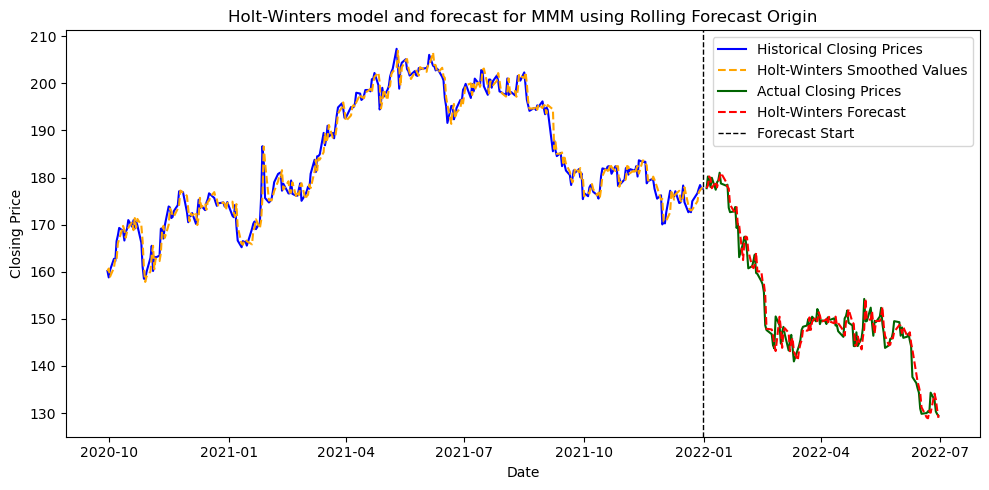

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(historical_m_data.index, historical_m_data, label='Historical Closing Prices', color='blue')
plt.plot(smoothed_values.index, smoothed_values, label='Holt-Winters Smoothed Values', color='orange', linestyle='--')
plt.title(f'Holt-Winters model and forecast for {company} using Rolling Forecast Origin')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(test_company_data.index, test_company_data['Close'], label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast_series.index, forecast_series, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.axvline(x=historical_m_data.index[-1], color='black', linewidth=1, linestyle='--', label='Forecast Start')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
hw_mape_rfo_dict = {'MMM':1.2187, 'XOM':1.8773, 'SHW':1.7406, 'AMZN':2.5600, 'PG':1.1666, 'JNJ':0.9409, 'JPM':1.6110, 'AAPL':1.8110, 'GOOGL':1.0430, 'NEE':1.5474, 'AMT':1.5875}

hw_mape_rfo_mean = sum(hw_mape_rfo_dict.values()) / len(hw_mape_rfo_dict.values())  
print(f"Mean of rolling forecast origin MAPE values: {hw_mape_rfo_mean:.3f}%")

Mean of rolling forecast origin MAPE values: 1.555%


Given the stock information of at least the past 5 days of all companies, try to predict the closing price of one company on a particular day

some companies in training set and some companies only in test set

Load libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error

Load training set and process Date

In [16]:
# Load the dataset
train_data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")

# Convert 'Date' to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Check for NaT values after conversion
if train_data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(train_data[train_data['Date'].isnull()])

C:\Users\Admin\AppData\Local\Temp\ipykernel_25712\3966680002.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")


Training set= companies belonging in the same industry as target company, but excluding target company (test set)

Define your company of interest and obtain the average closing price for the days in training set (n>= 5)

In [17]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest
target_company = 'MMM'

# Ensure we have data for the target company
if target_company not in train_data['Symbol'].unique():
    raise ValueError(f"{target_company} is not in the dataset.")

# Filter data for the target company
target_data = train_data[train_data['Symbol'] == target_company].set_index('Date')

# Ensure we have enough data for the target company
if len(target_data) < 5:
    raise ValueError("Not enough data to predict. At least 5 days are required.")

# Get the industry of the target company
target_industry = target_data['GICS Sector'].iloc[0]
print(target_industry)

# Filter data for companies in the same industry, excluding the target company
industry_data = train_data[(train_data['GICS Sector'] == target_industry) & (train_data['Symbol'] != target_company)]

# # YOU CAN CHANGE HOW MANY DAYS YOU WANT TO TRAIN YOUR MODEL HERE
# Train n days for modeling - we will use entire length of training set
train_n_days_target = target_data['Close']

# Train n days of data for all companies in the same industry excluding the target company
train_n_days_industry = industry_data[industry_data['Date'].isin(train_n_days_target.index)]

# Calculate the average closing price for the last n days, excluding the target company
avg_train_n_days = train_n_days_industry.groupby('Date')['Close'].mean()


Industrials


Perform rolling-window cross validation

In [18]:
# Define rolling window parameters
n = len(avg_train_n_days)
train_size = int(n * 0.8)
test_size = n - train_size
roll_window = 1

library ExponentialSmoothing automatically finds optimal alpha, beta and gamma parameters but we still need to determine if parameters trend and seasonal are additive or multiplicative

In [19]:
# Define parameter combinations
param_combinations = [
    ('add', 'add'),
    ('add', 'mul'),
    ('mul', 'add'),
    ('mul', 'mul')
]

results = []

# Rolling window cross-validation
for start in range(0, test_size, roll_window):
    train = avg_train_n_days.iloc[:train_size + start]
    test = avg_train_n_days.iloc[train_size + start: train_size + start + roll_window]
    
    for trend, seasonal in param_combinations:
        try:
            model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=7) #weekly seasonality
            fit = model.fit()
            
            # Forecast the next value(s)
            forecast = fit.forecast(roll_window)
            
            # Calculate RMSE
            rmse = root_mean_squared_error(test, forecast)  
            
            results.append({
                'trend': trend,
                'seasonal': seasonal,
                'start': start,
                'rmse': rmse,
            })
        except Exception as e:
            print(f"Error fitting model with trend={trend} and seasonal={seasonal}: {e}")

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Summarize results
summary = results_df.groupby(['trend', 'seasonal']).agg({'rmse': 'mean'}).reset_index()
print(summary)

# Find the row with the minimum RMSE
lowest_rmse_row = summary.loc[summary['rmse'].idxmin()]

# Extract the trend and seasonal values
lowest_trend = lowest_rmse_row['trend']
lowest_seasonal = lowest_rmse_row['seasonal']

print(f"Lowest RMSE: {lowest_rmse_row['rmse']}")
print(f"Trend: {lowest_trend}, Seasonal: {lowest_seasonal}")

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

  trend seasonal      rmse
0   add      add  1.349795
1   add      mul  1.354288
2   mul      add  1.348974
3   mul      mul  1.354702
Lowest RMSE: 1.3489735400451357
Trend: mul, Seasonal: add


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Input the trend and seasonality, that gives the lowest RMSE found during cross validation, into Holt-Winter's model

In [20]:
# Fit the Holt-Winters model
model = ExponentialSmoothing(
    avg_train_n_days,
    trend=lowest_trend,
    seasonal=lowest_seasonal,
    seasonal_periods=7  # weekly seasonality
).fit()

print(model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  317
Model:             ExponentialSmoothing   SSE                            888.415
Optimized:                         True   AIC                            348.680
Trend:                   Multiplicative   BIC                            390.028
Seasonal:                      Additive   AICC                           349.882
Seasonal Periods:                     7   Date:                 Sun, 03 Nov 2024
Box-Cox:                          False   Time:                         14:04:52
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9590170                alpha                 True
smoothing_trend          

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Visualise Holt-Winter's smoothed values and actual values and calculate in-sample RMSE and MAPE

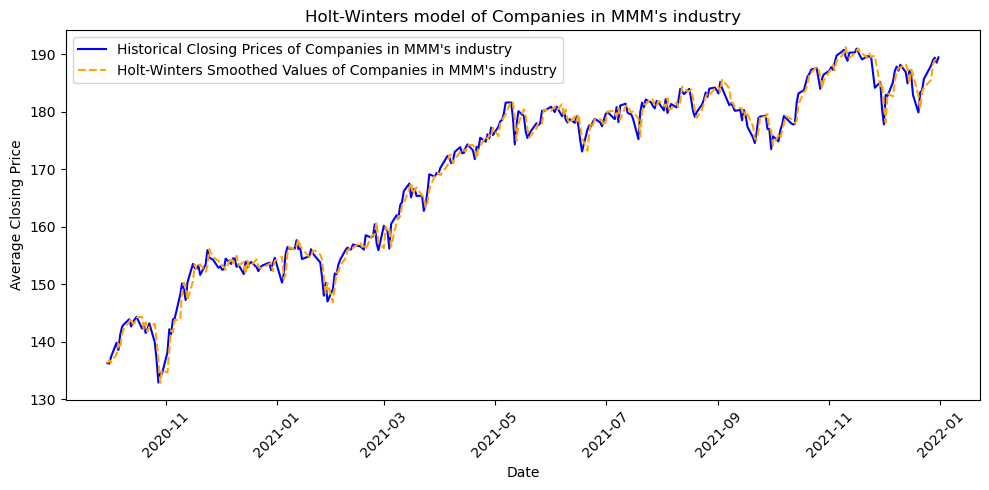

Predicted Average Closing Price for Companies in MMM's industry on the next day: 189.09423112176748
RMSE between smoothed values and historical closing prices: 1.6740883322406683
MAPE between smoothed values and historical closing prices: 0.7767%


In [21]:
# Prepare data for visualization
smoothed_values = model.fittedvalues

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(avg_train_n_days.index, avg_train_n_days, label=f"Historical Closing Prices of Companies in {target_company}'s industry", color='blue')
plt.plot(smoothed_values.index, smoothed_values, label= f"Holt-Winters Smoothed Values of Companies in {target_company}'s industry", color='orange', linestyle='--')
plt.title(f"Holt-Winters model of Companies in {target_company}'s industry")
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price
print(f"Predicted Average Closing Price for Companies in {target_company}'s industry on the next day: {forecast.iloc[0]}")

# Calcualte RMSE between actual values and smoothed values
rmse = root_mean_squared_error(avg_train_n_days.values, smoothed_values.values)
print(f"RMSE between smoothed values and historical closing prices: {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((avg_train_n_days.values - smoothed_values.values) / avg_train_n_days.values)) * 100
print(f'MAPE between smoothed values and historical closing prices: {mape:.4f}%')


Forecast using model above and compare against data in TEST set (the target company)

In [22]:
# Load the dataset
test_data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\test_data.csv")

# Convert 'Date' to datetime
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Check for NaT values after conversion
if test_data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(test_data[test_data['Date'].isnull()])

Make one-time forecast, plot against actual values and calculate the out-of-sample RMSE and MAPE

Date
2022-01-03    189.657489
2022-01-04    190.105665
2022-01-05    190.019169
2022-01-06    190.329804
2022-01-07    190.355127
                 ...    
2022-06-24    209.858670
2022-06-27    210.311464
2022-06-28    210.229586
2022-06-29    210.544841
2022-06-30    210.574784
Length: 124, dtype: float64


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


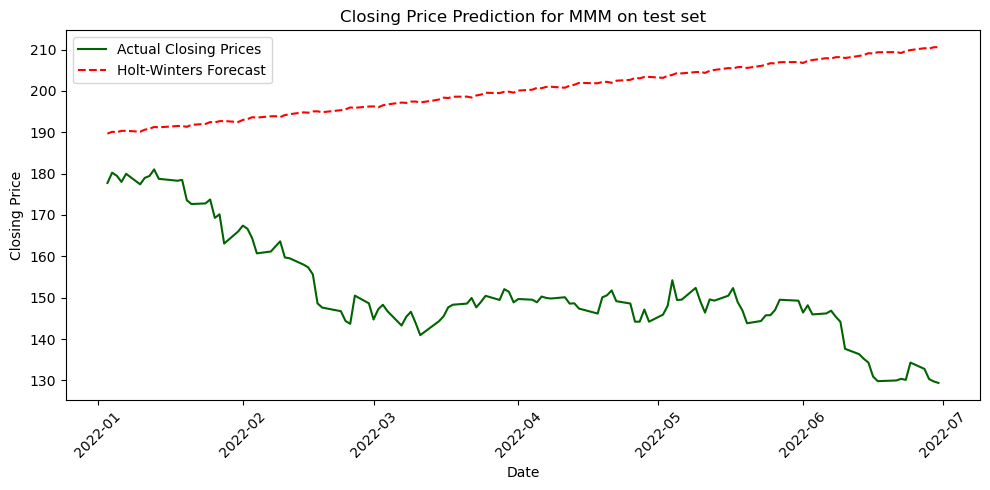

Predicted Closing Price for MMM on the next day: 189.657489402048
RMSE between forecast values and actual closing prices: 51.56321668047141
MAPE between forecast values and actual closing prices: 32.967%


In [23]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest
test_target_company = 'MMM'

# Ensure company is in the dataset
if test_target_company not in test_data['Symbol'].unique():
    raise ValueError(f"{test_target_company} is not in the dataset.")

# Filter data for the target company and set 'Date' column as index
test_target_data = test_data[test_data['Symbol'] == test_target_company].set_index('Date')

# Ensure we have at least 5 days of data
if len(test_target_data) < 5:
    raise ValueError("Not enough data to predict. At least 5 days are required.")

# Forecast target company's closing price for the length of test set
forecast = model.forecast(steps=len(test_target_data))

# Prepare data for visualization
# CHANGE number of m days you want to see the historical closing prices if you did not choose entire test set
test_historical_m_data = test_target_data['Close']

# Align predicted values with the test data index
forecast.index = test_historical_m_data.index

# Print the predicted values
print(forecast)

# Calcualte RMSE between actual values and smoothed values
test_rmse = root_mean_squared_error(forecast.values, test_historical_m_data.values)

# Calculate MAPE
test_mape = np.mean(np.abs((np.array(forecast.values) - np.array(test_historical_m_data.values)) / np.array(test_historical_m_data.values))) * 100


# Visualization
plt.figure(figsize=(10, 5))
plt.plot(test_historical_m_data.index, test_historical_m_data, label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast.index, forecast, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.title(f'Closing Price Prediction for {test_target_company} on test set')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price and print its performance metrics
print(f'Predicted Closing Price for {test_target_company} on the next day: {forecast.iloc[0]}')
print(f"RMSE between forecast values and actual closing prices: {test_rmse}")
print(f'MAPE between forecast values and actual closing prices: {test_mape:.3f}%')



Combine both plots to visualise how the model fitted the training data and forecasted against the test data

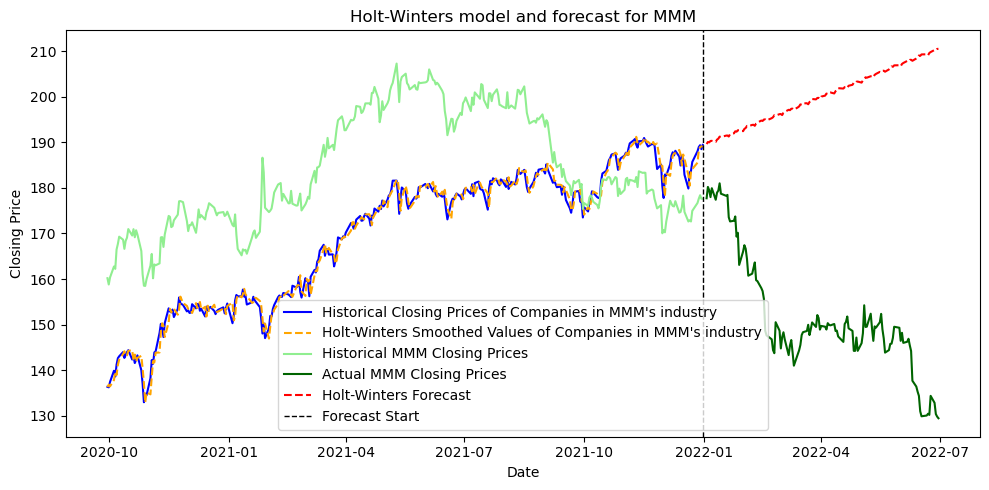

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(avg_train_n_days.index, avg_train_n_days, label=f"Historical Closing Prices of Companies in {target_company}'s industry", color='blue')
plt.plot(smoothed_values.index, smoothed_values, label=f"Holt-Winters Smoothed Values of Companies in {target_company}'s industry", color='orange', linestyle='--')
plt.title(f'Holt-Winters model and forecast for {target_company}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train_n_days_target.index, train_n_days_target, label=f'Historical {target_company} Closing Prices', color='lightgreen')
plt.plot(test_historical_m_data.index, test_historical_m_data, label=f'Actual {target_company} Closing Prices', color='darkgreen')
plt.plot(forecast.index, forecast, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.axvline(x=avg_train_n_days.index[-1], color='black', linewidth=1, linestyle='--', label='Forecast Start')
plt.legend()
plt.tight_layout()
plt.show()

Rolling Forecast Origin - test data of the target company is slowly added to training data (average Close prices of the related companies in training period)

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  440
Model:             ExponentialSmoothing   SSE                           1708.500
Optimized:                         True   AIC                            618.902
Trend:                   Multiplicative   BIC                            663.857
Seasonal:                      Additive   AICC                           619.757
Seasonal Periods:                     7   Date:                 Sun, 03 Nov 2024
Box-Cox:                          False   Time:                         14:05:08
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9146411                alpha                 True
smoothing_trend          

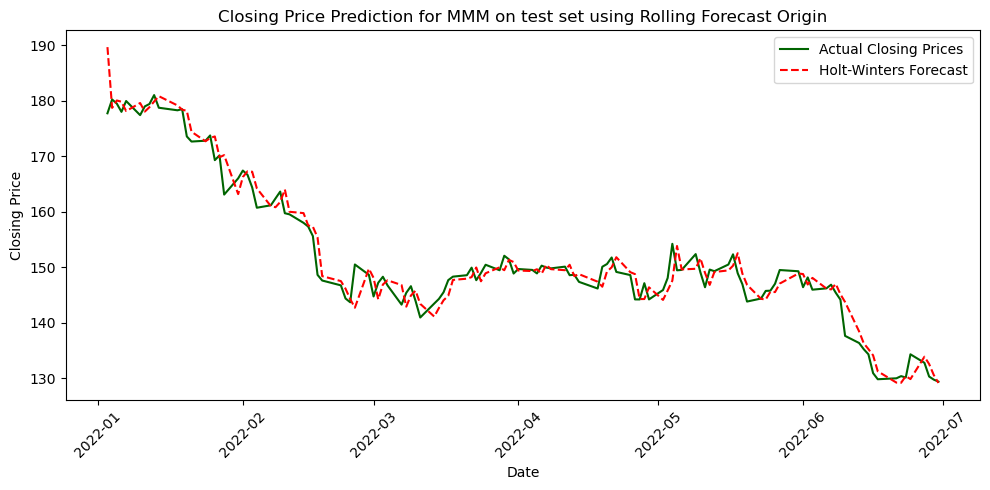

Predicted Closing Price for MMM on the next day: 189.657489402048
RMSE between forecast values and actual closing prices: 2.5993169887169287
MAPE between forecast values and actual closing prices: 1.2556%


In [25]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest 
test_company = 'MMM'

# Filter data for the specific company
test_company_data = test_data[test_data['Symbol'] == test_company]

# Ensure company is in the dataset
if test_company_data.empty:
    raise ValueError(f"No data found for company: {test_company}")

# Set the 'Date' column as the index
test_company_data.set_index('Date', inplace=True)

# Pre-existing training data from above
# avg_train_n_days 

# Prepare to store forecasts and actual values
forecasts = []
actual_values = []

# Start rolling forecast from the last day of training set
for i in range(len(test_company_data)):
    # Combine the training data with the current test data point
    combined_data = pd.concat([avg_train_n_days, test_company_data['Close'][:i-1 + 1]])
    
    # Fit the Holt-Winters model
    model = ExponentialSmoothing(combined_data, trend=lowest_trend, seasonal=lowest_seasonal, seasonal_periods=7)
    model_fit = model.fit(optimized=True)
    
    # Forecast the next value
    forecast = model_fit.forecast(steps=1)
    forecasts.append(forecast.values[0])
    actual_values.append(test_company_data['Close'].iloc[i])

print(model_fit.summary())

# Align predicted values with the test data index for visualisation
forecast_index = test_company_data.index
forecast_series = pd.Series(forecasts, index=forecast_index)

# Calculate RMSE and MAPE
test_rmse = root_mean_squared_error(actual_values, forecasts)
test_mape = np.mean(np.abs((np.array(actual_values) - np.array(forecasts)) / np.array(actual_values))) * 100

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(test_company_data.index, test_company_data['Close'], label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast_series.index, forecast_series, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.title(f'Closing Price Prediction for {test_company} on test set using Rolling Forecast Origin')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price and print its performance metrics
print(f'Predicted Closing Price for {test_company} on the next day: {forecast_series.iloc[0]}')
print(f"RMSE between forecast values and actual closing prices: {test_rmse}")
print(f'MAPE between forecast values and actual closing prices: {test_mape:.4f}%')

All companies in training set and all companies in test set

Training set= all S&P 500 companies, including target company

Define your company of interest and obtain the average closing price for the days in training set (n>= 5)

In [26]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest
target_company = 'MMM'

# Ensure we have data for the target company
if target_company not in train_data['Symbol'].unique():
    raise ValueError(f"{target_company} is not in the dataset.")

# Filter data for the target company
target_data = train_data[train_data['Symbol'] == target_company].set_index('Date')

# Ensure we have enough data for the target company
if len(target_data) < 5:
    raise ValueError("Not enough data to predict. At least 5 days are required.")

# YOU CAN CHANGE HOW MANY DAYS YOU WANT TO TRAIN YOUR MODEL HERE
# Train n days for modeling - we will use entire length of training set
train_n_days_target = target_data['Close']

# Get the last n days of data for all companies in the dataset
train_n_days_all = train_data[train_data['Date'].isin(train_n_days_target.index)]

# Calculate the average closing price for the last n days for all companies including the target company
avg_train_n_days_all = train_n_days_all.groupby('Date')['Close'].mean()


Perform rolling-window cross validation

In [27]:
# Define rolling window parameters
n = len(avg_train_n_days_all)
train_size = int(n * 0.8)
test_size = n - train_size
roll_window = 1  # Use a smaller value like 1 for rolling windows

In [28]:
# Define parameter combinations
param_combinations = [
    ('add', 'add'),
    ('add', 'mul'),
    ('mul', 'add'),
    ('mul', 'mul')
]

results = []

# Rolling window cross-validation
for start in range(0, test_size, roll_window):
    train = avg_train_n_days_all.iloc[:train_size + start]
    test = avg_train_n_days_all.iloc[train_size + start: train_size + start + roll_window]
    
    for trend, seasonal in param_combinations:
        try:
            model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=7) #weekly seasonality
            fit = model.fit()
            
            # Forecast the next value(s)
            forecast = fit.forecast(roll_window)
            
            # Calculate RMSE
            rmse = root_mean_squared_error(test, forecast)  
            
            results.append({
                'trend': trend,
                'seasonal': seasonal,
                'start': start,
                'rmse': rmse,
            })
        except Exception as e:
            print(f"Error fitting model with trend={trend} and seasonal={seasonal}: {e}")

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Summarize results
summary = results_df.groupby(['trend', 'seasonal']).agg({'rmse': 'mean'}).reset_index()
print(summary)

# Find the row with the minimum RMSE
lowest_rmse_row = summary.loc[summary['rmse'].idxmin()]

# Extract the trend and seasonal values
lowest_trend = lowest_rmse_row['trend']
lowest_seasonal = lowest_rmse_row['seasonal']

print(f"Lowest RMSE: {lowest_rmse_row['rmse']}")
print(f"Trend: {lowest_trend}, Seasonal: {lowest_seasonal}")

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

  trend seasonal      rmse
0   add      add  1.482946
1   add      mul  1.493265
2   mul      add  1.481911
3   mul      mul  1.489159
Lowest RMSE: 1.4819105323029511
Trend: mul, Seasonal: add


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Input the trend and seasonality, that gives the lowest RMSE found during cross validation, into Holt-Winter's model

In [29]:
# Fit the Holt-Winters model
model = ExponentialSmoothing(
    avg_train_n_days_all,
    trend=lowest_trend,
    seasonal=lowest_seasonal,
    seasonal_periods=7  # weekly seasonality
).fit()

print(model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  317
Model:             ExponentialSmoothing   SSE                            829.291
Optimized:                         True   AIC                            326.849
Trend:                   Multiplicative   BIC                            368.197
Seasonal:                      Additive   AICC                           328.050
Seasonal Periods:                     7   Date:                 Sun, 03 Nov 2024
Box-Cox:                          False   Time:                         14:05:38
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9556761                alpha                 True
smoothing_trend          

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Visualise Holt-Winter's smoothed values and actual values and calculate in-sample RMSE and MAPE

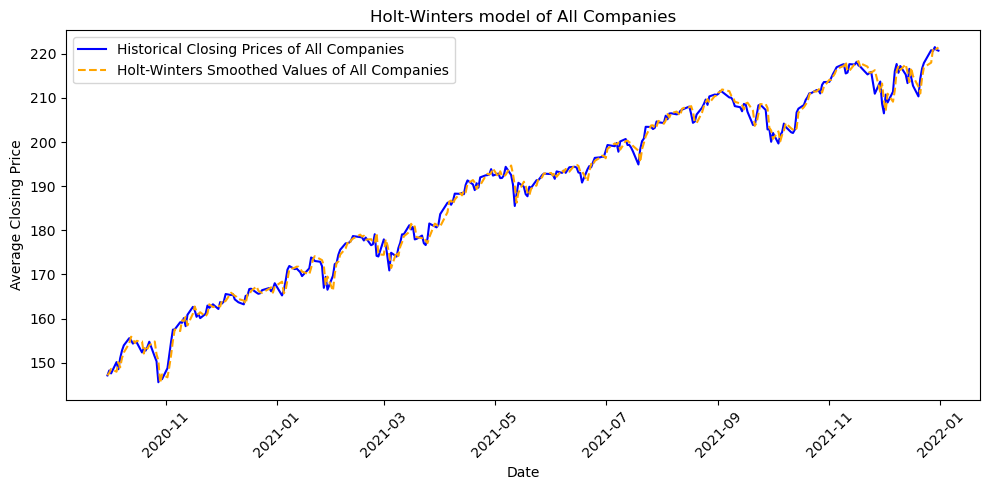

Predicted Average Closing Price for All Companies on the next day: 221.54173911827613
RMSE between smoothed values and actual closing prices: 1.61742344482224
MAPE between smoothed values and actual closing prices: 0.6682%


In [30]:
# Prepare data for visualization
smoothed_values = model.fittedvalues

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(avg_train_n_days_all.index, avg_train_n_days_all, label=f"Historical Closing Prices of All Companies", color='blue')
plt.plot(smoothed_values.index, smoothed_values, label= f"Holt-Winters Smoothed Values of All Companies", color='orange', linestyle='--')
plt.title(f"Holt-Winters model of All Companies")
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price
print(f"Predicted Average Closing Price for All Companies on the next day: {forecast.iloc[0]}")

# Calcualte RMSE between actual values and smoothed values
rmse = root_mean_squared_error(avg_train_n_days_all.values, smoothed_values.values)
print(f"RMSE between smoothed values and actual closing prices: {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((avg_train_n_days_all.values - smoothed_values.values) / avg_train_n_days_all.values)) * 100
print(f'MAPE between smoothed values and actual closing prices: {mape:.4f}%')


Forecast using model above and compare against data in TEST set

In [31]:
# Load the dataset
test_data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\test_data.csv")

# Convert 'Date' to datetime
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Check for NaT values after conversion
if test_data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(test_data[test_data['Date'].isnull()])


Make one-time forecast, plot against actual values and calculate the out-of-sample RMSE and MAPE

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Date
2022-01-03    221.160990
2022-01-04    221.527446
2022-01-05    221.649302
2022-01-06    222.038568
2022-01-07    222.212675
                 ...    
2022-06-24    250.614301
2022-06-27    250.994179
2022-06-28    251.129462
2022-06-29    251.532162
2022-06-30    251.719710
Length: 124, dtype: float64


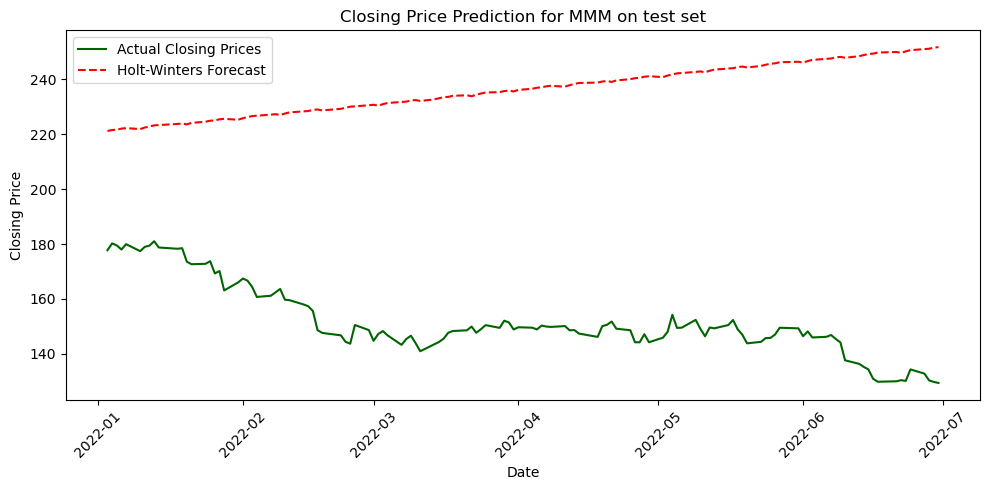

Predicted Closing Price for MMM on the next day: 221.16098950357951
RMSE between forecast values and actual closing prices: 86.92553628031966
MAPE between forecast values and actual closing prices: 57.065%


In [32]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest
test_target_company = 'MMM'

# Ensure company is in the dataset
if test_target_company not in test_data['Symbol'].unique():
    raise ValueError(f"{test_target_company} is not in the dataset.")

# Filter data for the target company and set 'Date' column as index
test_target_data = test_data[test_data['Symbol'] == test_target_company].set_index('Date')

# Ensure we have at least 5 days of data
if len(test_target_data) < 5:
    raise ValueError("Not enough data to predict. At least 5 days are required.")

# Forecast target company's closing price for the length of test set
forecast = model.forecast(steps=len(test_target_data))

# Prepare data for visualization
# CHANGE number of m days you want to see the historical closing prices if you did not choose entire test set
test_historical_m_data = test_target_data['Close']

# Align predicted values with the test data index
forecast.index = test_historical_m_data.index

# Print the predicted values
print(forecast)

# Calcualte RMSE between actual values and smoothed values
test_rmse = root_mean_squared_error(forecast.values, test_historical_m_data.values)

# Calculate MAPE
test_mape = np.mean(np.abs((np.array(forecast.values) - np.array(test_historical_m_data.values)) / np.array(test_historical_m_data.values))) * 100


# Visualization
plt.figure(figsize=(10, 5))
plt.plot(test_historical_m_data.index, test_historical_m_data, label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast.index, forecast, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.title(f'Closing Price Prediction for {test_target_company} on test set')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price and print its performance metrics
print(f'Predicted Closing Price for {test_target_company} on the next day: {forecast.iloc[0]}')
print(f"RMSE between forecast values and actual closing prices: {test_rmse}")
print(f'MAPE between forecast values and actual closing prices: {test_mape:.3f}%')

Combine both plots to visualise how the model fitted the training data and forecasted against the test data

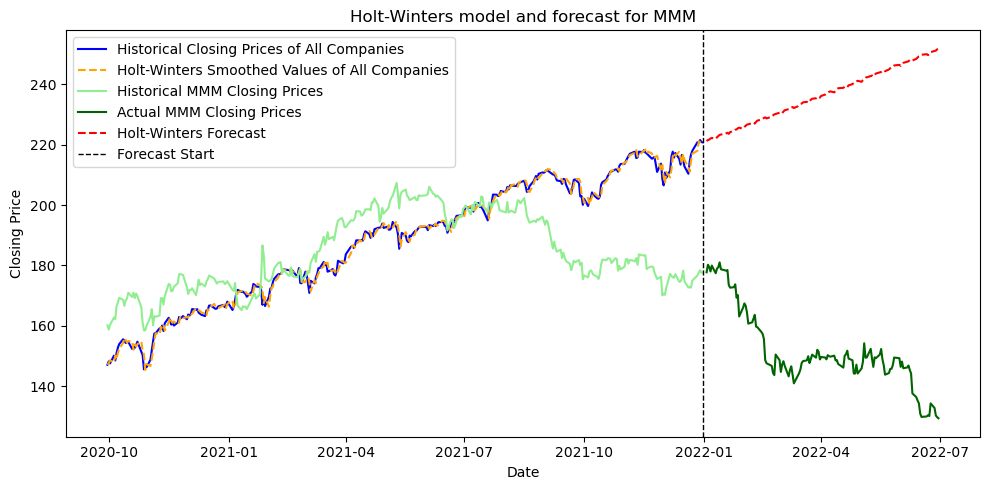

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(avg_train_n_days_all.index, avg_train_n_days_all, label="Historical Closing Prices of All Companies", color='blue')
plt.plot(smoothed_values.index, smoothed_values, label=f"Holt-Winters Smoothed Values of All Companies", color='orange', linestyle='--')
plt.title(f'Holt-Winters model and forecast for {target_company}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train_n_days_target.index, train_n_days_target, label=f'Historical {target_company} Closing Prices', color='lightgreen')
plt.plot(test_historical_m_data.index, test_historical_m_data, label=f'Actual {target_company} Closing Prices', color='darkgreen')
plt.plot(forecast.index, forecast, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.axvline(x=avg_train_n_days_all.index[-1], color='black', linewidth=1, linestyle='--', label='Forecast Start')
plt.legend()
plt.tight_layout()
plt.show()

Rolling Forecast Origin - test data of target data is slowly added to training data (average Close prices of all S&P 500 companies in training period)

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  440
Model:             ExponentialSmoothing   SSE                           3363.856
Optimized:                         True   AIC                            916.990
Trend:                   Multiplicative   BIC                            961.945
Seasonal:                      Additive   AICC                           917.845
Seasonal Periods:                     7   Date:                 Sun, 03 Nov 2024
Box-Cox:                          False   Time:                         14:07:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9429211                alpha                 True
smoothing_trend          

c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


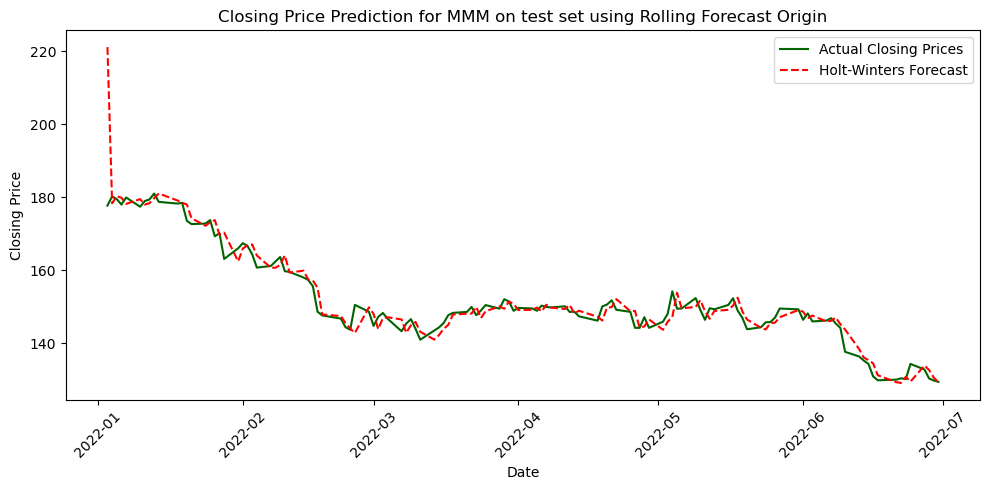

Predicted Closing Price for MMM on the next day: 221.16098950357951
RMSE between forecast values and actual closing prices: 4.581106734365411
MAPE between forecast values and actual closing prices: 1.4174%


In [35]:
# YOU CAN CHANGE THE COMPANY SYMBOL HERE
# to define the company of interest 
test_company = 'MMM'

# Filter data for the specific company
test_company_data = test_data[test_data['Symbol'] == test_company]

# Ensure company is in the dataset
if test_company_data.empty:
    raise ValueError(f"No data found for company: {test_company}")

# Set the 'Date' column as the index
test_company_data.set_index('Date', inplace=True)

# Pre-existing training data from above
# avg_train_n_days_all 

# Prepare to store forecasts and actual values
forecasts = []
actual_values = []

# Start rolling forecast from the last day of training set
for i in range(len(test_company_data)):
    # Combine the training data with the current test data point
    combined_data = pd.concat([avg_train_n_days_all, test_company_data['Close'][:i-1 + 1]])
    
    # Fit the Holt-Winters model
    model = ExponentialSmoothing(combined_data, trend=lowest_trend, seasonal=lowest_seasonal, seasonal_periods=7)
    model_fit = model.fit(optimized=True)
    
    # Forecast the next value
    forecast = model_fit.forecast(steps=1)
    forecasts.append(forecast.values[0])
    actual_values.append(test_company_data['Close'].iloc[i])

print(model_fit.summary())

# Align predicted values with the test data index for visualisation
forecast_index = test_company_data.index
forecast_series = pd.Series(forecasts, index=forecast_index)

# Calculate RMSE and MAPE
test_rmse = root_mean_squared_error(actual_values, forecasts)
test_mape = np.mean(np.abs((np.array(actual_values) - np.array(forecasts)) / np.array(actual_values))) * 100

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(test_company_data.index, test_company_data['Close'], label='Actual Closing Prices', color='darkgreen')
plt.plot(forecast_series.index, forecast_series, label='Holt-Winters Forecast', color='red', linestyle='--')
plt.title(f'Closing Price Prediction for {test_company} on test set using Rolling Forecast Origin')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price and print its performance metrics
print(f'Predicted Closing Price for {test_company} on the next day: {forecast_series.iloc[0]}')
print(f"RMSE between forecast values and actual closing prices: {test_rmse}")
print(f'MAPE between forecast values and actual closing prices: {test_mape:.4f}%')

# Long Short-Term Memory Neural Network

Sources referred to for codes:

Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.

This paper is the original introduction to Long Short-Term Memory (LSTM) networks, describing the architecture and benefits of using LSTM for handling long-term dependencies in sequential data.
Graves, A., Mohamed, A. R., & Hinton, G. (2013). Speech recognition with deep recurrent neural networks. In 2013 IEEE International Conference on Acoustics, Speech and Signal Processing (pp. 6645-6649). IEEE.

This work demonstrates LSTM applications in deep neural networks, particularly for sequential data like speech, and provides insights into tuning LSTM for complex time series tasks.
Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.

This foundational paper introduces the concept of attention mechanisms, which are now commonly incorporated into LSTM-based models to improve focus on relevant parts of sequences.
Brownlee, J. (2018). Deep Learning for Time Series Forecasting: Predict the Future with MLPs, CNNs and LSTMs in Python. Machine Learning Mastery.

Brownlee provides practical implementations of LSTM models for time series forecasting, including methods for creating input sequences and tuning LSTM parameters. Available at Machine Learning Mastery.
Chollet, F. (2015). Keras. GitHub repository. https://github.com/fchollet/keras

Keras documentation and example codes are essential resources for building LSTM models in Python. The Keras repository includes examples of LSTM architectures for various applications.
Graves, A. (2012). Supervised sequence labelling with recurrent neural networks. In Studies in Computational Intelligence, Vol. 385. Springer, Berlin, Heidelberg.

This book covers practical applications of LSTM and other recurrent neural networks, including code and explanations on sequence modeling and handling time series data.
Pytorch Team. (2019). PyTorch Documentation. https://pytorch.org/docs/stable/index.html

The official PyTorch documentation provides extensive examples and best practices for implementing LSTM models, including tutorials on sequence modeling and time series forecasting with LSTM and attention layers.

One-time prediction applied on LSTM model for MMM prediction 

C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3076911728.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])  # Log transformation of target variable
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3076911728.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()  # 7-day moving average
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3076911728.py:18: SettingWithC

Epoch 1/150 - MMM - Training Loss: 0.0292, Validation Loss: 0.0487
Epoch 2/150 - MMM - Training Loss: 0.0030, Validation Loss: 0.0178
Epoch 3/150 - MMM - Training Loss: 0.0239, Validation Loss: 0.0151
Epoch 4/150 - MMM - Training Loss: 0.1969, Validation Loss: 0.0936
Epoch 5/150 - MMM - Training Loss: 0.1328, Validation Loss: 0.0605
Epoch 6/150 - MMM - Training Loss: 0.1508, Validation Loss: 0.0709
Epoch 7/150 - MMM - Training Loss: 0.1411, Validation Loss: 0.0635
Epoch 8/150 - MMM - Training Loss: 0.1395, Validation Loss: 0.0656
Epoch 9/150 - MMM - Training Loss: 0.1451, Validation Loss: 0.0673
Epoch 10/150 - MMM - Training Loss: 0.1411, Validation Loss: 0.0649
Epoch 11/150 - MMM - Training Loss: 0.1391, Validation Loss: 0.0635
Epoch 12/150 - MMM - Training Loss: 0.1372, Validation Loss: 0.0634
Epoch 13/150 - MMM - Training Loss: 0.1374, Validation Loss: 0.0632
Early stopping triggered for MMM

MMM - One-Time Prediction Results:
Mean Squared Error (MSE): 318.6568077717322
Root Mean Sq

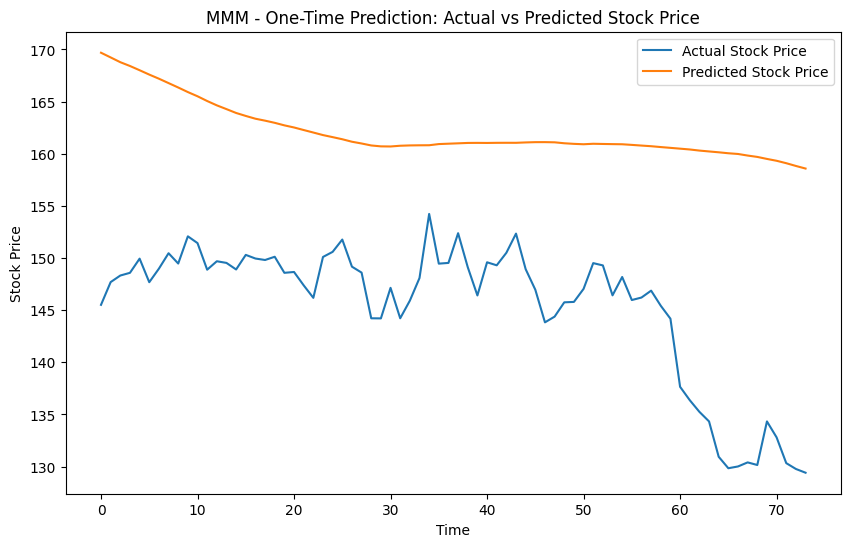

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
data = pd.read_csv("C:/Users/tanxi/Downloads/company_stock_details.csv", low_memory=False)

# Filter data for "MMM" ticker only
data_filtered = data[data['Symbol'] == "MMM"]

# Feature engineering
data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])  # Log transformation of target variable
data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()  # 7-day moving average
data_filtered['Close_MA30'] = data_filtered['Close'].rolling(window=30).mean()  # 30-day moving average
data_filtered = data_filtered[['Close_Log', 'Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 
                               'News - New Products', 'News - Analyst Comments', 'News - Adverse Events', 
                               'Close_MA7', 'Close_MA30']].dropna()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_filtered)

# Define function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Close_Log' (log-transformed close price)
    return np.array(X), np.array(y)

# Hyperparameters
sequence_length = 45
hidden_layer_size = 384
num_layers = 1
dropout_rate = 0.2
learning_rate = 0.00005
batch_size = 16
epochs = 150
early_stopping_patience = 10

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and validation sets
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Convert to tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Define the Attention LSTM model
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size=1, num_layers=1):
        super(AttentionLSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True, bidirectional=True)
        self.attention = nn.Linear(hidden_layer_size * 2, 1)
        self.linear = nn.Linear(hidden_layer_size * 2, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()
        c_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()

        lstm_out, _ = self.lstm(x, (h_0, c_0))  # LSTM output
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)  # Compute attention weights
        context = torch.sum(attn_weights * lstm_out, dim=1)  # Weighted sum
        predictions = self.linear(context)
        return predictions

# Initialize the model, loss function, and optimizer
input_size = data_filtered.shape[1]
model = AttentionLSTM(input_size=input_size, hidden_layer_size=hidden_layer_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Early stopping setup
min_val_loss = np.inf
early_stop_counter = 0

# Training loop
for epoch in range(epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        X_val_tensor = torch.from_numpy(X_val).float()
        y_val_tensor = torch.from_numpy(y_val).float()
        y_pred_val = model(X_val_tensor)
        val_loss = loss_function(y_pred_val, y_val_tensor.unsqueeze(1)).item()
    
    print(f"Epoch {epoch+1}/{epochs} - MMM - Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")
    
    # Scheduler step
    scheduler.step(val_loss)

    # Early stopping check
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stopping_patience:
            print("Early stopping triggered for MMM")
            break

# One-time prediction on the validation set
model.eval()
with torch.no_grad():
    X_val_tensor = torch.from_numpy(X_val).float()
    y_pred_val = model(X_val_tensor).squeeze().numpy()

# Rescale and evaluate
actual_values_rescaled = np.expm1(scaler.inverse_transform(
    np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), input_size - 1))], axis=1))[:, 0])
predicted_values_rescaled = np.expm1(scaler.inverse_transform(
    np.concatenate([y_pred_val.reshape(-1, 1), np.zeros((len(y_pred_val), input_size - 1))], axis=1))[:, 0])

# Calculate error metrics
mse = mean_squared_error(actual_values_rescaled, predicted_values_rescaled)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values_rescaled - predicted_values_rescaled) / actual_values_rescaled)) * 100

# Print results
print(f"\nMMM - One-Time Prediction Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Plot the actual and predicted stock prices for "MMM"
plt.figure(figsize=(10, 6))
plt.plot(actual_values_rescaled, label='Actual Stock Price')
plt.plot(predicted_values_rescaled, label='Predicted Stock Price')
plt.title('MMM - One-Time Prediction: Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Rolling forecast applied on LSTM model for MMM prediction

C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\1447225397.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])  # Log transformation of target variable
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\1447225397.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()  # 7-day moving average
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\1447225397.py:18: SettingWithC

Epoch 1/150, Training Loss: 0.040658120065927505, Validation Loss: 0.057664334774017334
Epoch 2/150, Training Loss: 0.01851104386150837, Validation Loss: 0.033004771918058395
Epoch 3/150, Training Loss: 0.000699445663485676, Validation Loss: 0.009731709957122803
Epoch 4/150, Training Loss: 0.06429756432771683, Validation Loss: 0.030810894444584846
Epoch 5/150, Training Loss: 0.049237363040447235, Validation Loss: 0.026280242949724197
Epoch 6/150, Training Loss: 0.056491654366254807, Validation Loss: 0.03005434386432171
Epoch 7/150, Training Loss: 0.04699953645467758, Validation Loss: 0.025979219004511833
Epoch 8/150, Training Loss: 0.05473756045103073, Validation Loss: 0.03130904585123062
Epoch 9/150, Training Loss: 0.045939646661281586, Validation Loss: 0.026650864630937576
Epoch 10/150, Training Loss: 0.0497482605278492, Validation Loss: 0.02863875962793827
Epoch 11/150, Training Loss: 0.04500021040439606, Validation Loss: 0.026113705709576607
Epoch 12/150, Training Loss: 0.046276152

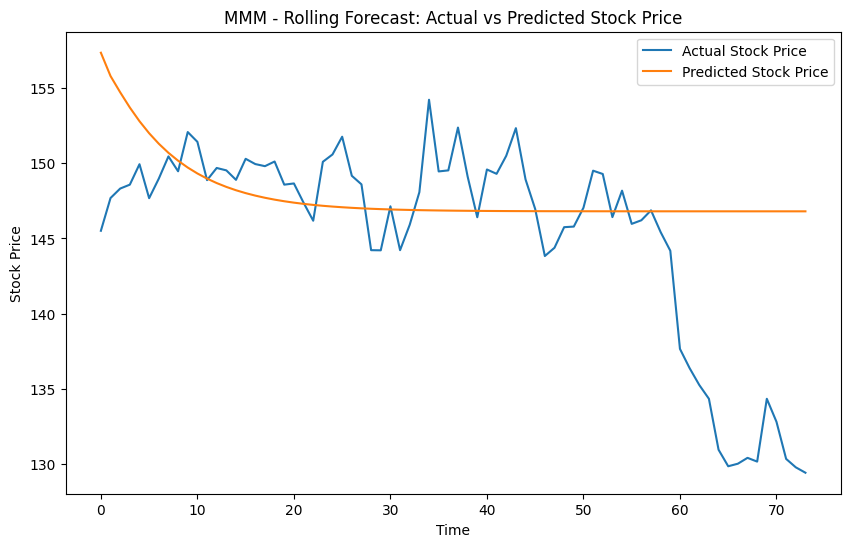

Mean Squared Error (MSE): 49.90376120152307
Root Mean Squared Error (RMSE): 7.064259423430249
Mean Absolute Percentage Error (MAPE): 3.407548655140803%


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load and preprocess the dataset
data = pd.read_csv("C:/Users/tanxi/Downloads/company_stock_details.csv", low_memory=False)

# Filter data for "MMM" ticker only
data_filtered = data[data['Symbol'] == "MMM"]

# Select relevant columns and add additional feature engineering
data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])  # Log transformation of target variable
data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()  # 7-day moving average
data_filtered['Close_MA30'] = data_filtered['Close'].rolling(window=30).mean()  # 30-day moving average
data_filtered = data_filtered[['Close_Log', 'Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 
                               'News - New Products', 'News - Analyst Comments', 'News - Adverse Events', 
                               'Close_MA7', 'Close_MA30']].dropna()

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_filtered)

# Define function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Close_Log' (log-transformed close price)
    return np.array(X), np.array(y)

# Hyperparameter adjustments
sequence_length = 45  # Adjusted sequence length
hidden_layer_size = 384  # Adjusted hidden layer size
num_layers = 1  # Simplified to 1 layer
dropout_rate = 0.2
learning_rate = 0.00005  # Slightly higher learning rate
batch_size = 16  # Increased batch size

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and validation sets
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Convert to tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Define Simplified Bidirectional LSTM Model
class SimpleBidirectionalLSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size=hidden_layer_size, output_size=1, num_layers=num_layers):
        super(SimpleBidirectionalLSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.bidirectional_lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True, 
                                          dropout=dropout_rate, bidirectional=True)
        self.linear = nn.Linear(hidden_layer_size * 2, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()
        c_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()
        
        lstm_out, _ = self.bidirectional_lstm(x, (h_0, c_0))
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

# Instantiate and train the model
input_size = data_filtered.shape[1]
model = SimpleBidirectionalLSTM(input_size=input_size)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Implement early stopping
early_stopping_patience = 10
min_val_loss = np.inf
early_stop_counter = 0

# Training loop with increased epochs
epochs = 150
for epoch in range(epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_function(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        X_val_tensor = torch.from_numpy(X_val).float()
        y_val_tensor = torch.from_numpy(y_val).float()
        y_pred_val = model(X_val_tensor)
        val_loss = loss_function(y_pred_val, y_val_tensor.unsqueeze(1)).item()
    
    # Print losses
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}")
    
    # Scheduler step
    scheduler.step(val_loss)

    # Early stopping check
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

# Rolling forecast on validation data
model.eval()
rolling_predictions = []
current_sequence = X_val[0]  # Start with the first sequence in validation data

with torch.no_grad():
    for i in range(len(X_val)):
        current_sequence_tensor = torch.from_numpy(current_sequence).float().unsqueeze(0)
        prediction = model(current_sequence_tensor)
        rolling_predictions.append(prediction.item())

        # Update sequence by appending the prediction and removing the oldest element
        new_prediction = np.array([[prediction.item()] + [0] * (current_sequence.shape[1] - 1)])
        new_sequence = np.vstack((current_sequence[1:], new_prediction))
        current_sequence = new_sequence

# Rescale and evaluate, converting back from log scale
actual_values_rescaled = np.expm1(scaler.inverse_transform(
    np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), input_size - 1))], axis=1))[:, 0])
rolling_predictions_rescaled = np.expm1(scaler.inverse_transform(
    np.concatenate([np.array(rolling_predictions).reshape(-1, 1), np.zeros((len(rolling_predictions), input_size - 1))], axis=1))[:, 0])

# Plot the actual and predicted stock prices for "MMM"
plt.figure(figsize=(10, 6))
plt.plot(actual_values_rescaled, label='Actual Stock Price')
plt.plot(rolling_predictions_rescaled, label='Predicted Stock Price')
plt.title('MMM - Rolling Forecast: Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate and print error metrics
mse = mean_squared_error(actual_values_rescaled, rolling_predictions_rescaled)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values_rescaled - rolling_predictions_rescaled) / actual_values_rescaled)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Rolling forecast applied on LSTM model for predictions of our 10 selected companies


Processing ticker: XOM


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - XOM - Training Loss: 0.4728, Validation Loss: 0.5508
Epoch 2/150 - XOM - Training Loss: 0.3091, Validation Loss: 0.3581
Epoch 3/150 - XOM - Training Loss: 0.1253, Validation Loss: 0.1370
Epoch 4/150 - XOM - Training Loss: 0.0126, Validation Loss: 0.0100
Epoch 5/150 - XOM - Training Loss: 0.0425, Validation Loss: 0.0470
Epoch 6/150 - XOM - Training Loss: 0.0293, Validation Loss: 0.0293
Epoch 7/150 - XOM - Training Loss: 0.0272, Validation Loss: 0.0273
Epoch 8/150 - XOM - Training Loss: 0.0273, Validation Loss: 0.0266
Epoch 9/150 - XOM - Training Loss: 0.0233, Validation Loss: 0.0236
Epoch 10/150 - XOM - Training Loss: 0.0225, Validation Loss: 0.0225
Epoch 11/150 - XOM - Training Loss: 0.0221, Validation Loss: 0.0218
Epoch 12/150 - XOM - Training Loss: 0.0216, Validation Loss: 0.0208
Epoch 13/150 - XOM - Training Loss: 0.0202, Validation Loss: 0.0199
Epoch 14/150 - XOM - Training Loss: 0.0197, Validation Loss: 0.0193
Early stopping triggered for XOM


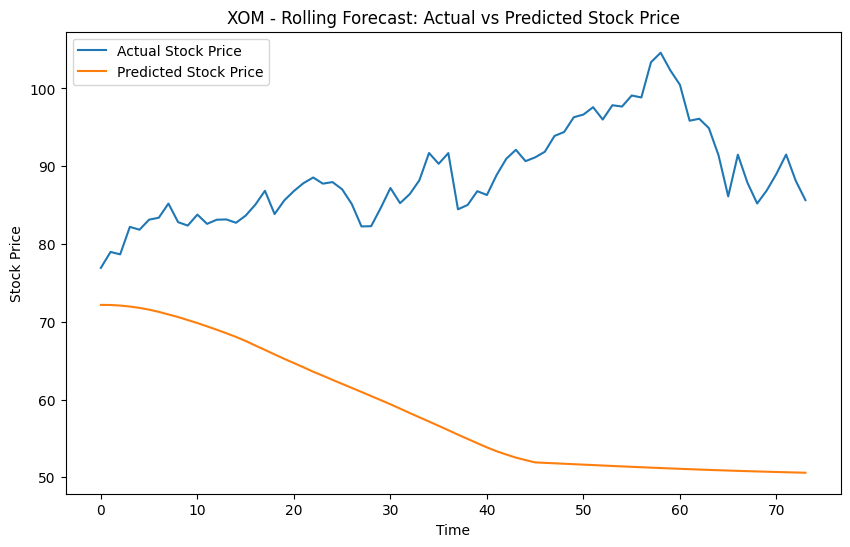


Processing ticker: SHW


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - SHW - Training Loss: 0.0094, Validation Loss: 0.0775
Epoch 2/150 - SHW - Training Loss: 0.0011, Validation Loss: 0.0417
Epoch 3/150 - SHW - Training Loss: 0.0279, Validation Loss: 0.0219
Epoch 4/150 - SHW - Training Loss: 0.1469, Validation Loss: 0.0474
Epoch 5/150 - SHW - Training Loss: 0.2342, Validation Loss: 0.0744
Epoch 6/150 - SHW - Training Loss: 0.2040, Validation Loss: 0.0617
Epoch 7/150 - SHW - Training Loss: 0.1906, Validation Loss: 0.0565
Epoch 8/150 - SHW - Training Loss: 0.1864, Validation Loss: 0.0548
Epoch 9/150 - SHW - Training Loss: 0.1833, Validation Loss: 0.0534
Epoch 10/150 - SHW - Training Loss: 0.1815, Validation Loss: 0.0524
Epoch 11/150 - SHW - Training Loss: 0.1803, Validation Loss: 0.0516
Epoch 12/150 - SHW - Training Loss: 0.1783, Validation Loss: 0.0509
Epoch 13/150 - SHW - Training Loss: 0.1766, Validation Loss: 0.0502
Early stopping triggered for SHW


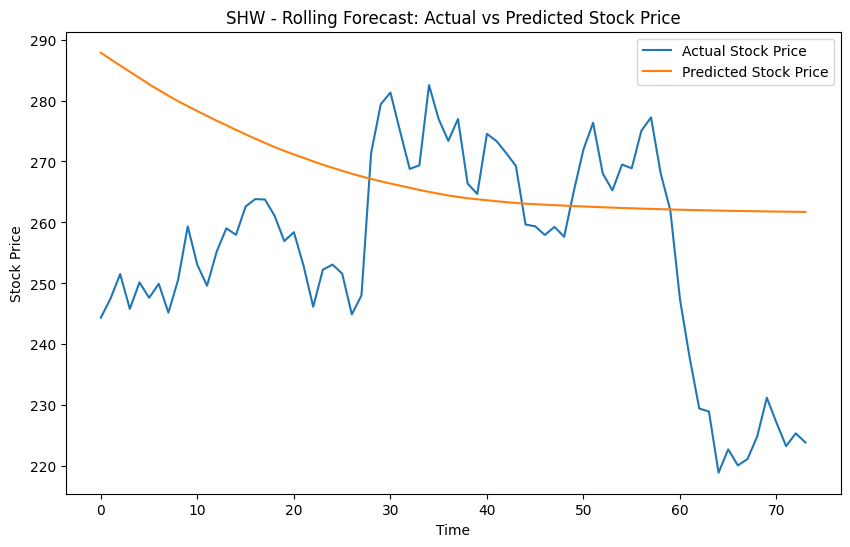


Processing ticker: AMZN


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - AMZN - Training Loss: 0.1998, Validation Loss: 0.1517
Epoch 2/150 - AMZN - Training Loss: 0.1010, Validation Loss: 0.0972
Epoch 3/150 - AMZN - Training Loss: 0.0097, Validation Loss: 0.0702
Epoch 4/150 - AMZN - Training Loss: 0.0438, Validation Loss: 0.1393
Epoch 5/150 - AMZN - Training Loss: 0.0198, Validation Loss: 0.1176
Epoch 6/150 - AMZN - Training Loss: 0.0266, Validation Loss: 0.1249
Epoch 7/150 - AMZN - Training Loss: 0.0241, Validation Loss: 0.1226
Epoch 8/150 - AMZN - Training Loss: 0.0224, Validation Loss: 0.1220
Epoch 9/150 - AMZN - Training Loss: 0.0225, Validation Loss: 0.1221
Epoch 10/150 - AMZN - Training Loss: 0.0225, Validation Loss: 0.1221
Epoch 11/150 - AMZN - Training Loss: 0.0224, Validation Loss: 0.1220
Epoch 12/150 - AMZN - Training Loss: 0.0215, Validation Loss: 0.1215
Epoch 13/150 - AMZN - Training Loss: 0.0214, Validation Loss: 0.1215
Early stopping triggered for AMZN


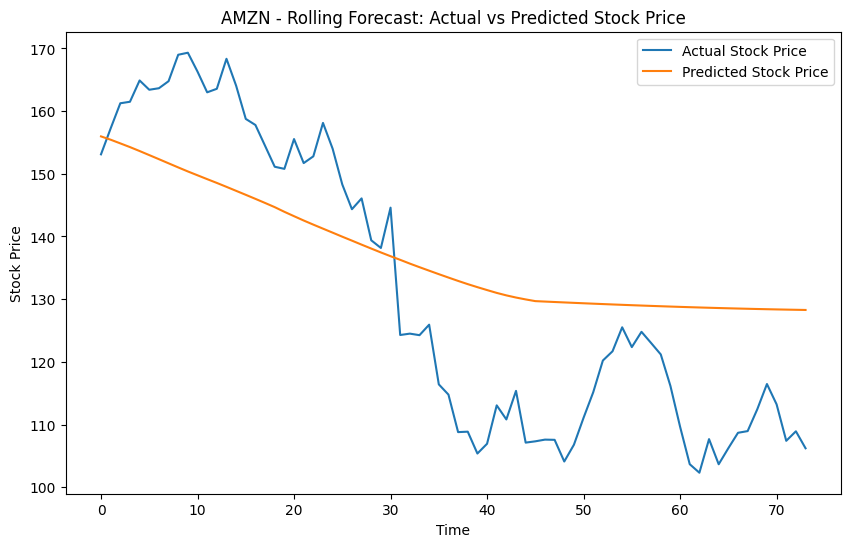


Processing ticker: PG


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - PG - Training Loss: 0.2476, Validation Loss: 0.3724
Epoch 2/150 - PG - Training Loss: 0.1326, Validation Loss: 0.2364
Epoch 3/150 - PG - Training Loss: 0.0321, Validation Loss: 0.1015
Epoch 4/150 - PG - Training Loss: 0.0160, Validation Loss: 0.0308
Epoch 5/150 - PG - Training Loss: 0.0267, Validation Loss: 0.0312
Epoch 6/150 - PG - Training Loss: 0.0211, Validation Loss: 0.0305
Epoch 7/150 - PG - Training Loss: 0.0271, Validation Loss: 0.0308
Epoch 8/150 - PG - Training Loss: 0.0331, Validation Loss: 0.0316
Epoch 9/150 - PG - Training Loss: 0.0363, Validation Loss: 0.0320
Epoch 10/150 - PG - Training Loss: 0.0409, Validation Loss: 0.0329
Epoch 11/150 - PG - Training Loss: 0.0422, Validation Loss: 0.0327
Epoch 12/150 - PG - Training Loss: 0.0416, Validation Loss: 0.0325
Epoch 13/150 - PG - Training Loss: 0.0430, Validation Loss: 0.0328
Epoch 14/150 - PG - Training Loss: 0.0453, Validation Loss: 0.0332
Epoch 15/150 - PG - Training Loss: 0.0462, Validation Loss: 0.0333
Epoc

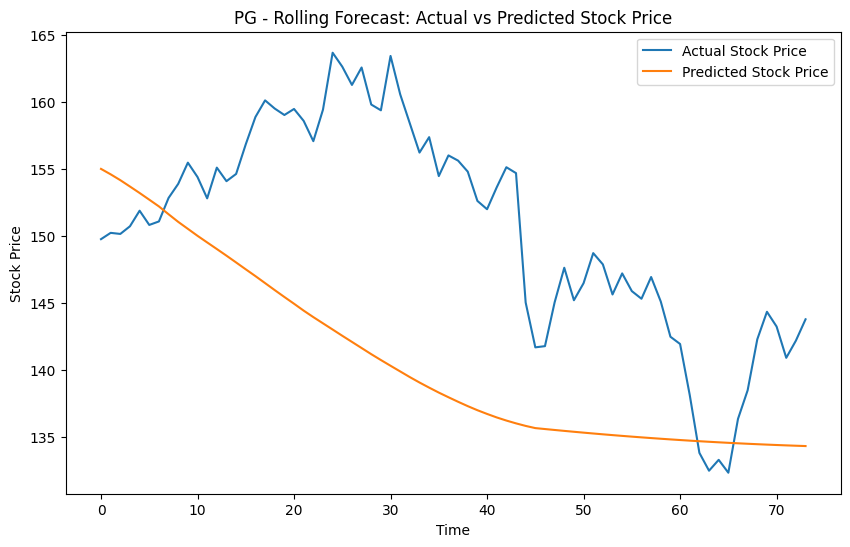


Processing ticker: JNJ


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - JNJ - Training Loss: 0.3407, Validation Loss: 0.5090
Epoch 2/150 - JNJ - Training Loss: 0.2095, Validation Loss: 0.3283
Epoch 3/150 - JNJ - Training Loss: 0.0699, Validation Loss: 0.1236
Epoch 4/150 - JNJ - Training Loss: 0.0044, Validation Loss: 0.0194
Epoch 5/150 - JNJ - Training Loss: 0.0117, Validation Loss: 0.0379
Epoch 6/150 - JNJ - Training Loss: 0.0108, Validation Loss: 0.0351
Epoch 7/150 - JNJ - Training Loss: 0.0099, Validation Loss: 0.0339
Epoch 8/150 - JNJ - Training Loss: 0.0105, Validation Loss: 0.0351
Epoch 9/150 - JNJ - Training Loss: 0.0100, Validation Loss: 0.0341
Epoch 10/150 - JNJ - Training Loss: 0.0098, Validation Loss: 0.0337
Epoch 11/150 - JNJ - Training Loss: 0.0098, Validation Loss: 0.0340
Epoch 12/150 - JNJ - Training Loss: 0.0099, Validation Loss: 0.0341
Epoch 13/150 - JNJ - Training Loss: 0.0098, Validation Loss: 0.0340
Epoch 14/150 - JNJ - Training Loss: 0.0097, Validation Loss: 0.0338
Early stopping triggered for JNJ


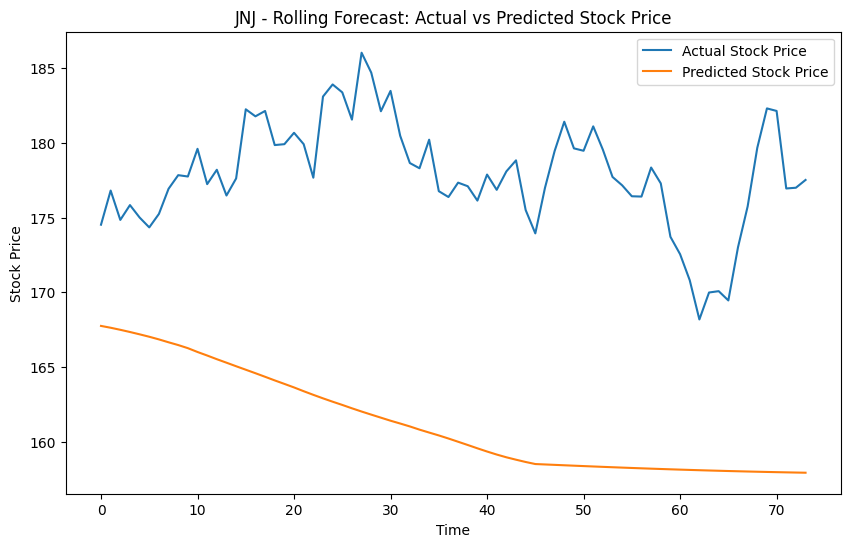


Processing ticker: JPM


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - JPM - Training Loss: 0.0702, Validation Loss: 0.0548
Epoch 2/150 - JPM - Training Loss: 0.0150, Validation Loss: 0.0235
Epoch 3/150 - JPM - Training Loss: 0.0174, Validation Loss: 0.0422
Epoch 4/150 - JPM - Training Loss: 0.2790, Validation Loss: 0.2088
Epoch 5/150 - JPM - Training Loss: 0.1707, Validation Loss: 0.1475
Epoch 6/150 - JPM - Training Loss: 0.1898, Validation Loss: 0.1613
Epoch 7/150 - JPM - Training Loss: 0.1765, Validation Loss: 0.1549
Epoch 8/150 - JPM - Training Loss: 0.1729, Validation Loss: 0.1527
Epoch 9/150 - JPM - Training Loss: 0.1736, Validation Loss: 0.1529
Epoch 10/150 - JPM - Training Loss: 0.1725, Validation Loss: 0.1520
Epoch 11/150 - JPM - Training Loss: 0.1683, Validation Loss: 0.1504
Epoch 12/150 - JPM - Training Loss: 0.1670, Validation Loss: 0.1494
Early stopping triggered for JPM


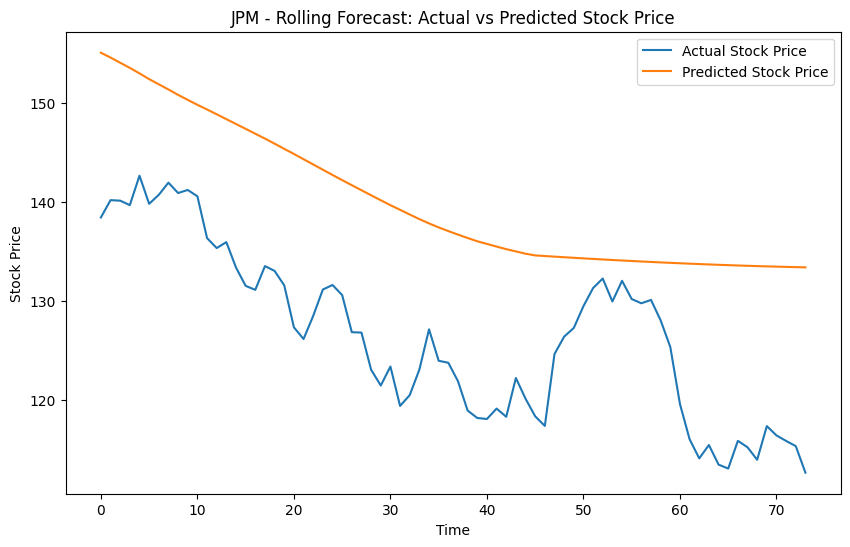


Processing ticker: AAPL


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - AAPL - Training Loss: 0.2856, Validation Loss: 0.2825
Epoch 2/150 - AAPL - Training Loss: 0.1603, Validation Loss: 0.1672
Epoch 3/150 - AAPL - Training Loss: 0.0491, Validation Loss: 0.0662
Epoch 4/150 - AAPL - Training Loss: 0.0030, Validation Loss: 0.0301
Epoch 5/150 - AAPL - Training Loss: 0.0048, Validation Loss: 0.0308
Epoch 6/150 - AAPL - Training Loss: 0.0040, Validation Loss: 0.0293
Epoch 7/150 - AAPL - Training Loss: 0.0061, Validation Loss: 0.0301
Epoch 8/150 - AAPL - Training Loss: 0.0091, Validation Loss: 0.0314
Epoch 9/150 - AAPL - Training Loss: 0.0118, Validation Loss: 0.0323
Epoch 10/150 - AAPL - Training Loss: 0.0151, Validation Loss: 0.0334
Epoch 11/150 - AAPL - Training Loss: 0.0163, Validation Loss: 0.0331
Epoch 12/150 - AAPL - Training Loss: 0.0162, Validation Loss: 0.0326
Epoch 13/150 - AAPL - Training Loss: 0.0175, Validation Loss: 0.0330
Epoch 14/150 - AAPL - Training Loss: 0.0190, Validation Loss: 0.0334
Epoch 15/150 - AAPL - Training Loss: 0.0195

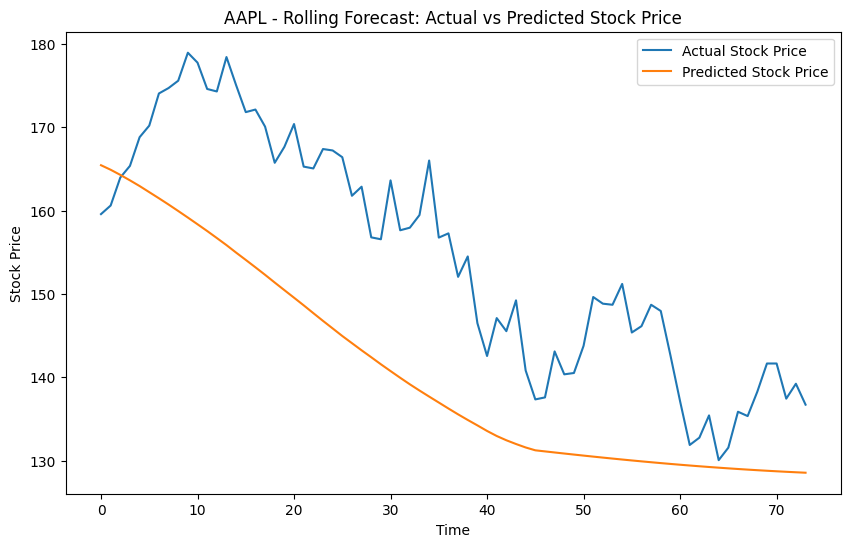


Processing ticker: GOOGL


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - GOOGL - Training Loss: 0.3824, Validation Loss: 0.2567
Epoch 2/150 - GOOGL - Training Loss: 0.2316, Validation Loss: 0.1468
Epoch 3/150 - GOOGL - Training Loss: 0.0672, Validation Loss: 0.0404
Epoch 4/150 - GOOGL - Training Loss: 0.0412, Validation Loss: 0.0816
Epoch 5/150 - GOOGL - Training Loss: 0.0059, Validation Loss: 0.0404
Epoch 6/150 - GOOGL - Training Loss: 0.0114, Validation Loss: 0.0465
Epoch 7/150 - GOOGL - Training Loss: 0.0105, Validation Loss: 0.0438
Epoch 8/150 - GOOGL - Training Loss: 0.0114, Validation Loss: 0.0434
Epoch 9/150 - GOOGL - Training Loss: 0.0116, Validation Loss: 0.0424
Epoch 10/150 - GOOGL - Training Loss: 0.0085, Validation Loss: 0.0383
Epoch 11/150 - GOOGL - Training Loss: 0.0083, Validation Loss: 0.0378
Epoch 12/150 - GOOGL - Training Loss: 0.0090, Validation Loss: 0.0382
Epoch 13/150 - GOOGL - Training Loss: 0.0089, Validation Loss: 0.0376
Epoch 14/150 - GOOGL - Training Loss: 0.0090, Validation Loss: 0.0374
Epoch 15/150 - GOOGL - Traini

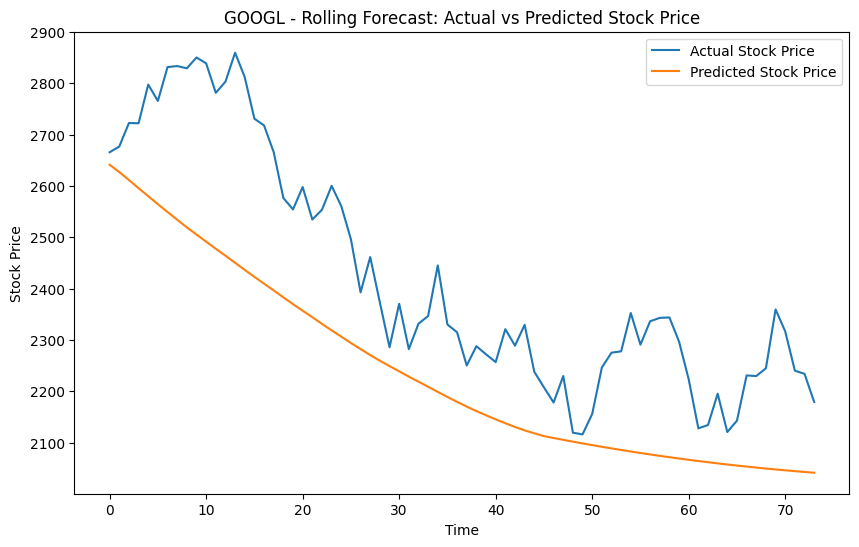


Processing ticker: NEE


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - NEE - Training Loss: 0.1918, Validation Loss: 0.1454
Epoch 2/150 - NEE - Training Loss: 0.1086, Validation Loss: 0.0921
Epoch 3/150 - NEE - Training Loss: 0.0332, Validation Loss: 0.0552
Epoch 4/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0668
Epoch 5/150 - NEE - Training Loss: 0.0022, Validation Loss: 0.0687
Epoch 6/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0640
Epoch 7/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0638
Epoch 8/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0638
Epoch 9/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0637
Epoch 10/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0635
Epoch 11/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0634
Epoch 12/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0634
Epoch 13/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0632
Early stopping triggered for NEE


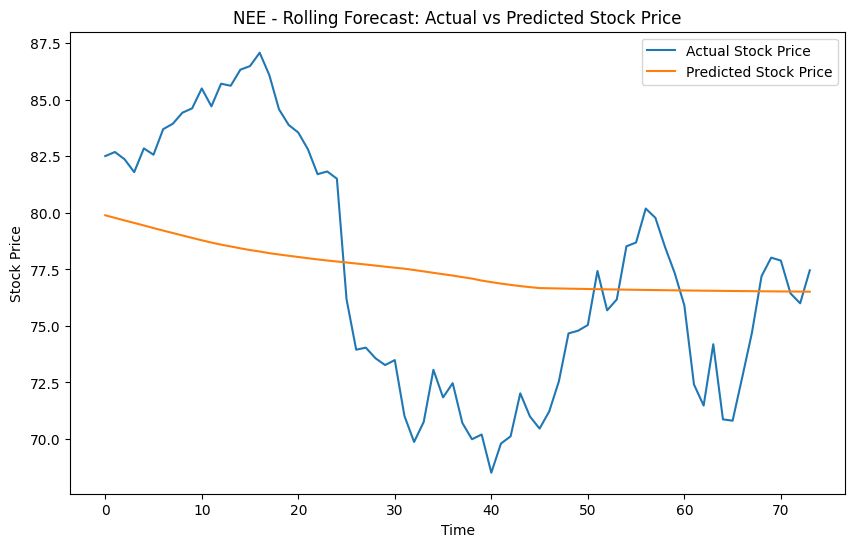


Processing ticker: AMT


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\2375093861.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - AMT - Training Loss: 0.0813, Validation Loss: 0.2006
Epoch 2/150 - AMT - Training Loss: 0.0283, Validation Loss: 0.1152
Epoch 3/150 - AMT - Training Loss: 0.0004, Validation Loss: 0.0352
Epoch 4/150 - AMT - Training Loss: 0.0728, Validation Loss: 0.0216
Epoch 5/150 - AMT - Training Loss: 0.0580, Validation Loss: 0.0169
Epoch 6/150 - AMT - Training Loss: 0.0452, Validation Loss: 0.0151
Epoch 7/150 - AMT - Training Loss: 0.0491, Validation Loss: 0.0158
Epoch 8/150 - AMT - Training Loss: 0.0467, Validation Loss: 0.0155
Epoch 9/150 - AMT - Training Loss: 0.0446, Validation Loss: 0.0153
Epoch 10/150 - AMT - Training Loss: 0.0434, Validation Loss: 0.0152
Epoch 11/150 - AMT - Training Loss: 0.0398, Validation Loss: 0.0150
Epoch 12/150 - AMT - Training Loss: 0.0382, Validation Loss: 0.0149
Epoch 13/150 - AMT - Training Loss: 0.0378, Validation Loss: 0.0149
Epoch 14/150 - AMT - Training Loss: 0.0374, Validation Loss: 0.0149
Epoch 15/150 - AMT - Training Loss: 0.0369, Validation Lo

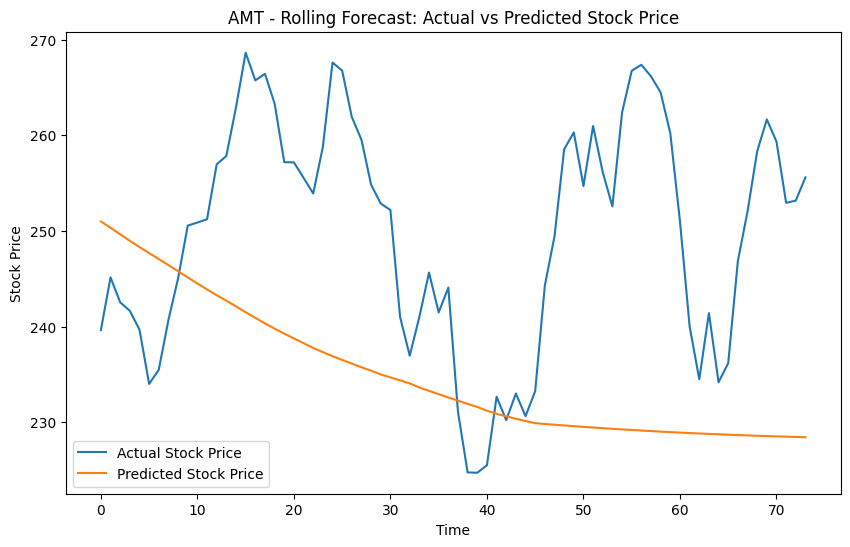

Ticker: XOM
Mean Squared Error (MSE): 1085.1610487481262
Root Mean Squared Error (RMSE): 32.94178271964233
Mean Absolute Percentage Error (MAPE): 33.34654011699128%


Ticker: SHW
Mean Squared Error (MSE): 510.9414357071832
Root Mean Squared Error (RMSE): 22.604013707905576
Mean Absolute Percentage Error (MAPE): 7.600768231539032%


Ticker: AMZN
Mean Squared Error (MSE): 253.89668422569196
Root Mean Squared Error (RMSE): 15.934135816720403
Mean Absolute Percentage Error (MAPE): 11.829360651246768%


Ticker: PG
Mean Squared Error (MSE): 150.0367622559592
Root Mean Squared Error (RMSE): 12.24894943478661
Mean Absolute Percentage Error (MAPE): 6.904558608264569%


Ticker: JNJ
Mean Squared Error (MSE): 295.38313857602367
Root Mean Squared Error (RMSE): 17.186714013330867
Mean Absolute Percentage Error (MAPE): 9.30059543256686%


Ticker: JPM
Mean Squared Error (MSE): 205.4325048920479
Root Mean Squared Error (RMSE): 14.332916831268083
Mean Absolute Percentage Error (MAPE): 10.868026144970765

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# List of tickers
tickers = ["XOM", "SHW", "AMZN", "PG", "JNJ", "JPM", "AAPL", "GOOGL", "NEE", "AMT"]

# Load and preprocess the dataset
data = pd.read_csv("C:/Users/tanxi/Downloads/company_stock_details.csv", low_memory=False)

# Initialize results dictionary to store results for each company
results = {}

# Define the Attention LSTM model
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size=1, num_layers=1):
        super(AttentionLSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True, bidirectional=True)
        self.attention = nn.Linear(hidden_layer_size * 2, 1)
        self.linear = nn.Linear(hidden_layer_size * 2, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()
        c_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()

        lstm_out, _ = self.lstm(x, (h_0, c_0))  # LSTM output
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)  # Compute attention weights
        context = torch.sum(attn_weights * lstm_out, dim=1)  # Weighted sum
        predictions = self.linear(context)
        return predictions

# Define function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Close_Log' (log-transformed close price)
    return np.array(X), np.array(y)

# Hyperparameters
sequence_length = 45
hidden_layer_size = 384
num_layers = 1
dropout_rate = 0.2
learning_rate = 0.00005
batch_size = 16
epochs = 150
early_stopping_patience = 10

# Loop through each ticker and train an individual model
for ticker in tickers:
    print(f"\nProcessing ticker: {ticker}")
    
    # Filter data for specific ticker
    data_filtered = data[data['Symbol'] == ticker]

    # Feature engineering
    data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
    data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
    data_filtered['Close_MA30'] = data_filtered['Close'].rolling(window=30).mean()
    data_filtered = data_filtered[['Close_Log', 'Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 
                                   'News - New Products', 'News - Analyst Comments', 'News - Adverse Events', 
                                   'Close_MA7', 'Close_MA30']].dropna()

    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_filtered)

    # Create sequences
    X, y = create_sequences(scaled_data, sequence_length)

    # Split into train and validation sets
    split_index = int(len(X) * 0.8)
    X_train, X_val = X[:split_index], X[split_index:]
    y_train, y_val = y[:split_index], y[split_index:]

    # Convert to tensors
    X_train_tensor = torch.from_numpy(X_train).float()
    y_train_tensor = torch.from_numpy(y_train).float()

    # Initialize the model, loss function, and optimizer
    input_size = data_filtered.shape[1]
    model = AttentionLSTM(input_size=input_size, hidden_layer_size=hidden_layer_size)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    # Early stopping setup
    min_val_loss = np.inf
    early_stop_counter = 0

    # Training loop
    for epoch in range(epochs):
        model.train()
        for i in range(0, len(X_train_tensor), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            X_val_tensor = torch.from_numpy(X_val).float()
            y_val_tensor = torch.from_numpy(y_val).float()
            y_pred_val = model(X_val_tensor)
            val_loss = loss_function(y_pred_val, y_val_tensor.unsqueeze(1)).item()
        
        print(f"Epoch {epoch+1}/{epochs} - {ticker} - Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")
        
        # Scheduler step
        scheduler.step(val_loss)

        # Early stopping check
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= early_stopping_patience:
                print(f"Early stopping triggered for {ticker}")
                break

    # Rolling forecast on validation data
    model.eval()
    rolling_predictions = []
    current_sequence = X_val[0]  # Start with the first sequence in validation data

    with torch.no_grad():
        for i in range(len(X_val)):
            current_sequence_tensor = torch.from_numpy(current_sequence).float().unsqueeze(0)
            prediction = model(current_sequence_tensor)
            rolling_predictions.append(prediction.item())

            # Update sequence by appending the prediction and removing the oldest element
            new_prediction = np.array([[prediction.item()] + [0] * (current_sequence.shape[1] - 1)])
            new_sequence = np.vstack((current_sequence[1:], new_prediction))
            current_sequence = new_sequence

    # Rescale and evaluate
    actual_values_rescaled = np.expm1(scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), input_size - 1))], axis=1))[:, 0])
    rolling_predictions_rescaled = np.expm1(scaler.inverse_transform(
        np.concatenate([np.array(rolling_predictions).reshape(-1, 1), np.zeros((len(rolling_predictions), input_size - 1))], axis=1))[:, 0])

    # Calculate error metrics
    mse = mean_squared_error(actual_values_rescaled, rolling_predictions_rescaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_values_rescaled - rolling_predictions_rescaled) / actual_values_rescaled)) * 100

    # Store results for the ticker
    results[ticker] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Actual": actual_values_rescaled,
        "Predicted": rolling_predictions_rescaled
    }

    # Plot for each company
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_rescaled, label='Actual Stock Price')
    plt.plot(rolling_predictions_rescaled, label='Predicted Stock Price')
    plt.title(f'{ticker} - Rolling Forecast: Actual vs Predicted Stock Price')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Print summary of results for each company
for ticker, metrics in results.items():
    print(f"Ticker: {ticker}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']}%")
    print("\n")


One-time prediction applied on LSTM model for predictions of the 10 companies chosen


Processing ticker: XOM


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - XOM - Training Loss: 0.4165, Validation Loss: 0.4946
Epoch 2/150 - XOM - Training Loss: 0.2592, Validation Loss: 0.3078
Epoch 3/150 - XOM - Training Loss: 0.0940, Validation Loss: 0.1076
Epoch 4/150 - XOM - Training Loss: 0.0214, Validation Loss: 0.0249
Epoch 5/150 - XOM - Training Loss: 0.0397, Validation Loss: 0.0483
Epoch 6/150 - XOM - Training Loss: 0.0344, Validation Loss: 0.0398
Epoch 7/150 - XOM - Training Loss: 0.0308, Validation Loss: 0.0352
Epoch 8/150 - XOM - Training Loss: 0.0305, Validation Loss: 0.0340
Epoch 9/150 - XOM - Training Loss: 0.0270, Validation Loss: 0.0314
Epoch 10/150 - XOM - Training Loss: 0.0261, Validation Loss: 0.0299
Epoch 11/150 - XOM - Training Loss: 0.0255, Validation Loss: 0.0288
Epoch 12/150 - XOM - Training Loss: 0.0248, Validation Loss: 0.0276
Epoch 13/150 - XOM - Training Loss: 0.0234, Validation Loss: 0.0267
Epoch 14/150 - XOM - Training Loss: 0.0229, Validation Loss: 0.0259
Early stopping triggered for XOM


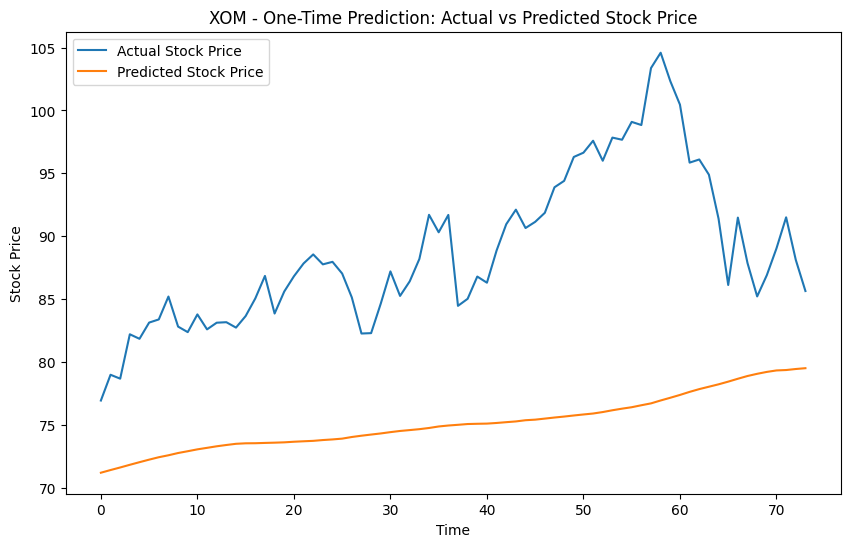


Processing ticker: SHW


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - SHW - Training Loss: 0.0083, Validation Loss: 0.0766
Epoch 2/150 - SHW - Training Loss: 0.0017, Validation Loss: 0.0403
Epoch 3/150 - SHW - Training Loss: 0.0346, Validation Loss: 0.0221
Epoch 4/150 - SHW - Training Loss: 0.1579, Validation Loss: 0.0486
Epoch 5/150 - SHW - Training Loss: 0.2373, Validation Loss: 0.0720
Epoch 6/150 - SHW - Training Loss: 0.2093, Validation Loss: 0.0607
Epoch 7/150 - SHW - Training Loss: 0.1962, Validation Loss: 0.0559
Epoch 8/150 - SHW - Training Loss: 0.1917, Validation Loss: 0.0543
Epoch 9/150 - SHW - Training Loss: 0.1885, Validation Loss: 0.0530
Epoch 10/150 - SHW - Training Loss: 0.1866, Validation Loss: 0.0520
Epoch 11/150 - SHW - Training Loss: 0.1854, Validation Loss: 0.0513
Epoch 12/150 - SHW - Training Loss: 0.1835, Validation Loss: 0.0507
Epoch 13/150 - SHW - Training Loss: 0.1818, Validation Loss: 0.0501
Early stopping triggered for SHW


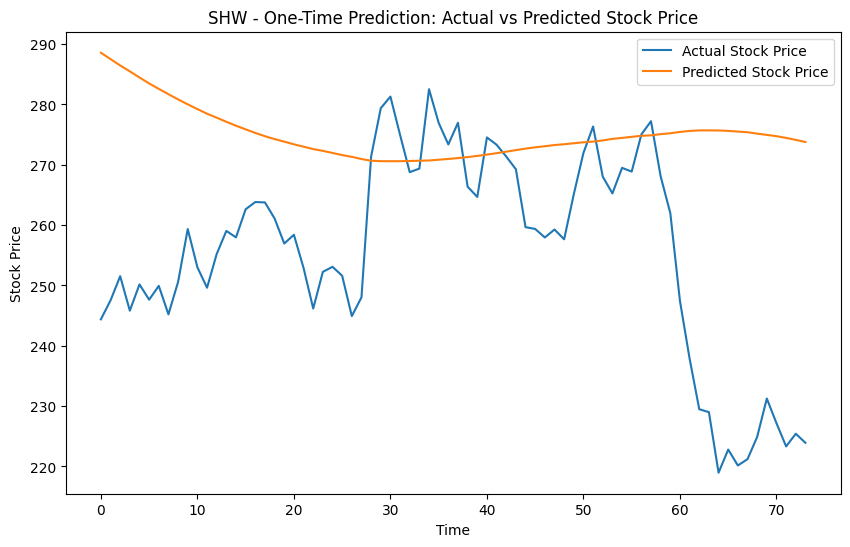


Processing ticker: AMZN


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - AMZN - Training Loss: 0.2518, Validation Loss: 0.1828
Epoch 2/150 - AMZN - Training Loss: 0.1390, Validation Loss: 0.1162
Epoch 3/150 - AMZN - Training Loss: 0.0197, Validation Loss: 0.0685
Epoch 4/150 - AMZN - Training Loss: 0.0364, Validation Loss: 0.1297
Epoch 5/150 - AMZN - Training Loss: 0.0228, Validation Loss: 0.1227
Epoch 6/150 - AMZN - Training Loss: 0.0260, Validation Loss: 0.1238
Epoch 7/150 - AMZN - Training Loss: 0.0263, Validation Loss: 0.1258
Epoch 8/150 - AMZN - Training Loss: 0.0230, Validation Loss: 0.1232
Epoch 9/150 - AMZN - Training Loss: 0.0230, Validation Loss: 0.1233
Epoch 10/150 - AMZN - Training Loss: 0.0232, Validation Loss: 0.1236
Epoch 11/150 - AMZN - Training Loss: 0.0230, Validation Loss: 0.1234
Epoch 12/150 - AMZN - Training Loss: 0.0218, Validation Loss: 0.1226
Epoch 13/150 - AMZN - Training Loss: 0.0217, Validation Loss: 0.1225
Early stopping triggered for AMZN


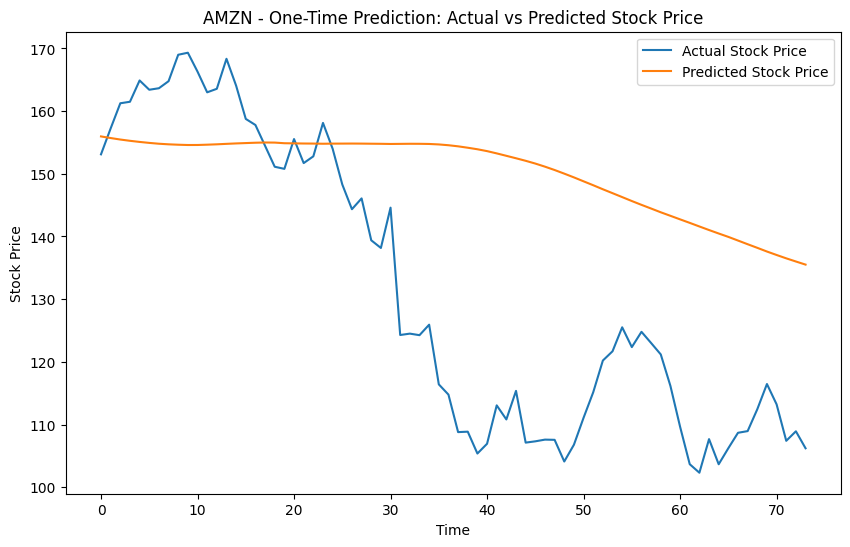


Processing ticker: PG


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - PG - Training Loss: 0.2558, Validation Loss: 0.3780
Epoch 2/150 - PG - Training Loss: 0.1389, Validation Loss: 0.2411
Epoch 3/150 - PG - Training Loss: 0.0361, Validation Loss: 0.1054
Epoch 4/150 - PG - Training Loss: 0.0140, Validation Loss: 0.0307
Epoch 5/150 - PG - Training Loss: 0.0286, Validation Loss: 0.0319
Epoch 6/150 - PG - Training Loss: 0.0216, Validation Loss: 0.0306
Epoch 7/150 - PG - Training Loss: 0.0273, Validation Loss: 0.0312
Epoch 8/150 - PG - Training Loss: 0.0333, Validation Loss: 0.0322
Epoch 9/150 - PG - Training Loss: 0.0363, Validation Loss: 0.0327
Epoch 10/150 - PG - Training Loss: 0.0406, Validation Loss: 0.0336
Epoch 11/150 - PG - Training Loss: 0.0418, Validation Loss: 0.0335
Epoch 12/150 - PG - Training Loss: 0.0412, Validation Loss: 0.0332
Epoch 13/150 - PG - Training Loss: 0.0425, Validation Loss: 0.0335
Epoch 14/150 - PG - Training Loss: 0.0446, Validation Loss: 0.0340
Epoch 15/150 - PG - Training Loss: 0.0455, Validation Loss: 0.0341
Epoc

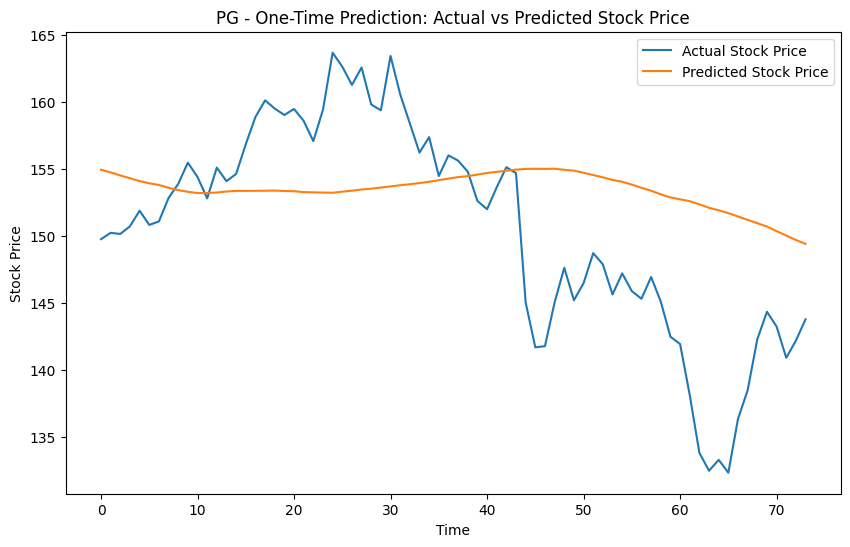


Processing ticker: JNJ


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - JNJ - Training Loss: 0.3376, Validation Loss: 0.5100
Epoch 2/150 - JNJ - Training Loss: 0.2077, Validation Loss: 0.3317
Epoch 3/150 - JNJ - Training Loss: 0.0715, Validation Loss: 0.1318
Epoch 4/150 - JNJ - Training Loss: 0.0045, Validation Loss: 0.0213
Epoch 5/150 - JNJ - Training Loss: 0.0118, Validation Loss: 0.0413
Epoch 6/150 - JNJ - Training Loss: 0.0110, Validation Loss: 0.0384
Epoch 7/150 - JNJ - Training Loss: 0.0099, Validation Loss: 0.0365
Epoch 8/150 - JNJ - Training Loss: 0.0106, Validation Loss: 0.0379
Epoch 9/150 - JNJ - Training Loss: 0.0101, Validation Loss: 0.0371
Epoch 10/150 - JNJ - Training Loss: 0.0100, Validation Loss: 0.0367
Epoch 11/150 - JNJ - Training Loss: 0.0100, Validation Loss: 0.0368
Epoch 12/150 - JNJ - Training Loss: 0.0100, Validation Loss: 0.0369
Epoch 13/150 - JNJ - Training Loss: 0.0100, Validation Loss: 0.0368
Epoch 14/150 - JNJ - Training Loss: 0.0099, Validation Loss: 0.0367
Early stopping triggered for JNJ


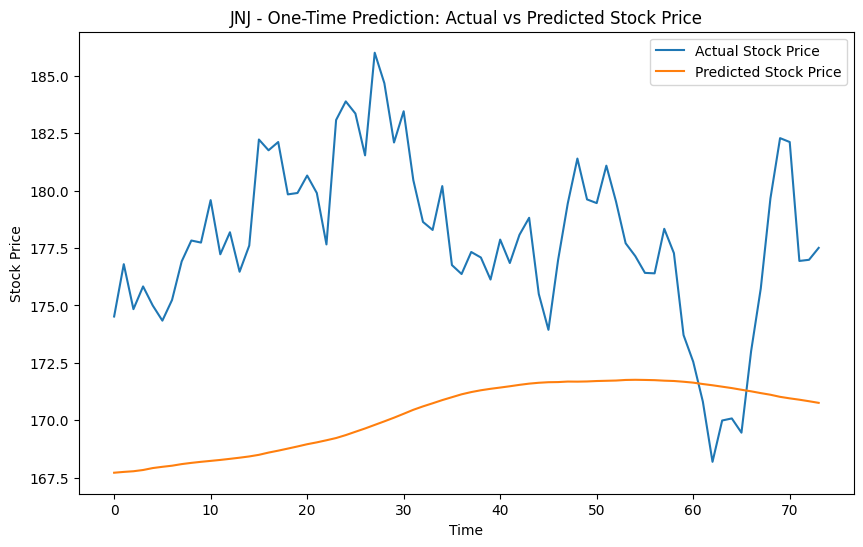


Processing ticker: JPM


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - JPM - Training Loss: 0.0768, Validation Loss: 0.0597
Epoch 2/150 - JPM - Training Loss: 0.0180, Validation Loss: 0.0249
Epoch 3/150 - JPM - Training Loss: 0.0160, Validation Loss: 0.0403
Epoch 4/150 - JPM - Training Loss: 0.2756, Validation Loss: 0.2049
Epoch 5/150 - JPM - Training Loss: 0.1684, Validation Loss: 0.1454
Epoch 6/150 - JPM - Training Loss: 0.1875, Validation Loss: 0.1586
Epoch 7/150 - JPM - Training Loss: 0.1725, Validation Loss: 0.1515
Epoch 8/150 - JPM - Training Loss: 0.1697, Validation Loss: 0.1498
Epoch 9/150 - JPM - Training Loss: 0.1702, Validation Loss: 0.1499
Epoch 10/150 - JPM - Training Loss: 0.1689, Validation Loss: 0.1487
Epoch 11/150 - JPM - Training Loss: 0.1644, Validation Loss: 0.1471
Epoch 12/150 - JPM - Training Loss: 0.1632, Validation Loss: 0.1461
Early stopping triggered for JPM


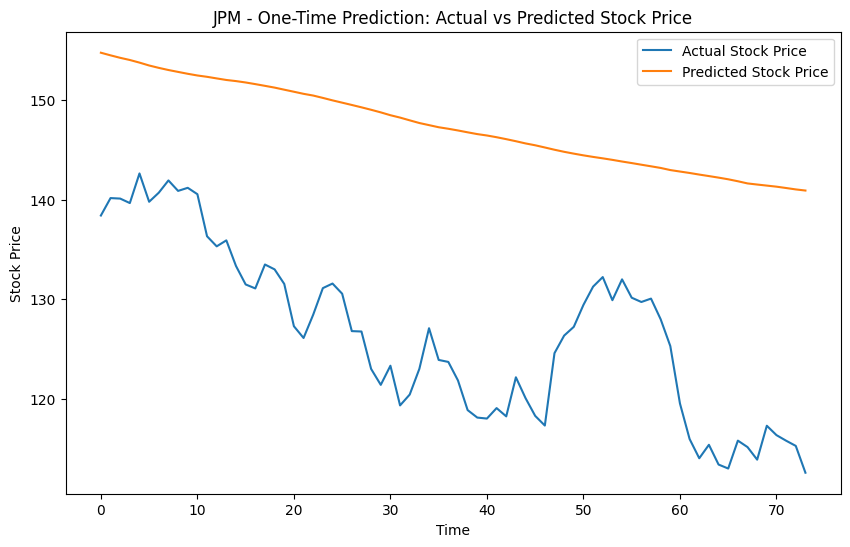


Processing ticker: AAPL


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - AAPL - Training Loss: 0.3374, Validation Loss: 0.3286
Epoch 2/150 - AAPL - Training Loss: 0.2002, Validation Loss: 0.2026
Epoch 3/150 - AAPL - Training Loss: 0.0674, Validation Loss: 0.0816
Epoch 4/150 - AAPL - Training Loss: 0.0031, Validation Loss: 0.0313
Epoch 5/150 - AAPL - Training Loss: 0.0050, Validation Loss: 0.0318
Epoch 6/150 - AAPL - Training Loss: 0.0040, Validation Loss: 0.0299
Epoch 7/150 - AAPL - Training Loss: 0.0067, Validation Loss: 0.0312
Epoch 8/150 - AAPL - Training Loss: 0.0098, Validation Loss: 0.0324
Epoch 9/150 - AAPL - Training Loss: 0.0125, Validation Loss: 0.0332
Epoch 10/150 - AAPL - Training Loss: 0.0159, Validation Loss: 0.0344
Epoch 11/150 - AAPL - Training Loss: 0.0170, Validation Loss: 0.0339
Epoch 12/150 - AAPL - Training Loss: 0.0168, Validation Loss: 0.0334
Epoch 13/150 - AAPL - Training Loss: 0.0182, Validation Loss: 0.0337
Epoch 14/150 - AAPL - Training Loss: 0.0197, Validation Loss: 0.0342
Epoch 15/150 - AAPL - Training Loss: 0.0202

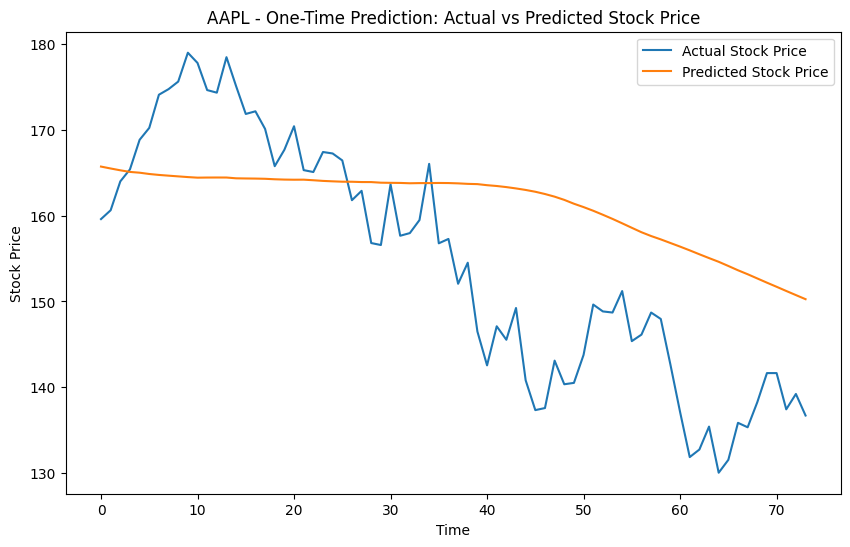


Processing ticker: GOOGL


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - GOOGL - Training Loss: 0.4050, Validation Loss: 0.2757
Epoch 2/150 - GOOGL - Training Loss: 0.2514, Validation Loss: 0.1625
Epoch 3/150 - GOOGL - Training Loss: 0.0753, Validation Loss: 0.0455
Epoch 4/150 - GOOGL - Training Loss: 0.0494, Validation Loss: 0.0840
Epoch 5/150 - GOOGL - Training Loss: 0.0066, Validation Loss: 0.0398
Epoch 6/150 - GOOGL - Training Loss: 0.0131, Validation Loss: 0.0457
Epoch 7/150 - GOOGL - Training Loss: 0.0113, Validation Loss: 0.0426
Epoch 8/150 - GOOGL - Training Loss: 0.0125, Validation Loss: 0.0421
Epoch 9/150 - GOOGL - Training Loss: 0.0123, Validation Loss: 0.0410
Epoch 10/150 - GOOGL - Training Loss: 0.0091, Validation Loss: 0.0371
Epoch 11/150 - GOOGL - Training Loss: 0.0087, Validation Loss: 0.0365
Epoch 12/150 - GOOGL - Training Loss: 0.0095, Validation Loss: 0.0369
Epoch 13/150 - GOOGL - Training Loss: 0.0093, Validation Loss: 0.0363
Epoch 14/150 - GOOGL - Training Loss: 0.0094, Validation Loss: 0.0361
Epoch 15/150 - GOOGL - Traini

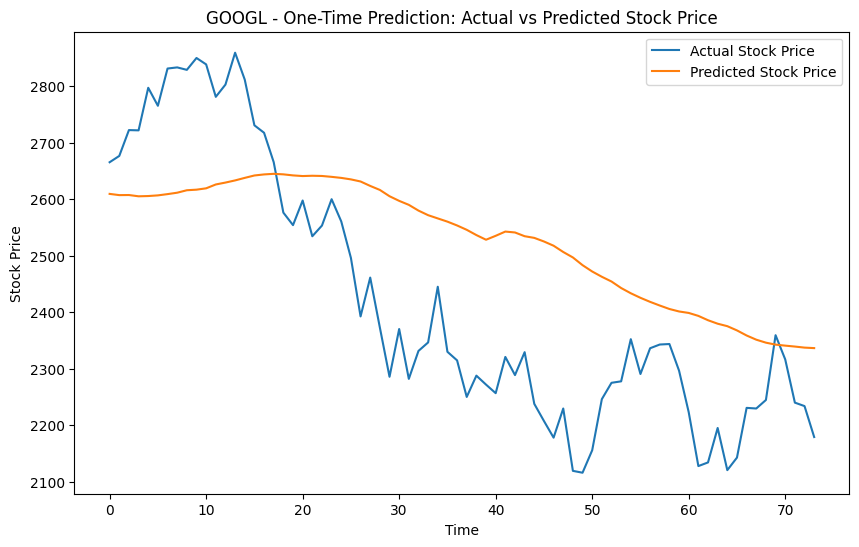


Processing ticker: NEE


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - NEE - Training Loss: 0.1545, Validation Loss: 0.1220
Epoch 2/150 - NEE - Training Loss: 0.0830, Validation Loss: 0.0785
Epoch 3/150 - NEE - Training Loss: 0.0243, Validation Loss: 0.0532
Epoch 4/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0630
Epoch 5/150 - NEE - Training Loss: 0.0020, Validation Loss: 0.0666
Epoch 6/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0632
Epoch 7/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0624
Epoch 8/150 - NEE - Training Loss: 0.0017, Validation Loss: 0.0623
Epoch 9/150 - NEE - Training Loss: 0.0018, Validation Loss: 0.0622
Epoch 10/150 - NEE - Training Loss: 0.0018, Validation Loss: 0.0621
Epoch 11/150 - NEE - Training Loss: 0.0018, Validation Loss: 0.0620
Epoch 12/150 - NEE - Training Loss: 0.0018, Validation Loss: 0.0619
Epoch 13/150 - NEE - Training Loss: 0.0018, Validation Loss: 0.0618
Early stopping triggered for NEE


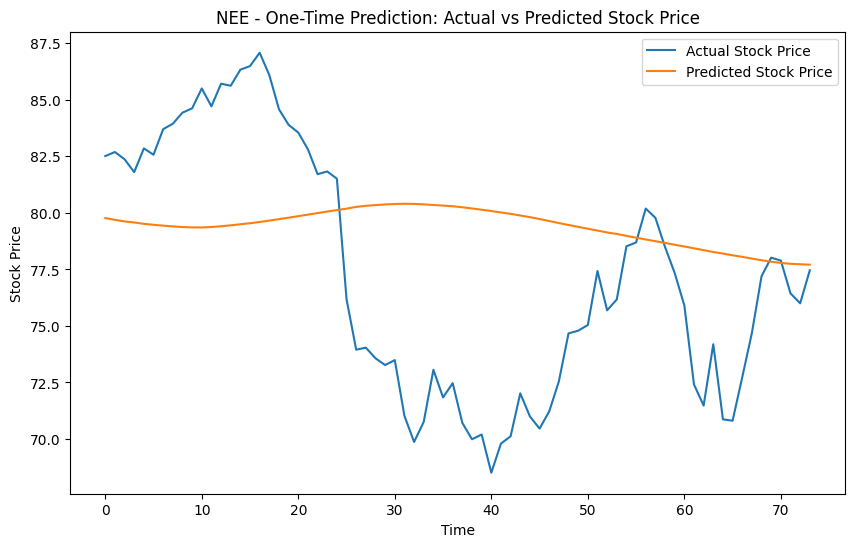


Processing ticker: AMT


C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
C:\Users\tanxi\AppData\Local\Temp\ipykernel_28664\3429015074.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Epoch 1/150 - AMT - Training Loss: 0.0937, Validation Loss: 0.2162
Epoch 2/150 - AMT - Training Loss: 0.0353, Validation Loss: 0.1252
Epoch 3/150 - AMT - Training Loss: 0.0003, Validation Loss: 0.0371
Epoch 4/150 - AMT - Training Loss: 0.0764, Validation Loss: 0.0243
Epoch 5/150 - AMT - Training Loss: 0.0514, Validation Loss: 0.0166
Epoch 6/150 - AMT - Training Loss: 0.0420, Validation Loss: 0.0154
Epoch 7/150 - AMT - Training Loss: 0.0465, Validation Loss: 0.0162
Epoch 8/150 - AMT - Training Loss: 0.0436, Validation Loss: 0.0158
Epoch 9/150 - AMT - Training Loss: 0.0418, Validation Loss: 0.0156
Epoch 10/150 - AMT - Training Loss: 0.0406, Validation Loss: 0.0156
Epoch 11/150 - AMT - Training Loss: 0.0366, Validation Loss: 0.0152
Epoch 12/150 - AMT - Training Loss: 0.0350, Validation Loss: 0.0151
Epoch 13/150 - AMT - Training Loss: 0.0346, Validation Loss: 0.0151
Epoch 14/150 - AMT - Training Loss: 0.0342, Validation Loss: 0.0152
Epoch 15/150 - AMT - Training Loss: 0.0337, Validation Lo

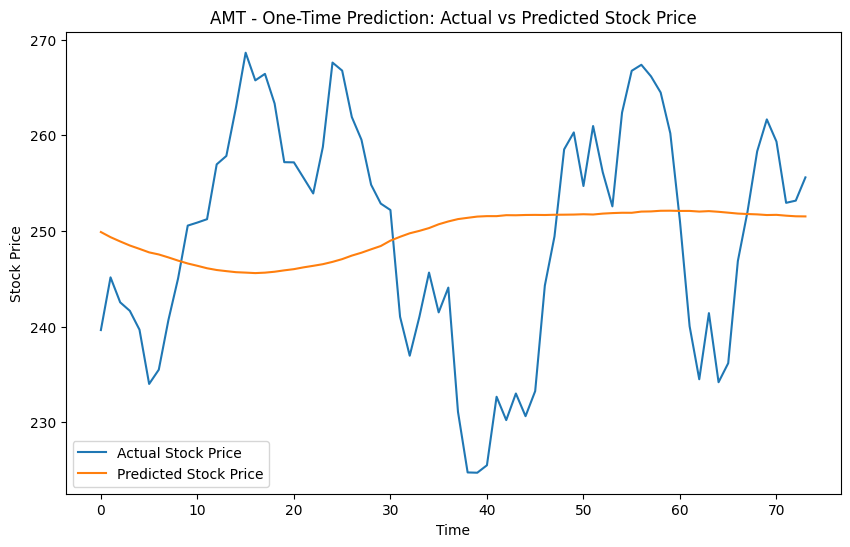

Ticker: XOM
Mean Squared Error (MSE): 213.47265533491597
Root Mean Squared Error (RMSE): 14.6107034510634
Mean Absolute Percentage Error (MAPE): 15.12426183820042%


Ticker: SHW
Mean Squared Error (MSE): 737.985744619682
Root Mean Squared Error (RMSE): 27.16589303924467
Mean Absolute Percentage Error (MAPE): 8.808748145999926%


Ticker: AMZN
Mean Squared Error (MSE): 739.8286569050649
Root Mean Squared Error (RMSE): 27.199791486426232
Mean Absolute Percentage Error (MAPE): 19.65794830503859%


Ticker: PG
Mean Squared Error (MSE): 64.79563348999915
Root Mean Squared Error (RMSE): 8.049573497397185
Mean Absolute Percentage Error (MAPE): 4.458812356836532%


Ticker: JNJ
Mean Squared Error (MSE): 74.7413903490968
Root Mean Squared Error (RMSE): 8.645310309589634
Mean Absolute Percentage Error (MAPE): 4.3838139010484545%


Ticker: JPM
Mean Squared Error (MSE): 466.71997038871507
Root Mean Squared Error (RMSE): 21.603702700896324
Mean Absolute Percentage Error (MAPE): 16.80445631822567%


Ti

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# List of tickers
tickers = ["XOM", "SHW", "AMZN", "PG", "JNJ", "JPM", "AAPL", "GOOGL", "NEE", "AMT"]

# Load and preprocess the dataset
data = pd.read_csv("C:/Users/tanxi/Downloads/company_stock_details.csv", low_memory=False)

# Initialize results dictionary to store results for each company
results = {}

# Define the Attention LSTM model
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size=1, num_layers=1):
        super(AttentionLSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True, bidirectional=True)
        self.attention = nn.Linear(hidden_layer_size * 2, 1)
        self.linear = nn.Linear(hidden_layer_size * 2, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()
        c_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_layer_size).requires_grad_()

        lstm_out, _ = self.lstm(x, (h_0, c_0))  # LSTM output
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)  # Compute attention weights
        context = torch.sum(attn_weights * lstm_out, dim=1)  # Weighted sum
        predictions = self.linear(context)
        return predictions

# Define function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting the 'Close_Log' (log-transformed close price)
    return np.array(X), np.array(y)

# Hyperparameters
sequence_length = 45
hidden_layer_size = 384
num_layers = 1
dropout_rate = 0.2
learning_rate = 0.00005
batch_size = 16
epochs = 150
early_stopping_patience = 10

# Loop through each ticker and train an individual model
for ticker in tickers:
    print(f"\nProcessing ticker: {ticker}")
    
    # Filter data for specific ticker
    data_filtered = data[data['Symbol'] == ticker]

    # Feature engineering
    data_filtered['Close_Log'] = np.log1p(data_filtered['Close'])
    data_filtered['Close_MA7'] = data_filtered['Close'].rolling(window=7).mean()
    data_filtered['Close_MA30'] = data_filtered['Close'].rolling(window=30).mean()
    data_filtered = data_filtered[['Close_Log', 'Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 
                                   'News - New Products', 'News - Analyst Comments', 'News - Adverse Events', 
                                   'Close_MA7', 'Close_MA30']].dropna()

    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_filtered)

    # Create sequences
    X, y = create_sequences(scaled_data, sequence_length)

    # Split into train and validation sets
    split_index = int(len(X) * 0.8)
    X_train, X_val = X[:split_index], X[split_index:]
    y_train, y_val = y[:split_index], y[split_index:]

    # Convert to tensors
    X_train_tensor = torch.from_numpy(X_train).float()
    y_train_tensor = torch.from_numpy(y_train).float()

    # Initialize the model, loss function, and optimizer
    input_size = data_filtered.shape[1]
    model = AttentionLSTM(input_size=input_size, hidden_layer_size=hidden_layer_size)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    # Early stopping setup
    min_val_loss = np.inf
    early_stop_counter = 0

    # Training loop
    for epoch in range(epochs):
        model.train()
        for i in range(0, len(X_train_tensor), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            X_val_tensor = torch.from_numpy(X_val).float()
            y_val_tensor = torch.from_numpy(y_val).float()
            y_pred_val = model(X_val_tensor)
            val_loss = loss_function(y_pred_val, y_val_tensor.unsqueeze(1)).item()
        
        print(f"Epoch {epoch+1}/{epochs} - {ticker} - Training Loss: {loss.item():.4f}, Validation Loss: {val_loss:.4f}")
        
        # Scheduler step
        scheduler.step(val_loss)

        # Early stopping check
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= early_stopping_patience:
                print(f"Early stopping triggered for {ticker}")
                break

    # One-time prediction on the validation set
    model.eval()
    with torch.no_grad():
        X_val_tensor = torch.from_numpy(X_val).float()
        y_pred_val = model(X_val_tensor).squeeze().numpy()

    # Rescale and evaluate
    actual_values_rescaled = np.expm1(scaler.inverse_transform(
        np.concatenate([y_val.reshape(-1, 1), np.zeros((len(y_val), input_size - 1))], axis=1))[:, 0])
    predicted_values_rescaled = np.expm1(scaler.inverse_transform(
        np.concatenate([y_pred_val.reshape(-1, 1), np.zeros((len(y_pred_val), input_size - 1))], axis=1))[:, 0])

    # Calculate error metrics
    mse = mean_squared_error(actual_values_rescaled, predicted_values_rescaled)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_values_rescaled - predicted_values_rescaled) / actual_values_rescaled)) * 100

    # Store results for the ticker
    results[ticker] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Actual": actual_values_rescaled,
        "Predicted": predicted_values_rescaled
    }

    # Plot for each company
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_rescaled, label='Actual Stock Price')
    plt.plot(predicted_values_rescaled, label='Predicted Stock Price')
    plt.title(f'{ticker} - One-Time Prediction: Actual vs Predicted Stock Price')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Print summary of results for each company
for ticker, metrics in results.items():
    print(f"Ticker: {ticker}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']}%")
    print("\n")


# Facebook Prophet

In [ ]:
'''import pandas as pd
from prophet import Prophet

# Load the data (assume it's in CSV format)
data = pd.read_csv('merged_company_data.csv')

# Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Prepare a list to hold individual DataFrames for each company
company_forecasts = []

# Get unique companies from the dataset
companies = data['Symbol'].unique()

for company in companies:
    # Filter the data for the current company
    company_data = data[data['Symbol'] == company]
    
    # Prepare the DataFrame for Prophet
    company_data = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    
    # Add a column to identify the company (optional)
    company_data['Symbol'] = company
    
    # Fit the model
    model = Prophet()
    model.fit(company_data)
    
    # Create future DataFrame for predictions (e.g., 5 days into the future)
    future = model.make_future_dataframe(periods=5)
    
    # Predict future stock prices
    forecast = model.predict(future)
    
    # Append the forecast results
    forecast['Symbol'] = company  # Add company column for identification
    company_forecasts.append(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Symbol']])

    # Concatenate all company forecasts into a single DataFrame
final_forecast = pd.concat(company_forecasts, ignore_index=True)

import matplotlib.pyplot as plt

# Function to plot forecasts for each company
def plot_forecast(forecast_df):
    for company in forecast_df['Symbol'].unique():
        company_forecast = forecast_df[forecast_df['Symbol'] == company]
        plt.figure(figsize=(10, 5))
        plt.plot(company_forecast['ds'], company_forecast['yhat'], label='Predicted', color='blue')
        plt.fill_between(company_forecast['ds'], 
                         company_forecast['yhat_lower'], 
                         company_forecast['yhat_upper'], 
                         color='lightblue', alpha=0.5, label='Confidence Interval')
        plt.title(f'Stock Price Forecast for {company}')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.grid()
        plt.show()

plot_forecast(final_forecast)'''

'''import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# List of important companies for analysis
chosen_companies = ['MMM', 'AAPL', 'GOOGL']  # Example company tickers, modify as needed

# Filter data for only important companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast in a dictionary
forecasts = {}

for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]

    # Prepare the data for Prophet
    df = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,  # Disable default yearly seasonality
        weekly_seasonality=False,  # Disable default weekly seasonality
        holidays=holidays,         # Add holidays
        seasonality_mode='multiplicative',  # Adjust trend-season interaction
        changepoint_prior_scale=0.05  # Increase sensitivity to changes in trend
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    # Fit the model on company data
    model.fit(df)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=future_periods)

    # Generate forecast
    forecast = model.predict(future)
    forecasts[company] = forecast

    # Plot forecast with confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        color='skyblue',
        alpha=0.4,
        label='Confidence Interval'
    )
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Forecast for {company}')
    plt.legend()
    plt.show()'''

'''import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# List of important companies for analysis
chosen_companies = ['MMM', 'AAPL', 'GOOGL']  # Example company tickers, modify as needed

# Filter data for only important companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast in a dictionary
forecasts = {}

for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]

    # Prepare the data for Prophet
    df = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,  # Disable default yearly seasonality
        weekly_seasonality=False,  # Disable default weekly seasonality
        holidays=holidays,         # Add holidays
        seasonality_mode='multiplicative',  # Adjust trend-season interaction
        changepoint_prior_scale=0.05  # Increase sensitivity to changes in trend
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    # Fit the model on company data
    model.fit(df)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=future_periods)

    # Generate forecast
    forecast = model.predict(future)
    forecasts[company] = forecast

    # Plot forecast with confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        color='skyblue',
        alpha=0.4,
        label='Confidence Interval'
    )
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Forecast for {company}')
    plt.legend()

    # Save each plot with the company name
    plt.savefig(f'{company}_forecast.png')
    plt.close()  # Close the plot to free up memory

print("Forecasts and plots saved for each important company.")'''

'''import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# Calculate average volume for each company and determine the top 20% threshold
company_avg_volume = data.groupby('Symbol')['Volume'].mean().reset_index()
threshold_volume = company_avg_volume['Volume'].quantile(0.8)
chosen_companies = company_avg_volume[company_avg_volume['Volume'] >= threshold_volume]['Symbol']

# Filter data for only important companies based on the threshold
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast in a dictionary
forecasts = {}

for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]

    # Prepare the data for Prophet
    df = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,  # Disable default yearly seasonality
        weekly_seasonality=False,  # Disable default weekly seasonality
        holidays=holidays,         # Add holidays
        seasonality_mode='multiplicative',  # Adjust trend-season interaction
        changepoint_prior_scale=0.05  # Increase sensitivity to changes in trend
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    # Fit the model on company data
    model.fit(df)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=future_periods)

    # Generate forecast
    forecast = model.predict(future)
    forecasts[company] = forecast

    # Plot forecast with confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        color='skyblue',
        alpha=0.4,
        label='Confidence Interval'
    )
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Forecast for {company}')
    plt.legend()

    # Save each plot with the company name
    plt.savefig(f'{company}_forecast.png')
    plt.close()  # Close the plot to free up memory

print("Forecasts and plots saved for each important company.")'''

''' model before i included additional regressors
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# List of companies for analysis
chosen_companies = ['XOM', 'SHW', 'AMZN', 'PG', 'JNJ', 'JPM', 'AAPL', 'GOOGL', 'NEE', 'AMT', 'MMM']

# Filter data for only the selected companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast and MAPE in dictionaries
forecasts = {}
mape_values = []

for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]

    # Prepare the data for Prophet
    df = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        holidays=holidays,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    # Fit the model on company data
    model.fit(df)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=future_periods)

    # Generate forecast
    forecast = model.predict(future)
    forecasts[company] = forecast

    # Plot forecast with confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        color='skyblue',
        alpha=0.4,
        label='Confidence Interval'
    )
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Forecast for {company}')
    plt.legend()

    # Save each plot with the company name
    plt.savefig(f'{company}_forecast.png')
    plt.close()  # Close the plot to free up memory

# Calculate MAPE for each company
company_mape = {}

for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]
    df = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Ensure the lengths match by merging on dates
    actual_vs_pred = df.merge(forecasts[company][['ds', 'yhat']], on='ds')
    
    # Compute MAPE for each company
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    company_mape[company] = mape
    print(f"MAPE for {company}: {mape:.2%}")

# Calculate and print the average MAPE
average_mape = sum(company_mape.values()) / len(company_mape)
print(f"Average MAPE across companies: {average_mape:.2%}") '''

'''ruined model after trying to include regressors and had the values being fitted messed up again
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# Define the list of selected companies
selected_companies = ['XOM', 'SHW', 'AMZN', 'PG', 'JNJ', 'JPM', 'AAPL', 'GOOGL', 'NEE', 'AMT', 'MMM']

# Filter data for selected companies
filtered_data = data[data['Symbol'].isin(selected_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast and MAPE in dictionaries
forecasts = {}
mape_results = {}

for company in selected_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]

    # Prepare the data for Prophet
    df = company_data[['Date', 'Close', 'News - Positive Sentiment', 'News - Negative Sentiment']].rename(columns={'Date': 'ds', 'Close': 'y'})
    
    # Handle missing values by filling with zero (or use forward fill if more suitable)
    df[['News - Positive Sentiment', 'News - Negative Sentiment']] = df[['News - Positive Sentiment', 'News - Negative Sentiment']].fillna(0)
    
    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        holidays=holidays,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])
    
    # Add the news sentiment regressors
    model.add_regressor('News - Positive Sentiment')
    model.add_regressor('News - Negative Sentiment')

    # Fit the model on company data
    model.fit(df)

    # Create a future dataframe for predictions, including regressors
    future = model.make_future_dataframe(periods=future_periods)
    future[['News - Positive Sentiment', 'News - Negative Sentiment']] = df[['News - Positive Sentiment', 'News - Negative Sentiment']].iloc[-future_periods:].values

    # Generate forecast
    forecast = model.predict(future)
    forecasts[company] = forecast

    # Calculate MAPE for the fitted model (training period)
    mape = mean_absolute_percentage_error(df['y'], forecast['yhat'][:len(df)])
    mape_results[company] = mape

    # Plot forecast with confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        color='skyblue',
        alpha=0.4,
        label='Confidence Interval'
    )
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Forecast for {company} (with News Sentiment Regressors)')
    plt.legend()

    # Save each plot with the company name
    plt.savefig(f'{company}_forecast_with_regressors.png')
    plt.close()  # Close the plot to free up memory

# Calculate the average MAPE across all selected companies
average_mape = sum(mape_results.values()) / len(mape_results)

print("MAPE for each company:", mape_results)
print("Average MAPE across companies:", average_mape)
print("Forecasts and plots saved for each selected company.")'''

''' pretty good model that gave mape before and after adding regressors
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# List of companies for analysis
chosen_companies = ['XOM', 'SHW', 'AMZN', 'PG', 'JNJ', 'JPM', 'AAPL', 'GOOGL', 'NEE', 'AMT', 'MMM']

# Filter data for only the selected companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast and MAPE in dictionaries
forecasts = {}
mape_values_without_regressors = {}
mape_values_with_regressors = []

# Define a function to create forecasts
def create_forecast(df, company, use_regressors=False):
    # Prepare the data for Prophet
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        holidays=holidays,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    # Add regressors if specified
    if use_regressors:
        df_prophet['News - Positive Sentiment'] = df['News - Positive Sentiment'].fillna(0)  # Fill NaN values
        df_prophet['News - Negative Sentiment'] = df['News - Negative Sentiment'].fillna(0)  # Fill NaN values
        model.add_regressor('News - Positive Sentiment')
        model.add_regressor('News - Negative Sentiment')

    # Fit the model on company data
    model.fit(df_prophet)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=future_periods)

    # If regressors are used, merge them into future
    if use_regressors:
        future = future.merge(df_prophet[['ds', 'News - Positive Sentiment', 'News - Negative Sentiment']], on='ds', how='left')
        future['News - Positive Sentiment'] = future['News - Positive Sentiment'].fillna(0)
        future['News - Negative Sentiment'] = future['News - Negative Sentiment'].fillna(0)

    # Generate forecast
    forecast = model.predict(future)
    return forecast

# First pass: Without regressors
for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]
    
    # Create forecast without regressors
    forecast = create_forecast(company_data, company, use_regressors=False)
    forecasts[company] = forecast

    # Ensure the lengths match by merging on dates
    actual_vs_pred = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast[['ds', 'yhat']], on='ds')
    
    # Compute MAPE for each company
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    mape_values_without_regressors[company] = mape
    print(f"MAPE for {company} without regressors: {mape:.2%}")

# Second pass: With regressors
for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]
    
    # Create forecast with regressors
    forecast = create_forecast(company_data, company, use_regressors=True)
    forecasts[company] = forecast

    # Ensure the lengths match by merging on dates
    actual_vs_pred = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast[['ds', 'yhat']], on='ds')
    
    # Compute MAPE for each company
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    mape_values_with_regressors.append(mape)
    print(f"MAPE for {company} with regressors: {mape:.2%}")

# Calculate and print the average MAPEs
average_mape_without_regressors = sum(mape_values_without_regressors.values()) / len(mape_values_without_regressors)
print(f"Average MAPE across companies without regressors: {average_mape_without_regressors:.2%}")

average_mape_with_regressors = sum(mape_values_with_regressors) / len(mape_values_with_regressors)
print(f"Average MAPE across companies with regressors: {average_mape_with_regressors:.2%}")

# Optionally plot the forecasts
for company, forecast in forecasts.items():
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data[filtered_data['Symbol'] == company]['Date'], 
             filtered_data[filtered_data['Symbol'] == company]['Close'], label='Actual', color='black')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    plt.fill_between(
        forecast['ds'],
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        color='skyblue',
        alpha=0.4,
        label='Confidence Interval'
    )
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Forecast for {company}')
    plt.legend()
    plt.savefig(f'{company}_forecast.png')
    plt.close()  # Close the plot to free up memory'''

'''code that plots 2 x 5 companies
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# List of companies for analysis
chosen_companies = ['XOM', 'SHW', 'AMZN', 'PG', 'JNJ', 'JPM', 'AAPL', 'GOOGL', 'NEE', 'AMT', 'MMM']

# Filter data for only the selected companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast, MAPE, and RMSE in dictionaries
forecasts = {}
metrics_without_regressors = {}
metrics_with_regressors = {}

# Define a function to create forecasts and compute evaluation metrics
def create_forecast(df, company, use_regressors=False):
    # Prepare the data for Prophet
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        holidays=holidays,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    # Add regressors if specified
    if use_regressors:
        df_prophet['News - Positive Sentiment'] = df['News - Positive Sentiment'].fillna(0)
        df_prophet['News - Negative Sentiment'] = df['News - Negative Sentiment'].fillna(0)
        model.add_regressor('News - Positive Sentiment')
        model.add_regressor('News - Negative Sentiment')

    # Fit the model on company data
    model.fit(df_prophet)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=future_periods)

    # If regressors are used, merge them into future
    if use_regressors:
        future = future.merge(df_prophet[['ds', 'News - Positive Sentiment', 'News - Negative Sentiment']], on='ds', how='left')
        future['News - Positive Sentiment'] = future['News - Positive Sentiment'].fillna(0)
        future['News - Negative Sentiment'] = future['News - Negative Sentiment'].fillna(0)

    # Generate forecast
    forecast = model.predict(future)
    return forecast

# Helper function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# First pass: Without regressors
for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]
    
    # Create forecast without regressors
    forecast = create_forecast(company_data, company, use_regressors=False)
    forecasts[company] = forecast

    # Ensure the lengths match by merging on dates
    actual_vs_pred = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast[['ds', 'yhat']], on='ds')
    
    # Compute MAPE and RMSE for each company
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    rmse = calculate_rmse(actual_vs_pred['y'], actual_vs_pred['yhat'])
    metrics_without_regressors[company] = {'MAPE': mape, 'RMSE': rmse}
    print(f"MAPE for {company} without regressors: {mape:.2%}, RMSE: {rmse:.2f}")

# Second pass: With regressors
for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]
    
    # Create forecast with regressors
    forecast = create_forecast(company_data, company, use_regressors=True)
    forecasts[company] = forecast

    # Ensure the lengths match by merging on dates
    actual_vs_pred = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast[['ds', 'yhat']], on='ds')
    
    # Compute MAPE and RMSE for each company
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    rmse = calculate_rmse(actual_vs_pred['y'], actual_vs_pred['yhat'])
    metrics_with_regressors[company] = {'MAPE': mape, 'RMSE': rmse}
    print(f"MAPE for {company} with regressors: {mape:.2%}, RMSE: {rmse:.2f}")

# Calculate and print the average metrics across companies
average_mape_without_regressors = np.mean([v['MAPE'] for v in metrics_without_regressors.values()])
average_rmse_without_regressors = np.mean([v['RMSE'] for v in metrics_without_regressors.values()])
print(f"Average MAPE without regressors: {average_mape_without_regressors:.2%}, Average RMSE without regressors: {average_rmse_without_regressors:.2f}")

average_mape_with_regressors = np.mean([v['MAPE'] for v in metrics_with_regressors.values()])
average_rmse_with_regressors = np.mean([v['RMSE'] for v in metrics_with_regressors.values()])
print(f"Average MAPE with regressors: {average_mape_with_regressors:.2%}, Average RMSE with regressors: {average_rmse_with_regressors:.2f}")

# Set up the number of companies to display per graph
num_companies_per_graph = 5
num_graphs = 2  # Total number of graphs you want

# Create a list of the chosen companies
companies_list = list(chosen_companies)

# Plot the forecasts for each company in two separate graphs
for i in range(num_graphs):
    plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
    for j in range(num_companies_per_graph):
        index = i * num_companies_per_graph + j
        if index < len(companies_list):  # Check if the index is within bounds
            company = companies_list[index]
            forecast = forecasts[company]
            
            # Plot actual data
            plt.plot(filtered_data[filtered_data['Symbol'] == company]['Date'], 
                     filtered_data[filtered_data['Symbol'] == company]['Close'], 
                     label=f'Actual {company}', color='black', linewidth=2)
            # Plot predicted data
            plt.plot(forecast['ds'], forecast['yhat'], label=f'Predicted {company}', linewidth=2)
            # Fill confidence interval
            plt.fill_between(
                forecast['ds'],
                forecast['yhat_lower'],
                forecast['yhat_upper'],
                alpha=0.3
            )

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Forecast for Companies {i * num_companies_per_graph + 1} to {(i + 1) * num_companies_per_graph}')
    plt.legend()
    plt.tight_layout()  # Adjust layout for better spacing
    plt.savefig(f'forecast_graph_{i + 1}.png')
    plt.close()  # Close the plot to free up memory'''

''' good code that outputs the confidence intervals widths and the graphs
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Ensure correct date parsing

# List of companies for analysis
chosen_companies = ['XOM', 'SHW', 'AMZN', 'PG', 'JNJ', 'JPM', 'AAPL', 'GOOGL', 'NEE', 'AMT', 'MMM']

# Filter data for only the selected companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store each forecast, MAPE, and RMSE in dictionaries
forecasts = {}
metrics_without_regressors = {}
metrics_with_regressors = {}
confidence_intervals = {}  # To store confidence interval widths

# Define a function to create forecasts and compute evaluation metrics
def create_forecast(df, company, use_regressors=False):
    # Prepare the data for Prophet
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Initialize Prophet model with custom settings
    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        holidays=holidays,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )

    # Add custom seasonalities
    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    # Add regressors if specified
    if use_regressors:
        df_prophet['News - Positive Sentiment'] = df['News - Positive Sentiment'].fillna(0)
        df_prophet['News - Negative Sentiment'] = df['News - Negative Sentiment'].fillna(0)
        model.add_regressor('News - Positive Sentiment')
        model.add_regressor('News - Negative Sentiment')

    # Fit the model on company data
    model.fit(df_prophet)

    # Create a future dataframe for predictions
    future = model.make_future_dataframe(periods=future_periods)

    # If regressors are used, merge them into future
    if use_regressors:
        future = future.merge(df_prophet[['ds', 'News - Positive Sentiment', 'News - Negative Sentiment']], on='ds', how='left')
        future['News - Positive Sentiment'] = future['News - Positive Sentiment'].fillna(0)
        future['News - Negative Sentiment'] = future['News - Negative Sentiment'].fillna(0)

    # Generate forecast
    forecast = model.predict(future)
    
    return forecast

# Helper function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# First pass: Without regressors
for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]
    
    # Create forecast without regressors
    forecast = create_forecast(company_data, company, use_regressors=False)
    forecasts[company] = forecast

    # Ensure the lengths match by merging on dates
    actual_vs_pred = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast[['ds', 'yhat']], on='ds')
    
    # Compute MAPE and RMSE for each company
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    rmse = calculate_rmse(actual_vs_pred['y'], actual_vs_pred['yhat'])
    metrics_without_regressors[company] = {'MAPE': mape, 'RMSE': rmse}
    print(f"MAPE for {company} without regressors: {mape:.2%}, RMSE: {rmse:.2f}")

# Second pass: With regressors
for company in chosen_companies:
    # Filter for a single company's data
    company_data = filtered_data[filtered_data['Symbol'] == company]
    
    # Create forecast with regressors
    forecast = create_forecast(company_data, company, use_regressors=True)
    forecasts[company] = forecast

    # Ensure the lengths match by merging on dates
    actual_vs_pred = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast[['ds', 'yhat']], on='ds')
    
    # Compute MAPE and RMSE for each company
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    rmse = calculate_rmse(actual_vs_pred['y'], actual_vs_pred['yhat'])
    metrics_with_regressors[company] = {'MAPE': mape, 'RMSE': rmse}
    print(f"MAPE for {company} with regressors: {mape:.2%}, RMSE: {rmse:.2f}")

# Calculate and print the average metrics across companies
average_mape_without_regressors = np.mean([v['MAPE'] for v in metrics_without_regressors.values()])
average_rmse_without_regressors = np.mean([v['RMSE'] for v in metrics_without_regressors.values()])
print(f"Average MAPE without regressors: {average_mape_without_regressors:.2%}, Average RMSE without regressors: {average_rmse_without_regressors:.2f}")

average_mape_with_regressors = np.mean([v['MAPE'] for v in metrics_with_regressors.values()])
average_rmse_with_regressors = np.mean([v['RMSE'] for v in metrics_with_regressors.values()])
print(f"Average MAPE with regressors: {average_mape_with_regressors:.2%}, Average RMSE with regressors: {average_rmse_with_regressors:.2f}")

# Calculate confidence interval widths and store for comparison
for company, forecast in forecasts.items():
    confidence_interval_width = forecast['yhat_upper'] - forecast['yhat_lower']
    confidence_intervals[company] = confidence_interval_width.mean()  # Store average width for each company
    print(f"Average confidence interval width for {company}: {confidence_interval_width.mean():.2f}")

# Plotting forecasts in two separate figures
num_companies = len(chosen_companies)  # Get the number of companies

# Create the first figure for the first half of companies
fig1, axs1 = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # Adjust the number of rows and columns
axs1 = axs1.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot first five companies
for i, company in enumerate(chosen_companies[:5]):
    forecast = forecasts[company]  # Get the forecast for the company

    # Plot actual stock prices
    axs1[i].plot(filtered_data[filtered_data['Symbol'] == company]['Date'], 
                  filtered_data[filtered_data['Symbol'] == company]['Close'], 
                  label='Actual Prices', color='blue')  # Actual stock prices in blue
    
    # Plot predicted stock prices
    axs1[i].plot(forecast['ds'], forecast['yhat'], label='Predicted Prices', color='orange')  # Predicted stock prices in orange
    
    # Plot the uncertainty intervals
    axs1[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                         color='gray', alpha=0.2, label='Uncertainty Interval')  # Fill between the lower and upper bounds of predictions
    
    # Set plot title and labels
    axs1[i].set_title(company)
    axs1[i].set_xlabel('Date')
    axs1[i].set_ylabel('Stock Price')
    axs1[i].legend()  # Add legend to the plot

# Hide any empty subplots if they exist
for j in range(i + 1, len(axs1)):
    axs1[j].axis('off')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.savefig('stock_price_forecasts_first_5.png')  # Save the first figure
plt.show()  # Display the first figure

# Create the second figure for the second half of companies
fig2, axs2 = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # Adjust the number of rows and columns
axs2 = axs2.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot the remaining five companies
for i, company in enumerate(chosen_companies[5:]):
    forecast = forecasts[company]  # Get the forecast for the company

    # Plot actual stock prices
    axs2[i].plot(filtered_data[filtered_data['Symbol'] == company]['Date'], 
                  filtered_data[filtered_data['Symbol'] == company]['Close'], 
                  label='Actual Prices', color='blue')  # Actual stock prices in blue
    
    # Plot predicted stock prices
    axs2[i].plot(forecast['ds'], forecast['yhat'], label='Predicted Prices', color='orange')  # Predicted stock prices in orange
    
    # Plot the uncertainty intervals
    axs2[i].fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                         color='gray', alpha=0.2, label='Uncertainty Interval')  # Fill between the lower and upper bounds of predictions
    
    # Set plot title and labels
    axs2[i].set_title(company)
    axs2[i].set_xlabel('Date')
    axs2[i].set_ylabel('Stock Price')
    axs2[i].legend()  # Add legend to the plot

# Hide any empty subplots if they exist
for j in range(i + 1, len(axs2)):
    axs2[j].axis('off')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.savefig('stock_price_forecasts_second_5.png')  # Save the second figure
plt.show()  # Display the second figure'''


''' normal and rolling forecasts and allat but no graphs
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Load the data
data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# List of companies for analysis
chosen_companies = ['XOM', 'SHW', 'AMZN', 'PG', 'JNJ', 'JPM', 'AAPL', 'GOOGL', 'NEE', 'AMT', 'MMM']

# Filter data for only the selected companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Store forecasts, metrics, and confidence intervals
forecasts = {}
metrics_without_regressors = {}
metrics_with_regressors = {}
confidence_intervals = {}
confidence_interval_percentages = {}

# Define a function to create forecasts and compute evaluation metrics
def create_forecast(df, company, use_regressors=False):
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        holidays=holidays,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )

    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    if use_regressors:
        df_prophet['News - Positive Sentiment'] = df['News - Positive Sentiment'].fillna(0)
        df_prophet['News - Negative Sentiment'] = df['News - Negative Sentiment'].fillna(0)
        model.add_regressor('News - Positive Sentiment')
        model.add_regressor('News - Negative Sentiment')

    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=future_periods)

    if use_regressors:
        future = future.merge(df_prophet[['ds', 'News - Positive Sentiment', 'News - Negative Sentiment']], on='ds', how='left')
        future['News - Positive Sentiment'] = future['News - Positive Sentiment'].fillna(0)
        future['News - Negative Sentiment'] = future['News - Negative Sentiment'].fillna(0)

    forecast = model.predict(future)
    
    return forecast

# Helper function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Forecast without regressors
for company in chosen_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]
    
    forecast = create_forecast(company_data, company, use_regressors=False)
    forecasts[company] = forecast

    actual_vs_pred = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast[['ds', 'yhat']], on='ds')
    
    mape = mean_absolute_percentage_error(actual_vs_pred['y'], actual_vs_pred['yhat'])
    rmse = calculate_rmse(actual_vs_pred['y'], actual_vs_pred['yhat'])
    metrics_without_regressors[company] = {'MAPE': mape, 'RMSE': rmse}

# Calculate confidence interval metrics without regressors
for company, forecast in forecasts.items():
    confidence_interval_width = forecast['yhat_upper'] - forecast['yhat_lower']
    confidence_intervals[company] = confidence_interval_width.mean()
    
    company_range = filtered_data[filtered_data['Symbol'] == company]['Close'].max() - filtered_data[filtered_data['Symbol'] == company]['Close'].min()
    
    if company_range > 0:
        ci_percentage = (confidence_intervals[company] / company_range) * 100
    else:
        ci_percentage = np.nan

    confidence_interval_percentages[company] = ci_percentage

# Print metrics for forecasts without regressors
print("Metrics without Regressors:")
for company, metrics in metrics_without_regressors.items():
    print(f"{company} - MAPE: {metrics['MAPE']:.2%}, RMSE: {metrics['RMSE']:.2f}, Average Confidence Interval Width: {confidence_intervals[company]:.2f}, CI % of Range: {confidence_interval_percentages[company]:.2f}%")

# Forecast with regressors
for company in chosen_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]

    # Create forecast with regressors
    forecast_with_regressors = create_forecast(company_data, company, use_regressors=True)
    forecasts[company + "_with_regressors"] = forecast_with_regressors

    actual_vs_pred_with_regressors = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}).merge(forecast_with_regressors[['ds', 'yhat']], on='ds')

    # Calculate metrics for forecasts with regressors
    mape_with_regressors = mean_absolute_percentage_error(actual_vs_pred_with_regressors['y'], actual_vs_pred_with_regressors['yhat'])
    rmse_with_regressors = calculate_rmse(actual_vs_pred_with_regressors['y'], actual_vs_pred_with_regressors['yhat'])
    metrics_with_regressors[company] = {'MAPE': mape_with_regressors, 'RMSE': rmse_with_regressors}

# Calculate confidence interval metrics with regressors
for company, forecast in forecasts.items():
    if "_with_regressors" in company:
        confidence_interval_width_with_regressors = forecast['yhat_upper'] - forecast['yhat_lower']
        confidence_intervals[company] = confidence_interval_width_with_regressors.mean()
        
        original_company_name = company.replace("_with_regressors", "")
        company_range = filtered_data[filtered_data['Symbol'] == original_company_name]['Close'].max() - filtered_data[filtered_data['Symbol'] == original_company_name]['Close'].min()
        
        if company_range > 0:
            ci_percentage = (confidence_intervals[company] / company_range) * 100
        else:
            ci_percentage = np.nan

        confidence_interval_percentages[company] = ci_percentage

# Print metrics for forecasts with regressors
print("\nMetrics with Regressors:")
for company, metrics in metrics_with_regressors.items():
    print(f"{company} - MAPE: {metrics['MAPE']:.2%}, RMSE: {metrics['RMSE']:.2f}, Average Confidence Interval Width: {confidence_intervals[company + '_with_regressors']:.2f}, CI % of Range: {confidence_interval_percentages[company + '_with_regressors']:.2f}%")


from prophet import Prophet
import numpy as np
import pandas as pd

# Function to calculate rolling forecast MAPE without regressors
def rolling_forecast_mape(df, company, periods=future_periods):
    # Handle NaN values in the 'Close' column
    df['Close'].fillna(df['Close'].mean(), inplace=True)
    
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    mape_list = []

    # Set initial training data
    initial_train_size = len(df_prophet) - periods

    for i in range(periods):
        # Create a model for the current training window
        train_data = df_prophet.iloc[:initial_train_size + i].copy()
        
        model = Prophet(
            yearly_seasonality=False,
            weekly_seasonality=False,
            holidays=holidays,
            seasonality_mode='multiplicative',
            changepoint_prior_scale=0.05
        )

        model.fit(train_data)

        # Create future dataframe for the next period
        future = model.make_future_dataframe(periods=1)
        forecast = model.predict(future)

        # Extract the predicted value for the next period
        predicted_value = forecast['yhat'].iloc[-1]

        # Get the actual value for that next period
        actual_value = df_prophet['y'].iloc[initial_train_size + i]

        # Calculate MAPE for this prediction
        mape = np.abs((actual_value - predicted_value) / actual_value) * 100
        mape_list.append(mape)

    # Calculate mean MAPE for rolling forecast
    rolling_mape = np.mean(mape_list)
    return rolling_mape, mape_list

# Function to calculate rolling forecast MAPE with regressors
def rolling_forecast_mape_with_regressors(df, company, regressors, periods=future_periods):
    # Handle NaN values for the regressors and 'Close' column
    for regressor in regressors:
        df[regressor].fillna(df[regressor].mean(), inplace=True)
    df['Close'].fillna(df['Close'].mean(), inplace=True)

    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    mape_list = []

    # Set initial training data
    initial_train_size = len(df_prophet) - periods

    for i in range(periods):
        # Create a model for the current training window
        train_data = df_prophet.iloc[:initial_train_size + i].copy()

        # Add regressors to the training data
        for regressor in regressors:
            train_data[regressor] = df[regressor].iloc[:initial_train_size + i].values

        model = Prophet(
            yearly_seasonality=False,
            weekly_seasonality=False,
            holidays=holidays,
            seasonality_mode='multiplicative',
            changepoint_prior_scale=0.05
        )

        # Add regressors to the Prophet model
        for regressor in regressors:
            model.add_regressor(regressor)

        model.fit(train_data)

        # Create future dataframe for the next period
        future = model.make_future_dataframe(periods=1)

        # Add regressor values for the future periods
        for regressor in regressors:
            future[regressor] = df[regressor].iloc[initial_train_size + i]  # Direct assignment

        forecast = model.predict(future)

        # Extract the predicted value for the next period
        predicted_value = forecast['yhat'].iloc[-1]

        # Get the actual value for that next period
        actual_value = df_prophet['y'].iloc[initial_train_size + i]

        # Calculate MAPE for this prediction
        mape = np.abs((actual_value - predicted_value) / actual_value) * 100
        mape_list.append(mape)

    # Calculate mean MAPE for rolling forecast
    rolling_mape = np.mean(mape_list)
    return rolling_mape, mape_list

# Specify your regressors here
regressors = ['News - Positive Sentiment', 'News - Negative Sentiment', 'News - New Products', 'Volume', 'News - Analyst Comments', 'News - Stocks']

# Calculate rolling MAPE for each company without regressors
rolling_mape_results = {}
rolling_mape_individuals_without = {}
for company in chosen_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]
    rolling_mape, individual_mapes = rolling_forecast_mape(company_data, company)
    rolling_mape_results[company] = rolling_mape
    rolling_mape_individuals_without[company] = individual_mapes

# Calculate rolling MAPE for each company with regressors
rolling_mape_results_with_regressors = {}
rolling_mape_individuals_with = {}
for company in chosen_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]
    rolling_mape, individual_mapes = rolling_forecast_mape_with_regressors(company_data, company, regressors)
    rolling_mape_results_with_regressors[company] = rolling_mape
    rolling_mape_individuals_with[company] = individual_mapes

# Output mean rolling forecast MAPE across all companies
mean_rolling_mape = np.mean(list(rolling_mape_results.values()))
mean_rolling_mape_with_regressors = np.mean(list(rolling_mape_results_with_regressors.values()))

# Summary of results
print("\nRolling Forecast MAPE Summary:")
print("--------------------------------------------------")
print(f"{'Company':<15} {'MAPE (without regressors)':<30} {'MAPE (with regressors)':<30}")
print("--------------------------------------------------")
for company in chosen_companies:
    mape_without = rolling_mape_results.get(company, 0)
    mape_with = rolling_mape_results_with_regressors.get(company, 0)
    print(f"{company:<15} {mape_without:.2f}%{' ' * 20} {mape_with:.2f}%")

print("--------------------------------------------------")
print(f"Mean Rolling Forecast MAPE across all companies without regressors: {mean_rolling_mape:.2f}%")
print(f"Mean Rolling Forecast MAPE across all companies with regressors: {mean_rolling_mape_with_regressors:.2f}%")'''


import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

data = pd.read_csv('merged_company_data.csv', low_memory=False, dtype={'ColumnName': str})
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# List of companies we chose at random from each industry
chosen_companies = ['XOM', 'SHW', 'AMZN', 'PG', 'JNJ', 'JPM', 'AAPL', 'GOOGL', 'NEE', 'AMT', 'MMM']

# Filter data for only the chosen companies
filtered_data = data[data['Symbol'].isin(chosen_companies)]

# Forecasting parameters
future_periods = 365  # Number of days to forecast
custom_seasonalities = {
    'monthly': {'period': 30.5, 'fourier_order': 5},
    'quarterly': {'period': 91.25, 'fourier_order': 7}
}

# Holidays (Example: US stock market holidays)
holidays = pd.DataFrame({
    'holiday': 'market_holiday',
    'ds': pd.to_datetime(['2022-01-01', '2022-12-25', '2022-07-04']),
    'lower_window': 0,
    'upper_window': 1,
})

# Function to create forecasts and compute evaluation metrics
def create_forecast(df, company, use_regressors=False):
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=False,
        holidays=holidays,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )

    for name, params in custom_seasonalities.items():
        model.add_seasonality(name=name, period=params['period'], fourier_order=params['fourier_order'])

    if use_regressors:
        df_prophet['News - Positive Sentiment'] = df['News - Positive Sentiment'].fillna(0)
        df_prophet['News - Negative Sentiment'] = df['News - Negative Sentiment'].fillna(0)
        model.add_regressor('News - Positive Sentiment')
        model.add_regressor('News - Negative Sentiment')

    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=future_periods)

    if use_regressors:
        future = future.merge(df_prophet[['ds', 'News - Positive Sentiment', 'News - Negative Sentiment']], on='ds', how='left')
        future['News - Positive Sentiment'] = future['News - Positive Sentiment'].fillna(0)
        future['News - Negative Sentiment'] = future['News - Negative Sentiment'].fillna(0)

    forecast = model.predict(future)
    
    return forecast

# Helper function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate rolling forecast predictions WITHOUT regressors
def rolling_forecast_predictions(df, company, periods=future_periods):
    df['Close'].fillna(df['Close'].mean(), inplace=True)
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    predictions = []
    lower_bounds = []
    upper_bounds = []
    initial_train_size = len(df_prophet) - periods

    for i in range(periods):
        train_data = df_prophet.iloc[:initial_train_size + i].copy()
        model = Prophet(yearly_seasonality=False, weekly_seasonality=False, holidays=holidays,
                        seasonality_mode='multiplicative', changepoint_prior_scale=0.05)
        model.fit(train_data)
        future = model.make_future_dataframe(periods=1)
        forecast = model.predict(future)

        predicted_value = forecast['yhat'].iloc[-1]
        lower_bound = forecast['yhat_lower'].iloc[-1]
        upper_bound = forecast['yhat_upper'].iloc[-1]

        predictions.append(predicted_value)
        lower_bounds.append(lower_bound)
        upper_bounds.append(upper_bound)

    return predictions, lower_bounds, upper_bounds

# Function to calculate rolling forecast predictions WITH regressors
def rolling_forecast_predictions_with_regressors(df, company, regressors, periods=future_periods):
    for regressor in regressors:
        df[regressor].fillna(df[regressor].mean(), inplace=True)
    df['Close'].fillna(df['Close'].mean(), inplace=True)
    df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    predictions = []
    lower_bounds = []
    upper_bounds = []
    initial_train_size = len(df_prophet) - periods

    for i in range(periods):
        train_data = df_prophet.iloc[:initial_train_size + i].copy()
        for regressor in regressors:
            train_data[regressor] = df[regressor].iloc[:initial_train_size + i].values

        model = Prophet(yearly_seasonality=False, weekly_seasonality=False, holidays=holidays,
                        seasonality_mode='multiplicative', changepoint_prior_scale=0.05)

        for regressor in regressors:
            model.add_regressor(regressor)

        model.fit(train_data)
        future = model.make_future_dataframe(periods=1)

        for regressor in regressors:
            future[regressor] = df[regressor].iloc[initial_train_size + i]

        forecast = model.predict(future)

        predicted_value = forecast['yhat'].iloc[-1]
        lower_bound = forecast['yhat_lower'].iloc[-1]
        upper_bound = forecast['yhat_upper'].iloc[-1]

        predictions.append(predicted_value)
        lower_bounds.append(lower_bound)
        upper_bounds.append(upper_bound)

    return predictions, lower_bounds, upper_bounds

regressors = ['News - Positive Sentiment', 'News - Negative Sentiment', 'News - New Products', 'Volume', 'News - Analyst Comments', 'News - Stocks']

# Calculate rolling predictions for each company WITHOUT regressors
rolling_predictions_results = {}
rolling_lower_bounds = {}
rolling_upper_bounds = {}
for company in chosen_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]
    predictions, lower_bounds, upper_bounds = rolling_forecast_predictions(company_data, company)
    rolling_predictions_results[company] = predictions
    rolling_lower_bounds[company] = lower_bounds
    rolling_upper_bounds[company] = upper_bounds

# Calculate rolling predictions for each company WITH regressors
rolling_predictions_results_with_regressors = {}
rolling_lower_bounds_with_regressors = {}
rolling_upper_bounds_with_regressors = {}
for company in chosen_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]
    predictions, lower_bounds, upper_bounds = rolling_forecast_predictions_with_regressors(company_data, company, regressors)
    rolling_predictions_results_with_regressors[company] = predictions
    rolling_lower_bounds_with_regressors[company] = lower_bounds
    rolling_upper_bounds_with_regressors[company] = upper_bounds

# Saving individual plots for each company
for company in chosen_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]

    # Normal Prophet Forecast without regressors
    forecast_without_regressors = create_forecast(company_data, company, use_regressors=False)

    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Date'], company_data['Close'], label='Actual', color='blue')
    plt.plot(forecast_without_regressors['ds'], forecast_without_regressors['yhat'], label='Predicted', color='orange')
    plt.fill_between(forecast_without_regressors['ds'], 
                     forecast_without_regressors['yhat_lower'], 
                     forecast_without_regressors['yhat_upper'], 
                     color='gray', alpha=0.2, label='Uncertainty Interval')
    plt.title(f'{company} - Prophet Forecast Without Regressors')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.savefig(f'prophet_forecast_without_regressors_{company}.png')
    plt.close()

    # Normal Prophet Forecast with regressors
    forecast_with_regressors = create_forecast(company_data, company, use_regressors=True)

    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Date'], company_data['Close'], label='Actual', color='blue')
    plt.plot(forecast_with_regressors['ds'], forecast_with_regressors['yhat'], label='Predicted', color='orange')
    plt.fill_between(forecast_with_regressors['ds'], 
                     forecast_with_regressors['yhat_lower'], 
                     forecast_with_regressors['yhat_upper'], 
                     color='gray', alpha=0.2, label='Uncertainty Interval')
    plt.title(f'{company} - Prophet Forecast With Regressors')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.savefig(f'prophet_forecast_with_regressors_{company}.png')
    plt.close()

    # Rolling forecast without regressors
    rolling_dates = pd.date_range(start=company_data['Date'].min(), 
                                   periods=len(rolling_predictions_results[company]), 
                                   freq='D')

    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Date'], company_data['Close'], label='Actual', color='blue')
    plt.plot(rolling_dates, rolling_predictions_results[company], label='Predicted', color='orange')
    plt.fill_between(rolling_dates, 
                     rolling_lower_bounds[company], 
                     rolling_upper_bounds[company], 
                     color='gray', alpha=0.2, label='Uncertainty Interval')
    plt.title(f'{company} - Rolling Forecast Without Regressors')
    plt.xlabel('Date')
    plt.ylabel('Predicted Close Price')
    plt.legend()
    plt.savefig(f'rolling_forecast_without_regressors_{company}.png')
    plt.close()

    # Rolling forecast with regressors
    rolling_dates_with_regressors = pd.date_range(start=company_data['Date'].min(), 
                                                   periods=len(rolling_predictions_results_with_regressors[company]), 
                                                   freq='D')

    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Date'], company_data['Close'], label='Actual', color='blue')
    plt.plot(rolling_dates_with_regressors, rolling_predictions_results_with_regressors[company], label='Predicted', color='orange')
    plt.fill_between(rolling_dates_with_regressors, 
                     rolling_lower_bounds_with_regressors[company], 
                     rolling_upper_bounds_with_regressors[company], 
                     color='gray', alpha=0.2, label='Uncertainty Interval')
    plt.title(f'{company} - Rolling Forecast With Regressors')
    plt.xlabel('Date')
    plt.ylabel('Predicted Close Price')
    plt.legend()
    plt.savefig(f'rolling_forecast_with_regressors_{company}.png')
    plt.close()

print("\nAll forecast graphs have been saved successfully.")





# /usr/local/bin/python3 /Users/aravindh/vscode/IT1244-Stock-Market/facebook_prophet.py
